### Surprise Housing, a US-based housing company has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

###     Given, the company is looking at prospective properties to buy to enter the Australian market, we  Surprise Housing, a US-based housing company has decided to enter the Australian market. The  company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

###     Given, the company is looking at prospective properties to buy to enter the Australian market, we are going to build a regression model using regularization to predict the actual value of the prospective properties so that the company can use our model to decide whether it would be profitable to invest in them or not. 

### We will approach the given problem as per the steps below for our Analysis & Investigations. 

### 1.Data Exploration and Cleaning 

### 2.Uni, Bi and Multi-Variate analysis 

### 3.Prepare set of viable features 

### 4.Build a Model and tune it with Regularization Methods 

### 5.Present the Final Model  

 

#### ****** Necessary Imports ******

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Maximizing display options for better viewing
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#Reading the dataset
df= pd.read_csv('train.csv')

In [4]:
#Dataset structure and contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Checking for columns that have Null values and the magnitude of the same per column. Columns with more than 80% of the data as null will be eliminated as they will not. be of any use to us. 

In [5]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
# Checking for columns with Null Values more than 80%
col_Null_80=[]
for col in df.columns:
    if round((df[col].isna().sum()/len(df.index))*100,2) >=80:
        col_Null_80.append(col)

In [7]:
# Deleting above columns
df= df.drop(df[col_Null_80], axis=1)

In [8]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

#### In case of LotFrontage since most datapoints are clustered around a range, replacing with mean is the best approach

In [9]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

#### Many fields like Fireplace, Garrage , Basement have null values because these properties dont have fireplaces, garrage or basement. We will map them as none

In [10]:
#filling null with None
df['FireplaceQu']=df['FireplaceQu'].fillna('none')

In [11]:
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}
df['FireplaceQu'] = df['FireplaceQu'].map(mapping)

#### Filling Null values with none as NA values mean no basement

In [12]:
Bas_Col=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

for col in Bas_Col:
    if df[col].isna().sum()>0:
        df[col]=df[col].fillna('none')
    

In [13]:
df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


#### Filling Null values with none as NA values mean no Garrage

In [14]:
Gar_Col=['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

for col in Gar_Col:
    if df[col].isna().sum()>0:
        df[col]=df[col].fillna('none')

In [15]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

#### The remaining columns have very minimal null values, hence removing the records

In [16]:
columns_with_nulls = df.columns[df.isna().any()].tolist()

In [17]:
columns_with_nulls

['MasVnrType', 'MasVnrArea', 'Electrical']

In [18]:
for col in columns_with_nulls:
    df=df[~df[col].isna()]

#### All Null values have been taken care of

In [19]:
df.isna().sum().sum()

0

#### Verifying Caategorical columns and converting to numerical where possible

#### Basement Columns

In [20]:
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
df['BsmtCond'] = df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})

In [21]:
df.BsmtExposure=df.BsmtExposure.map({'Gd':5,'Av':4,'Mn':3,'No':2,'none':0})
df.BsmtFinType1=df.BsmtFinType1.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'none':0})
df.BsmtFinType2=df.BsmtFinType2.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'none':0})


#### Garrage Columns

In [22]:
df.GarageType=df.GarageType.map({'2Types':6,'Attchd':5,'Basment':4,'BuiltIn':3,'CarPort':2,'Detchd':1,'none':0})
df.GarageFinish=df.GarageFinish.map({'Fin':3,'RFn':2,'Unf':1,'none':0})
df.GarageQual=df.GarageQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
df.GarageCond=df.GarageCond.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})

#### Other Columns that can be converted into meaningfull numerical columns

In [23]:
df.Street=df.Street.map({'Grvl':0,'Pave':1})
df.LotShape=df.LotShape.map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
df.LandContour=df.LandContour.map({'Lvl':3,'Bnk':2,'HLS':1,'Low':0})
df.Utilities=df.Utilities.map({'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0})
df.LotConfig=df.LotConfig.map({'FR3':4,'FR2':3,'CulDSac':2,'Corner':1,'Inside':0})
df.LandSlope=df.LandSlope.map({'Gtl':2,'Mod':1,'Sev':0})
df.Condition1=df.Condition1.map({'Artery':8,'Feedr':7,'Norm':6,'RRNn':5,'RRAn':4,'PosN':3,'PosA':2,'RRNe':1,'RRAe':0})
df.Condition2=df.Condition2.map({'Artery':8,'Feedr':7,'Norm':6,'RRNn':5,'RRAn':4,'PosN':3,'PosA':2,'RRNe':1,'RRAe':0})
#df.BldgType=df.BldgType.map({'1Fam':0,'Single':1,'2FmCon':2,'Duplx':3,'TwnhsE':4,'TwnhsI':5})
df.KitchenQual=df.KitchenQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
df.Functional=df.Functional.map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})
df.PavedDrive=df.PavedDrive.map({'Y':2,'P':1,'N':0})

#### Verifying for Null Values after all the mapping activities

In [24]:
df.isna().sum().sum()   

0

#### Will drop Garage year built,  as we will have the overall property age from Year Sold and Year Built, post which will be dropping them as well

In [25]:
# df=df.drop('GarageYrBlt',axis=1)

In [26]:
df['PropAge']=df['YrSold']-df['YearBuilt']

In [27]:
df.PropAge.describe()

count    1451.000000
mean       36.722950
std        30.238849
min         0.000000
25%         8.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: PropAge, dtype: float64

In [28]:
# df=df.drop(['YrSold', 'YearBuilt','YearRemodAdd'], axis=1)

In [29]:
# df=df.drop('MoSold',axis=1)

#### Checking the Numerical features on their spread adjusting for outliers

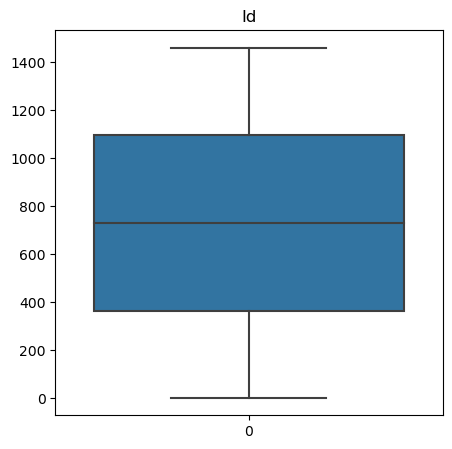

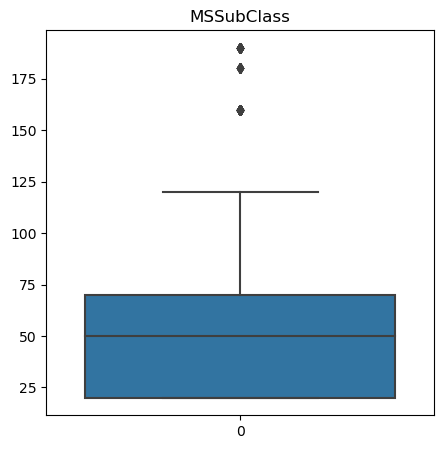

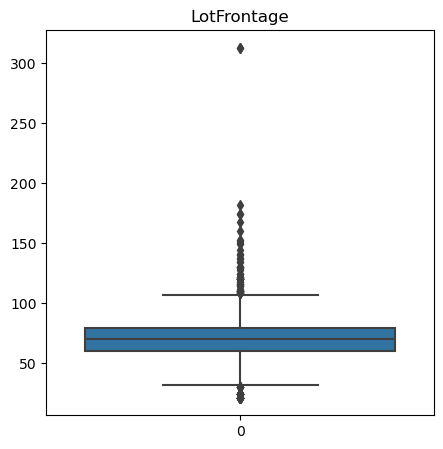

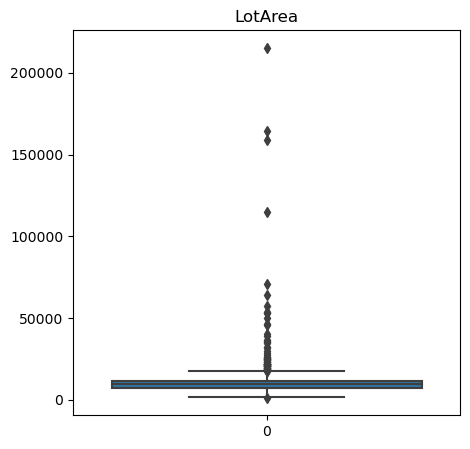

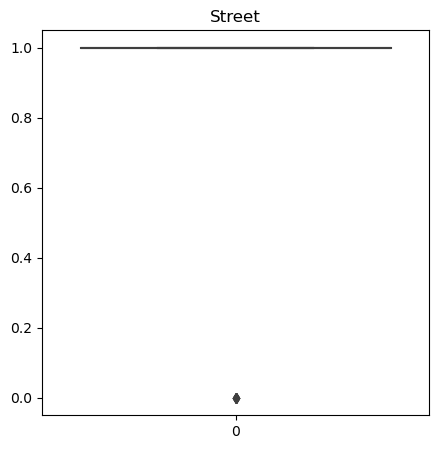

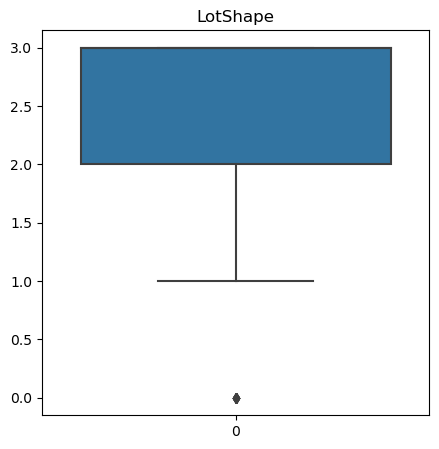

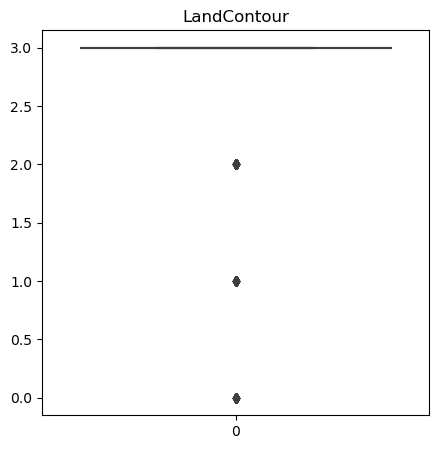

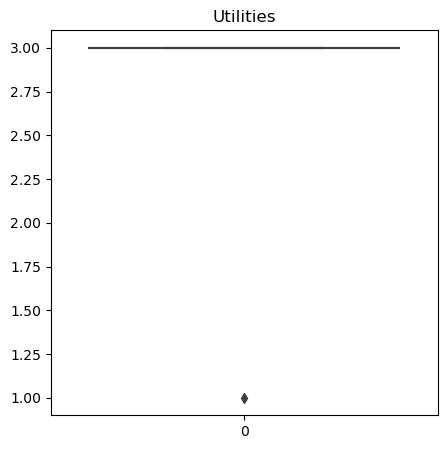

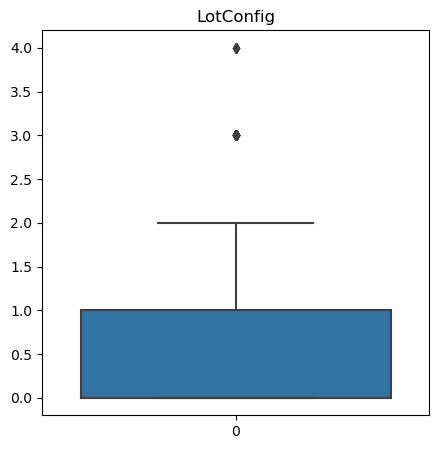

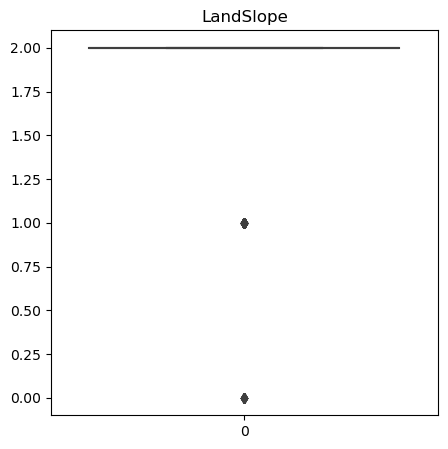

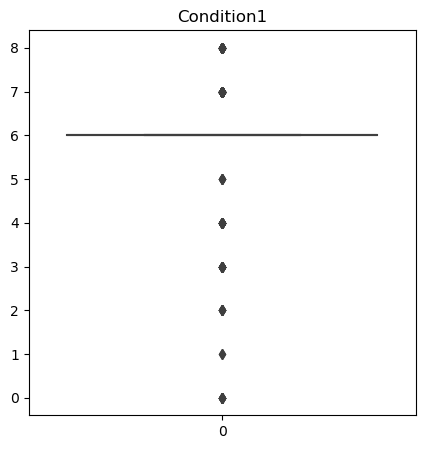

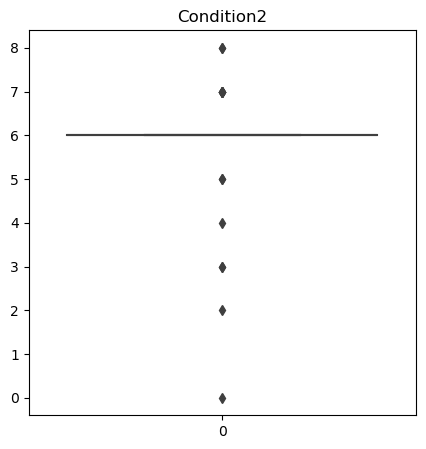

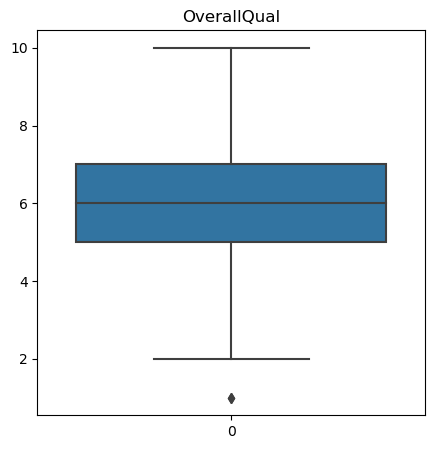

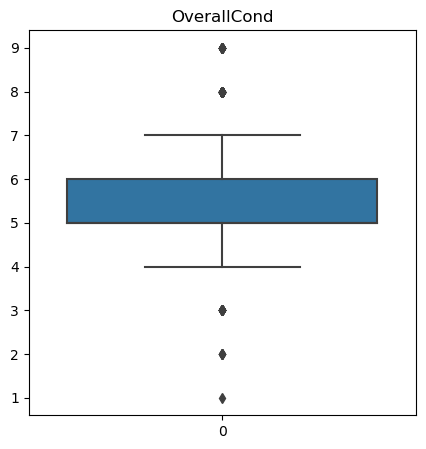

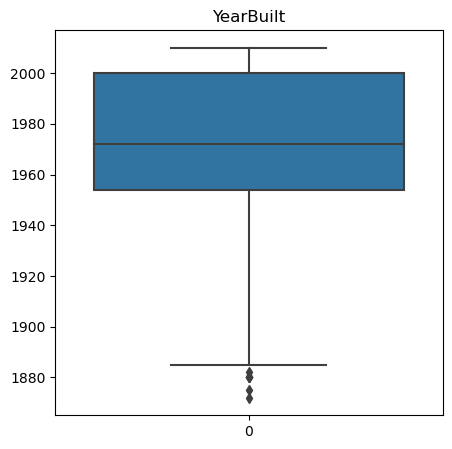

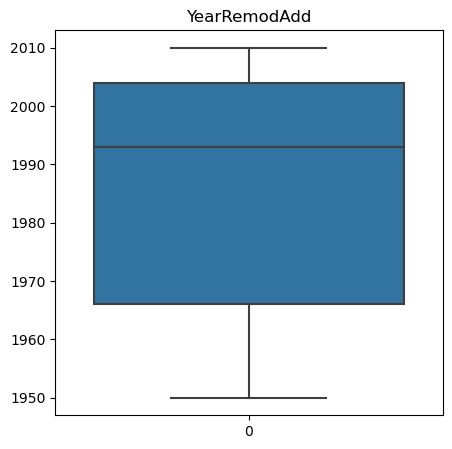

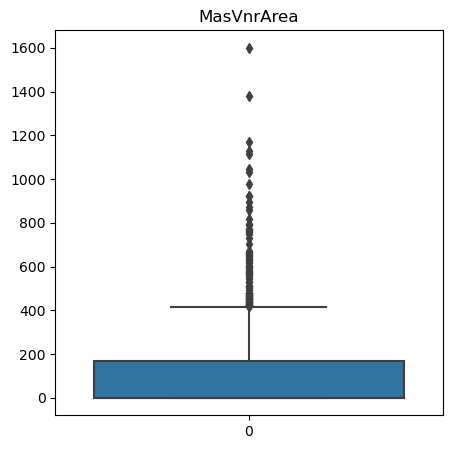

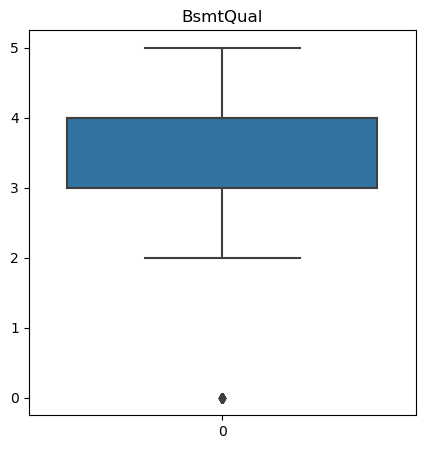

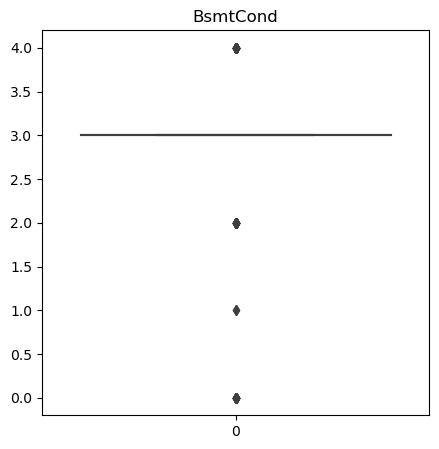

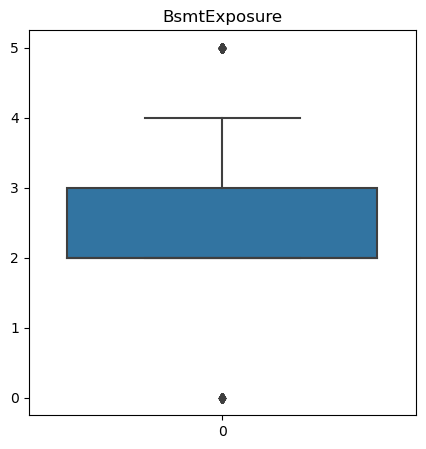

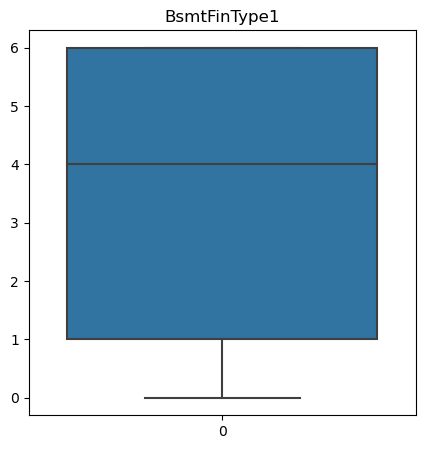

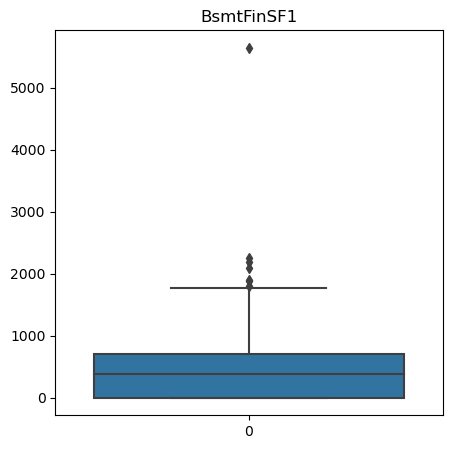

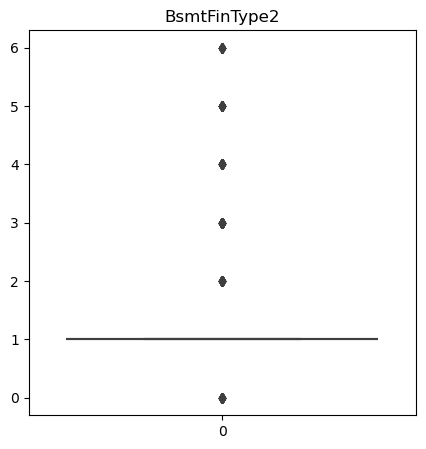

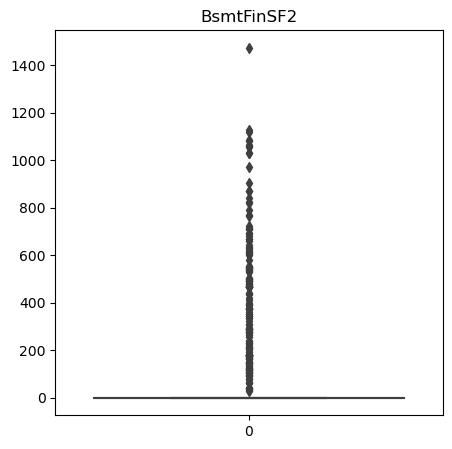

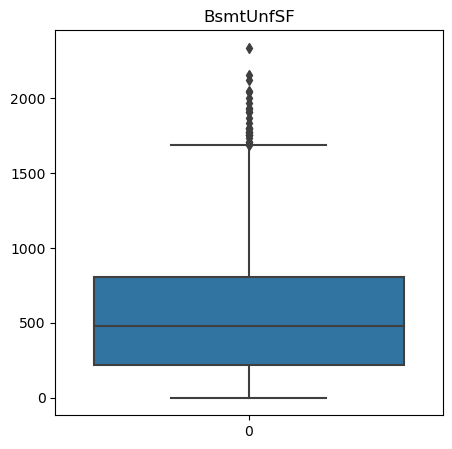

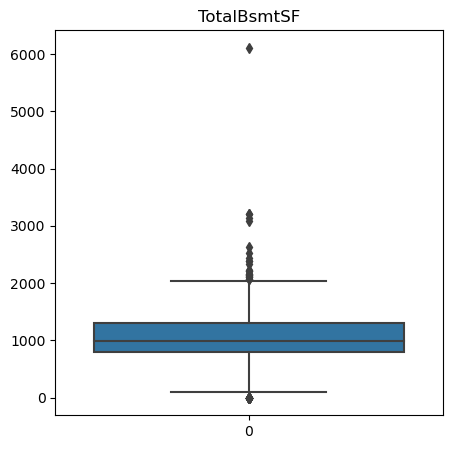

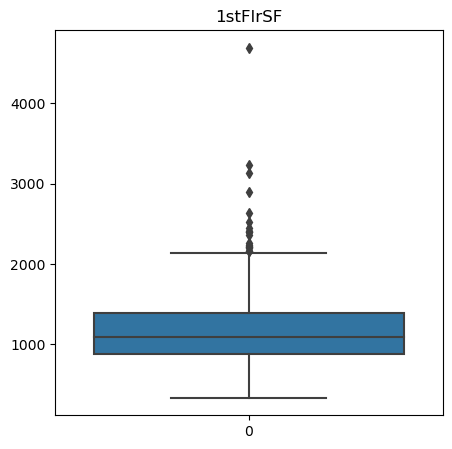

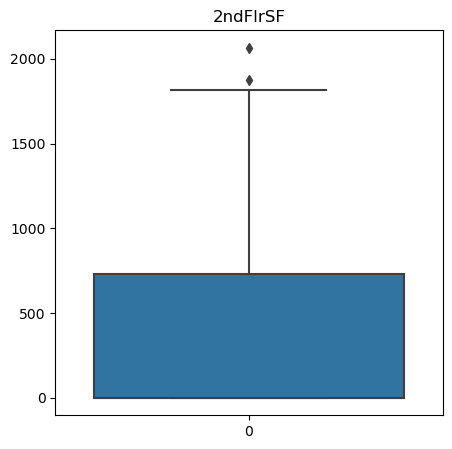

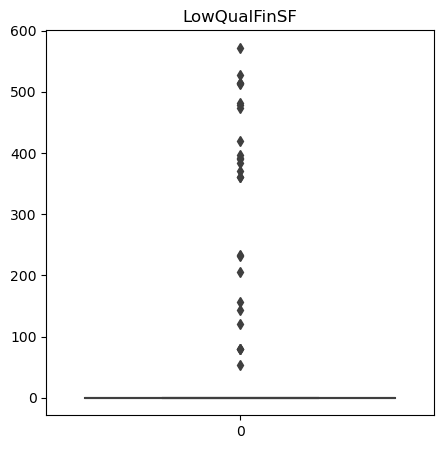

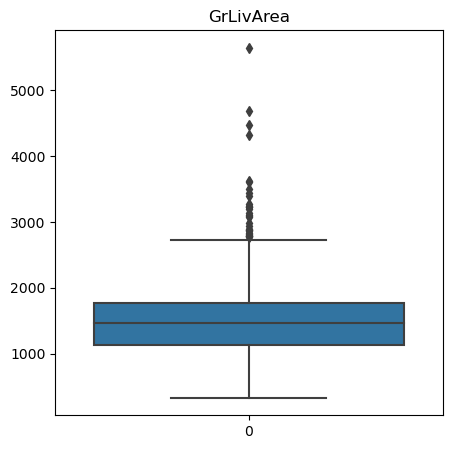

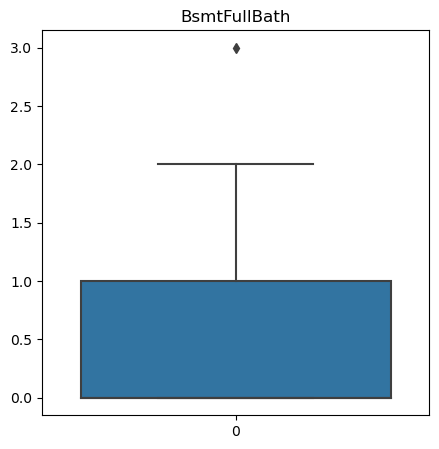

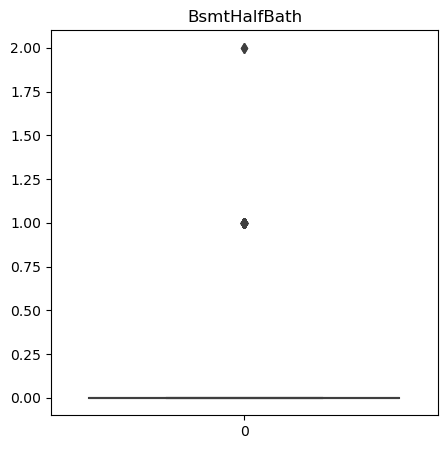

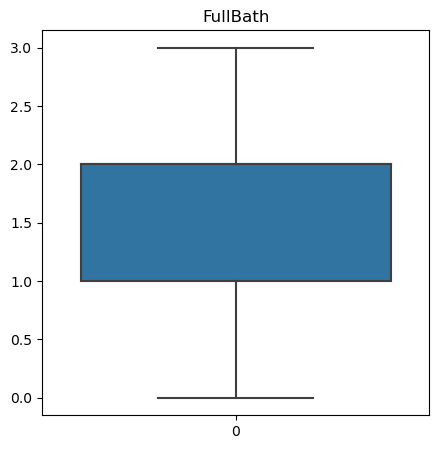

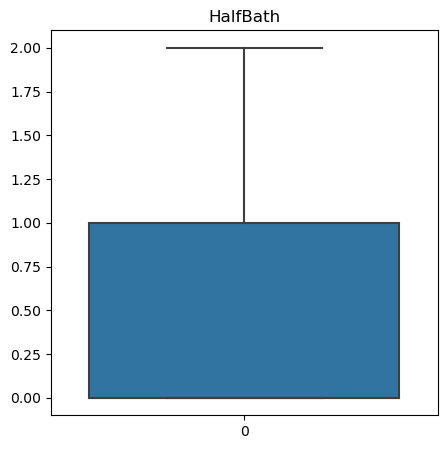

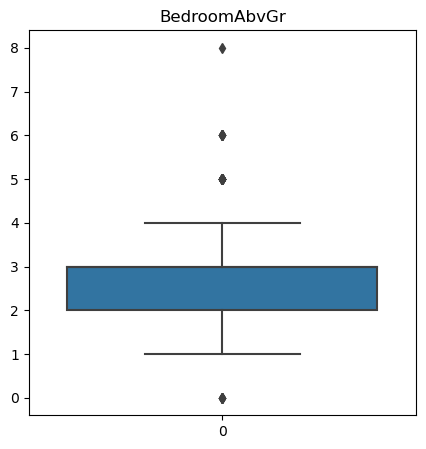

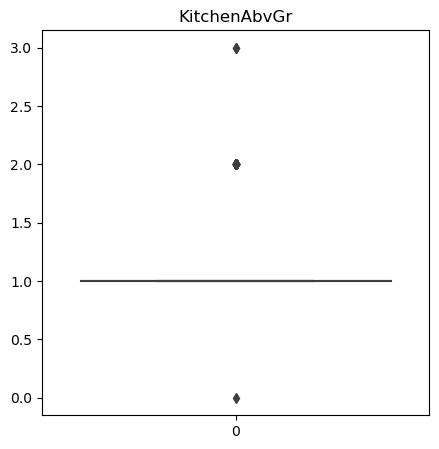

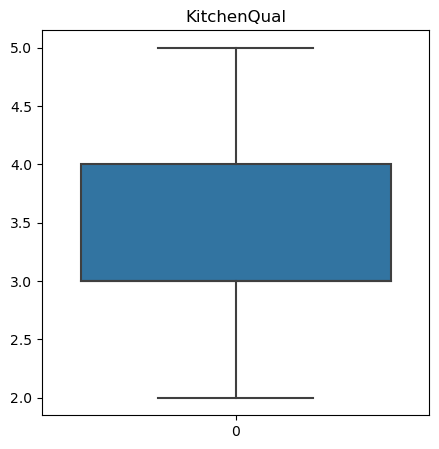

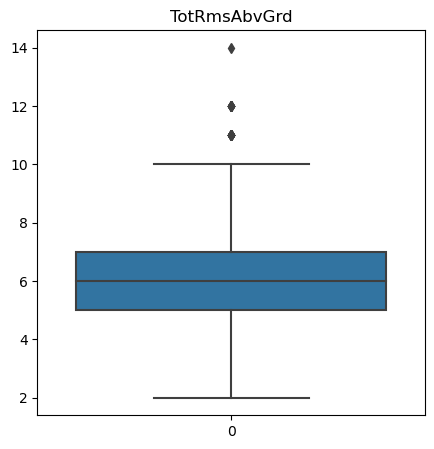

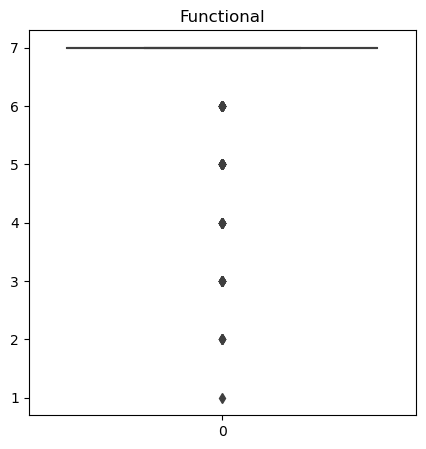

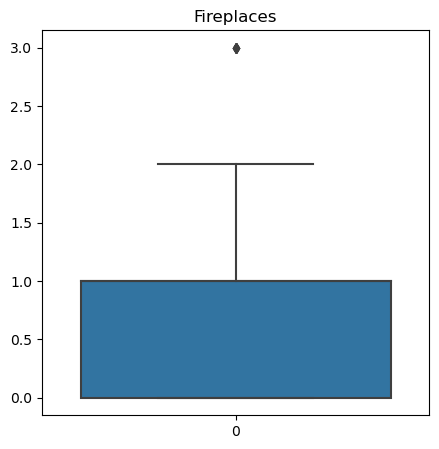

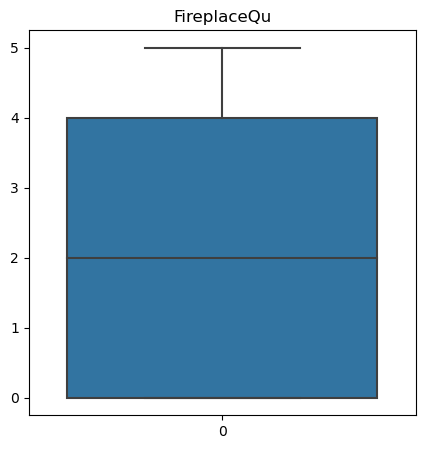

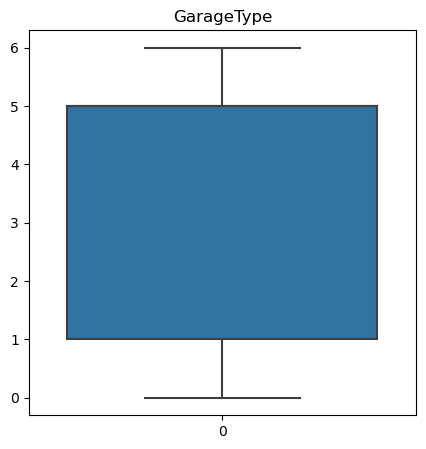

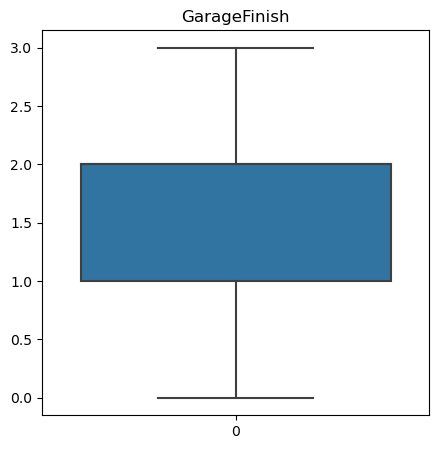

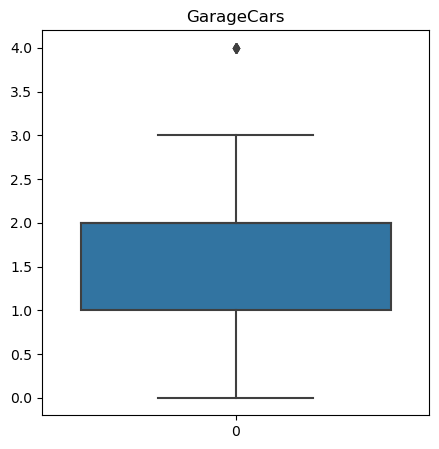

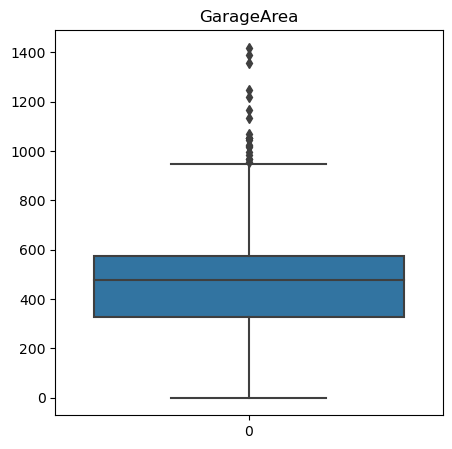

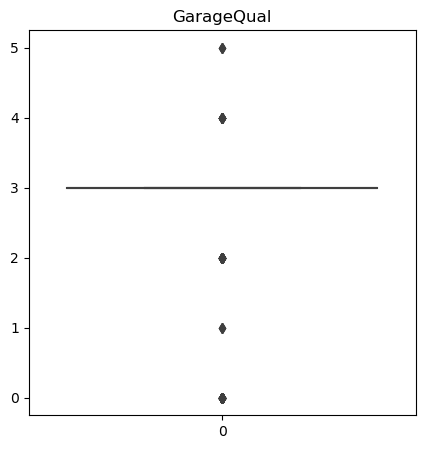

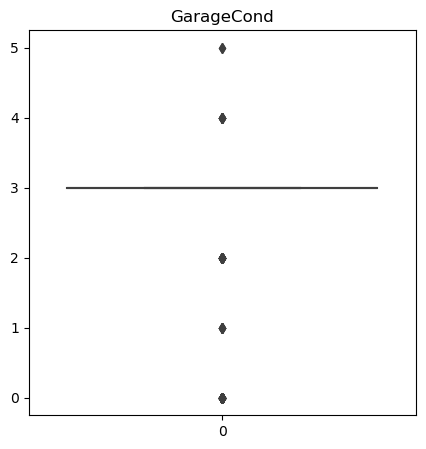

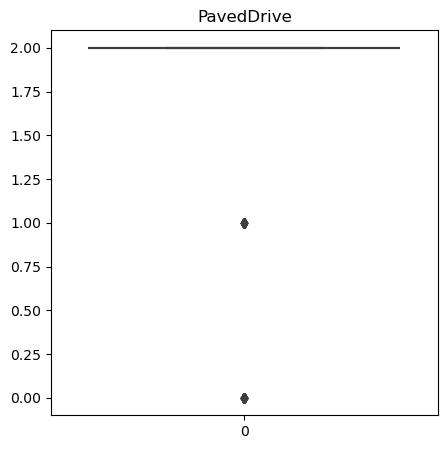

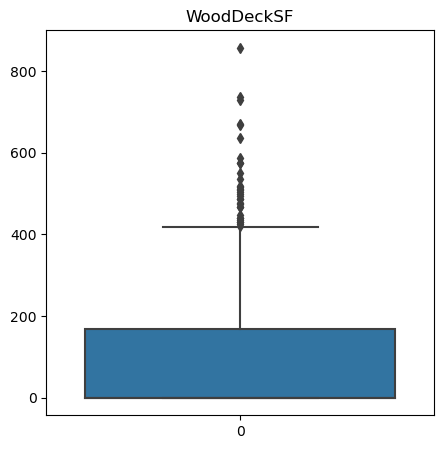

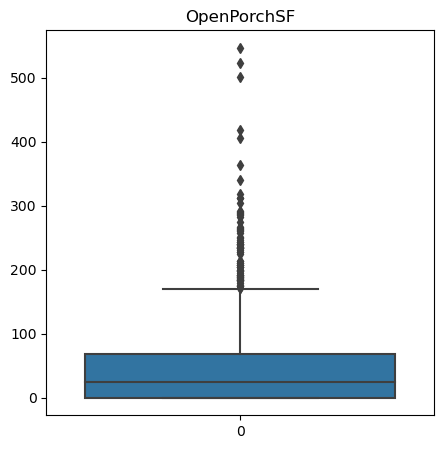

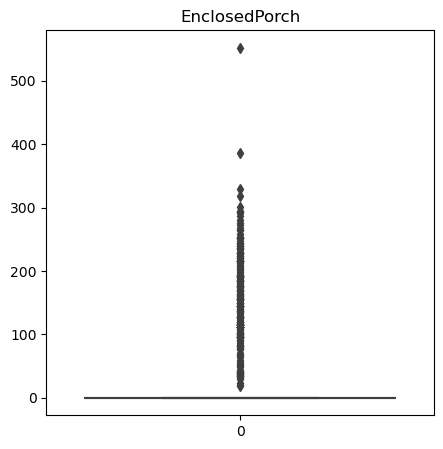

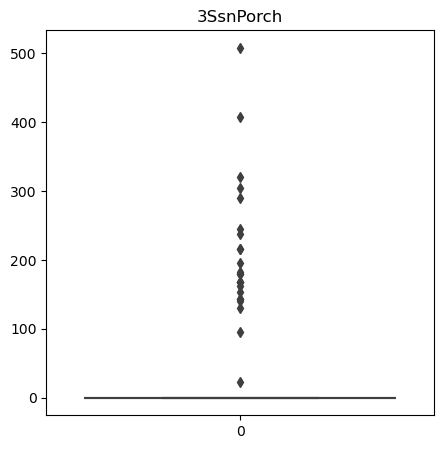

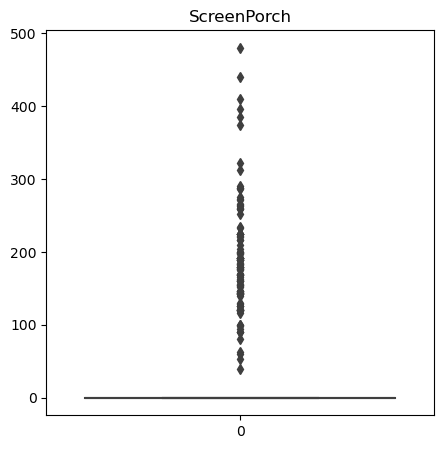

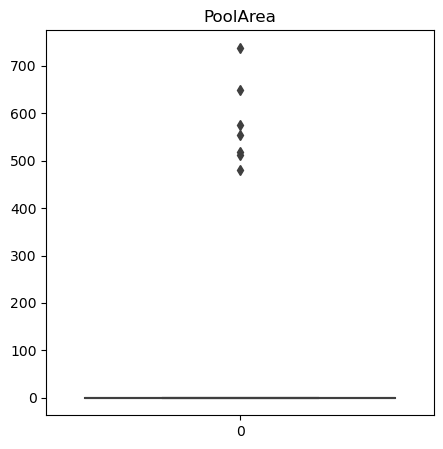

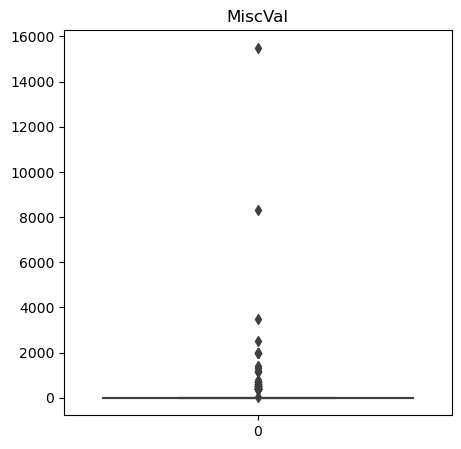

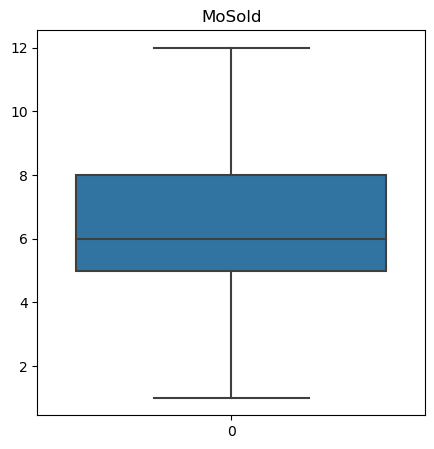

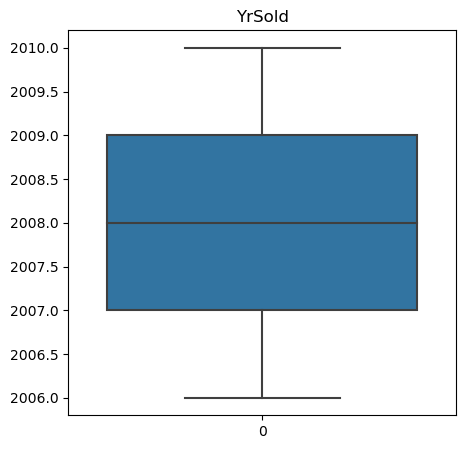

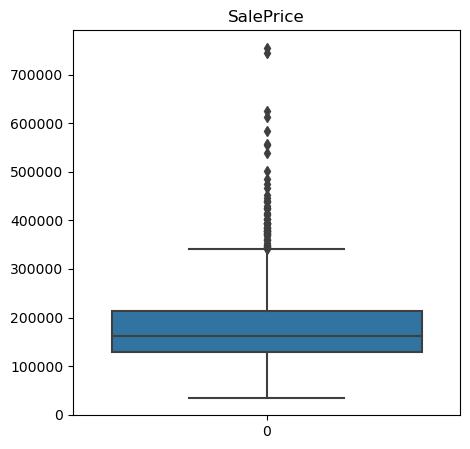

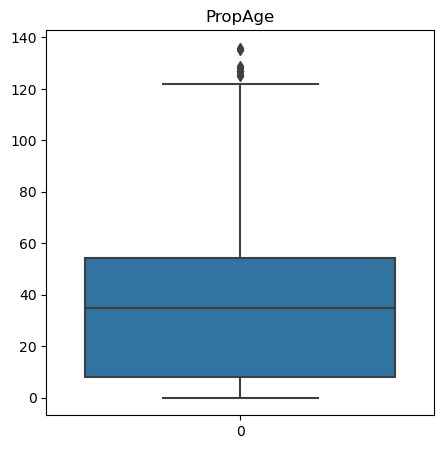

In [30]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns

for col in df[num_col]:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

#### Verifying Distribution or categorical columns

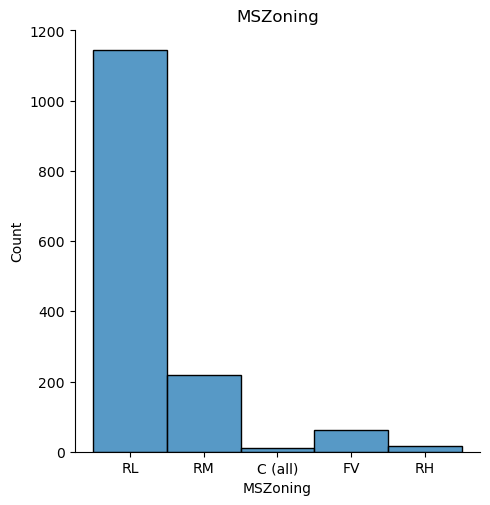

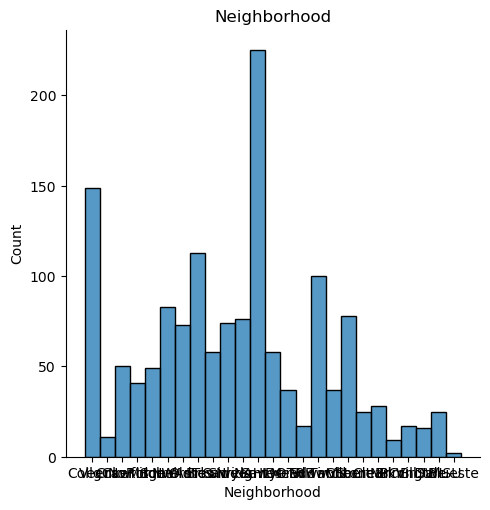

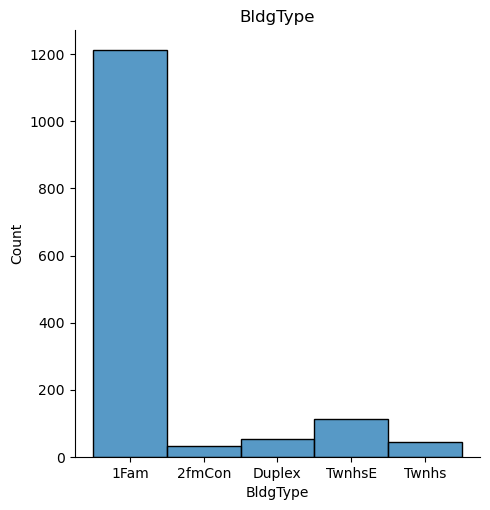

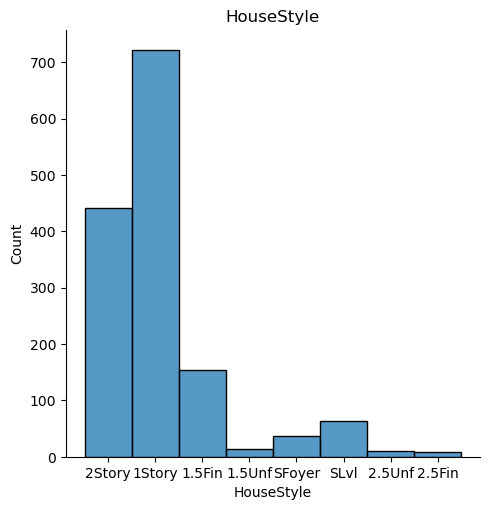

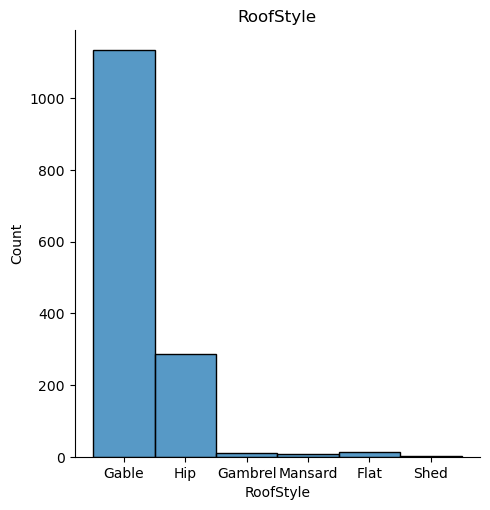

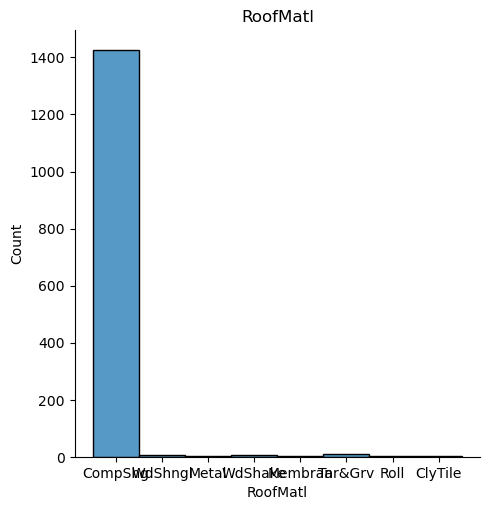

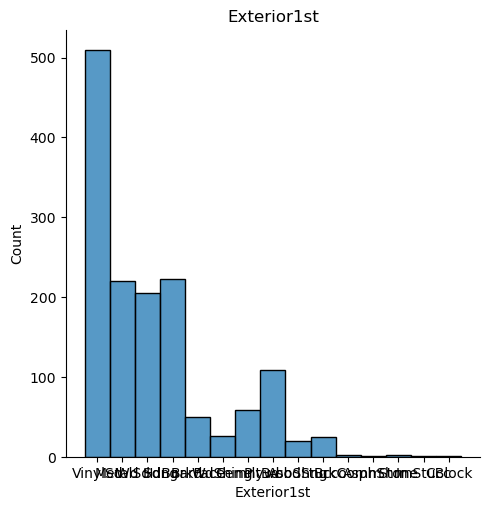

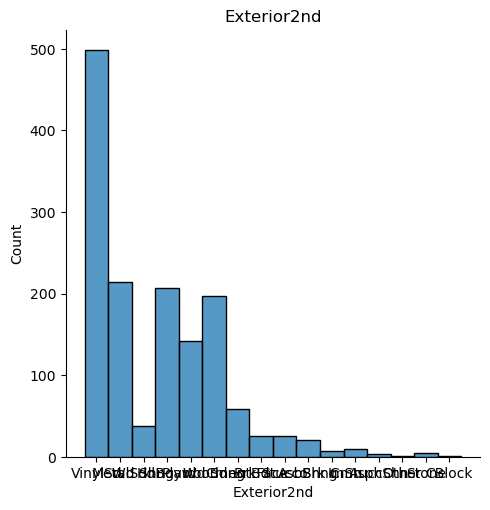

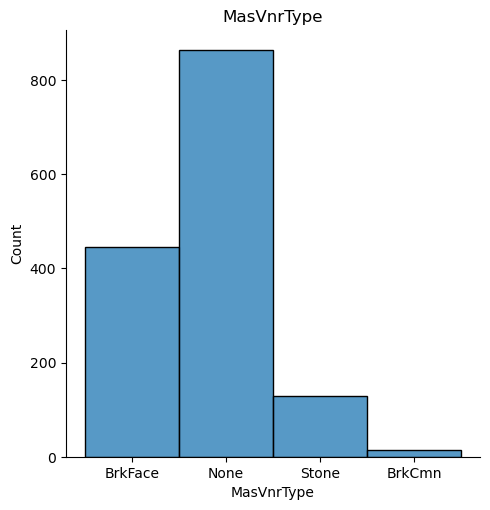

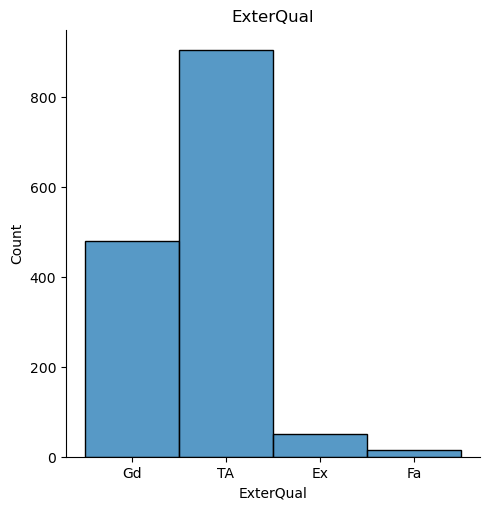

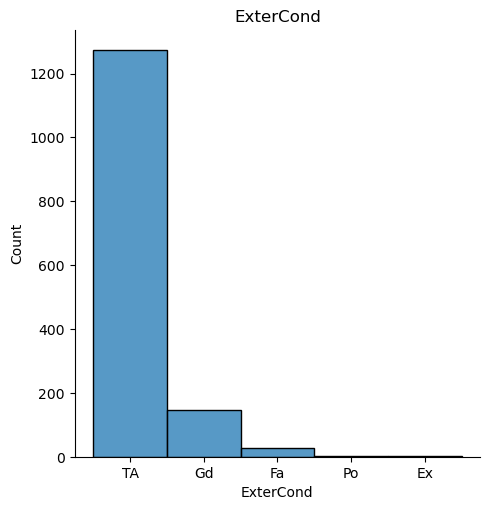

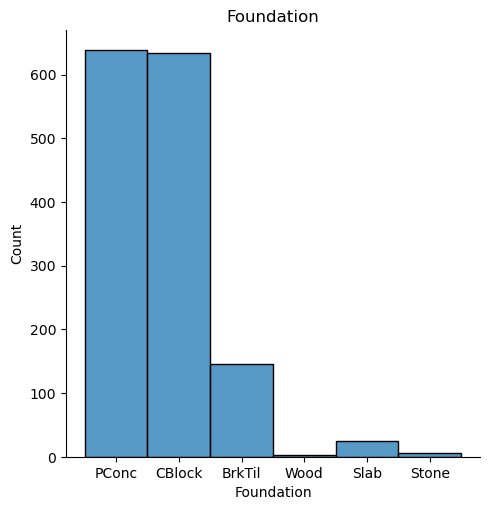

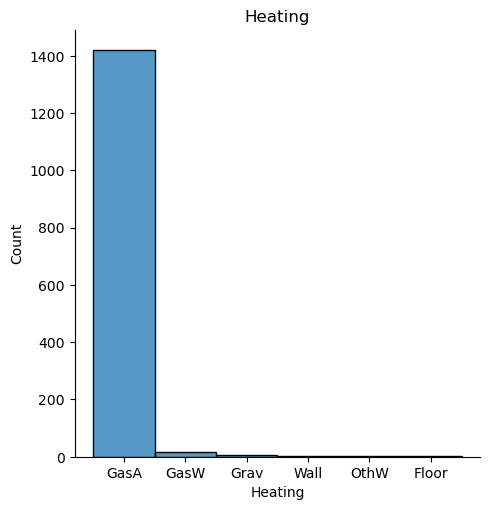

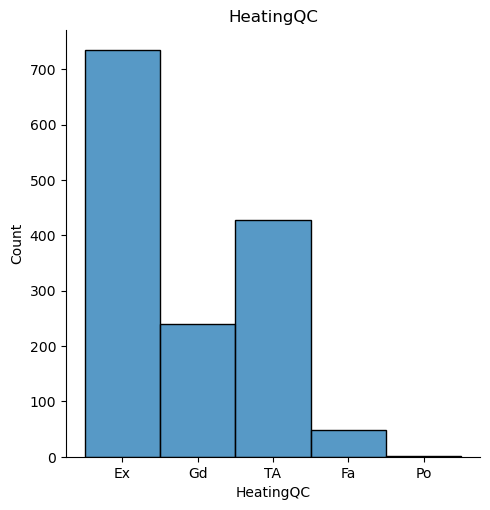

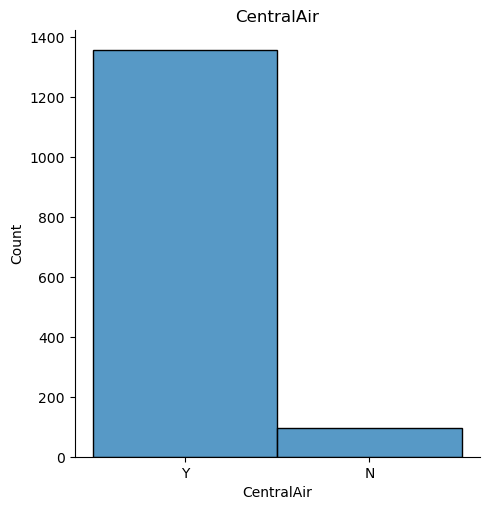

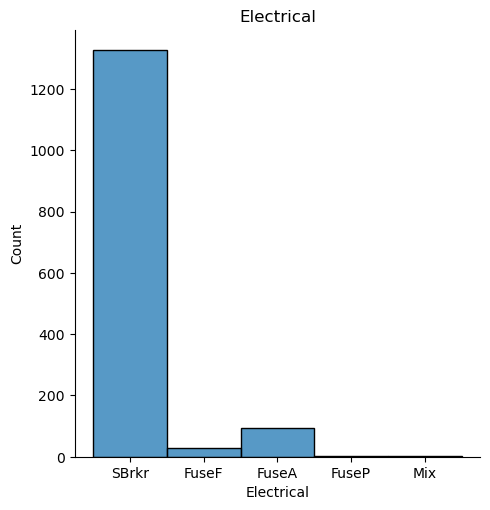

ValueError: Unable to parse string "none" at position 39

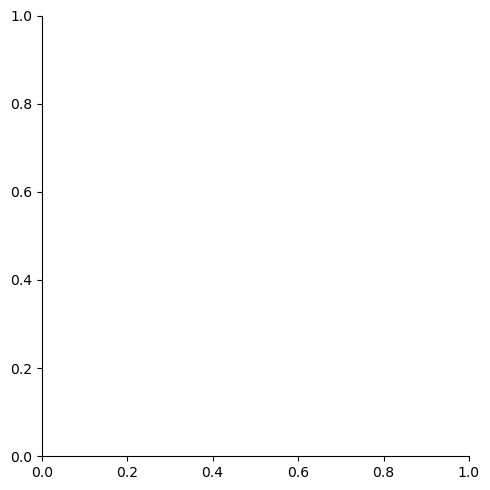

In [31]:
obj_col = df.select_dtypes(include=[object]).columns

for col in obj_col:
    sns.displot(data=df,x=col)
    plt.title(col)
    plt.show()

#### Creating a Pairplot to check the relation of the features with the Target

KeyError: "['SalePrice'] not in index"

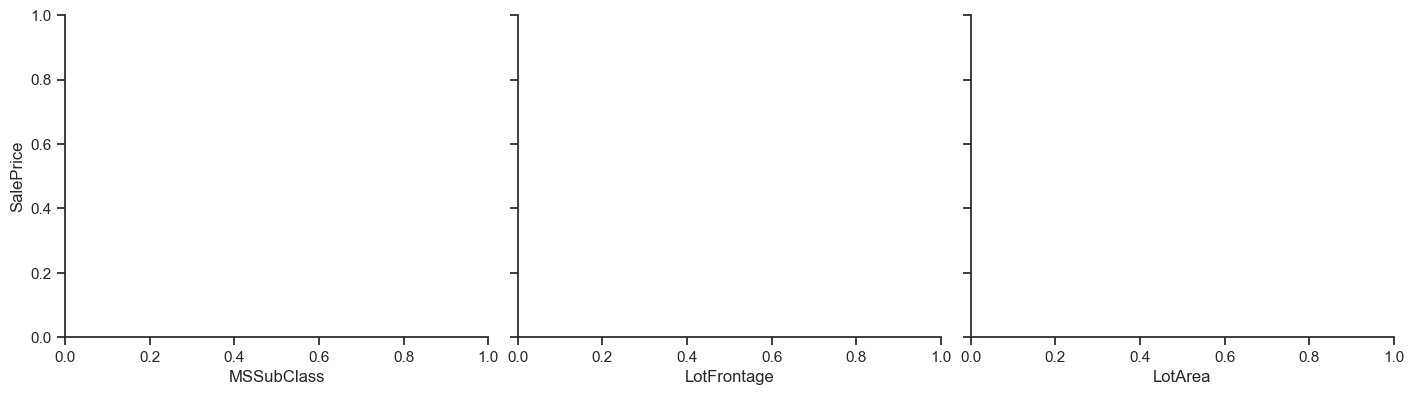

In [87]:
sns.set(style="ticks")

# Define the number of columns to display in each row (e.g., 3)
columns_per_row = 3

# Iterate through columns in groups of 3
for i in range(0, len(df.columns[:-1]), columns_per_row):
    start_col = i
    end_col = min(i + columns_per_row, len(df.columns[:-1]))
    
    # Select the columns to display in this row
    selected_columns = df.columns[start_col:end_col]

    # Create a pairplot for the selected columns
    sns.pairplot(df, x_vars=selected_columns, y_vars=['SalePrice'], height=4, aspect=1.2)
    plt.show()

#### Based on the above analysis, we can remove below Features as they either have very low correlation with Target, or any 1 value of the feature constitue more than 80% of its values

'PoolArea','MiscVal','3SsnPorch','PavedDrive','KitchenAbvGr','BsmtHalfBath','LowQualFinSF','CentralAir','Heating','RoofMatl','BldgType','Condition2','Utilities','Street'

In [33]:
# col_drop=['PoolArea','MiscVal','3SsnPorch','PavedDrive','KitchenAbvGr','BsmtHalfBath','LowQualFinSF','CentralAir','Heating','RoofMatl','BldgType','Condition2','Utilities','Street']
# df=df.drop(col_drop, axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

#### Calculating the correlation with Target

In [35]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
round(correlation_with_target*100,2)

SalePrice        100.00
OverallQual       79.01
GrLivArea         71.01
KitchenQual       65.86
GarageCars        63.97
GarageArea        62.25
TotalBsmtSF       61.33
1stFlrSF          60.70
BsmtQual          58.43
FullBath          56.27
GarageFinish      54.95
TotRmsAbvGrd      53.64
YearBuilt         52.33
FireplaceQu       52.09
YearRemodAdd      50.75
MasVnrArea        47.75
Fireplaces        46.90
GarageType        41.52
BsmtFinSF1        38.40
BsmtExposure      37.73
LotFrontage       33.33
WoodDeckSF        32.47
2ndFlrSF          32.28
OpenPorchSF       31.12
BsmtFinType1      30.37
HalfBath          28.23
GarageQual        27.42
LotArea           26.47
GarageCond        26.35
PavedDrive        23.14
BsmtFullBath      22.50
BsmtUnfSF         21.57
BsmtCond          20.90
BedroomAbvGr      17.20
ScreenPorch       11.30
Functional        10.95
LotConfig          9.45
PoolArea           9.31
3SsnPorch          4.52
MoSold             4.51
Street             4.10
Utilities       

#### Plotting into a heatmap

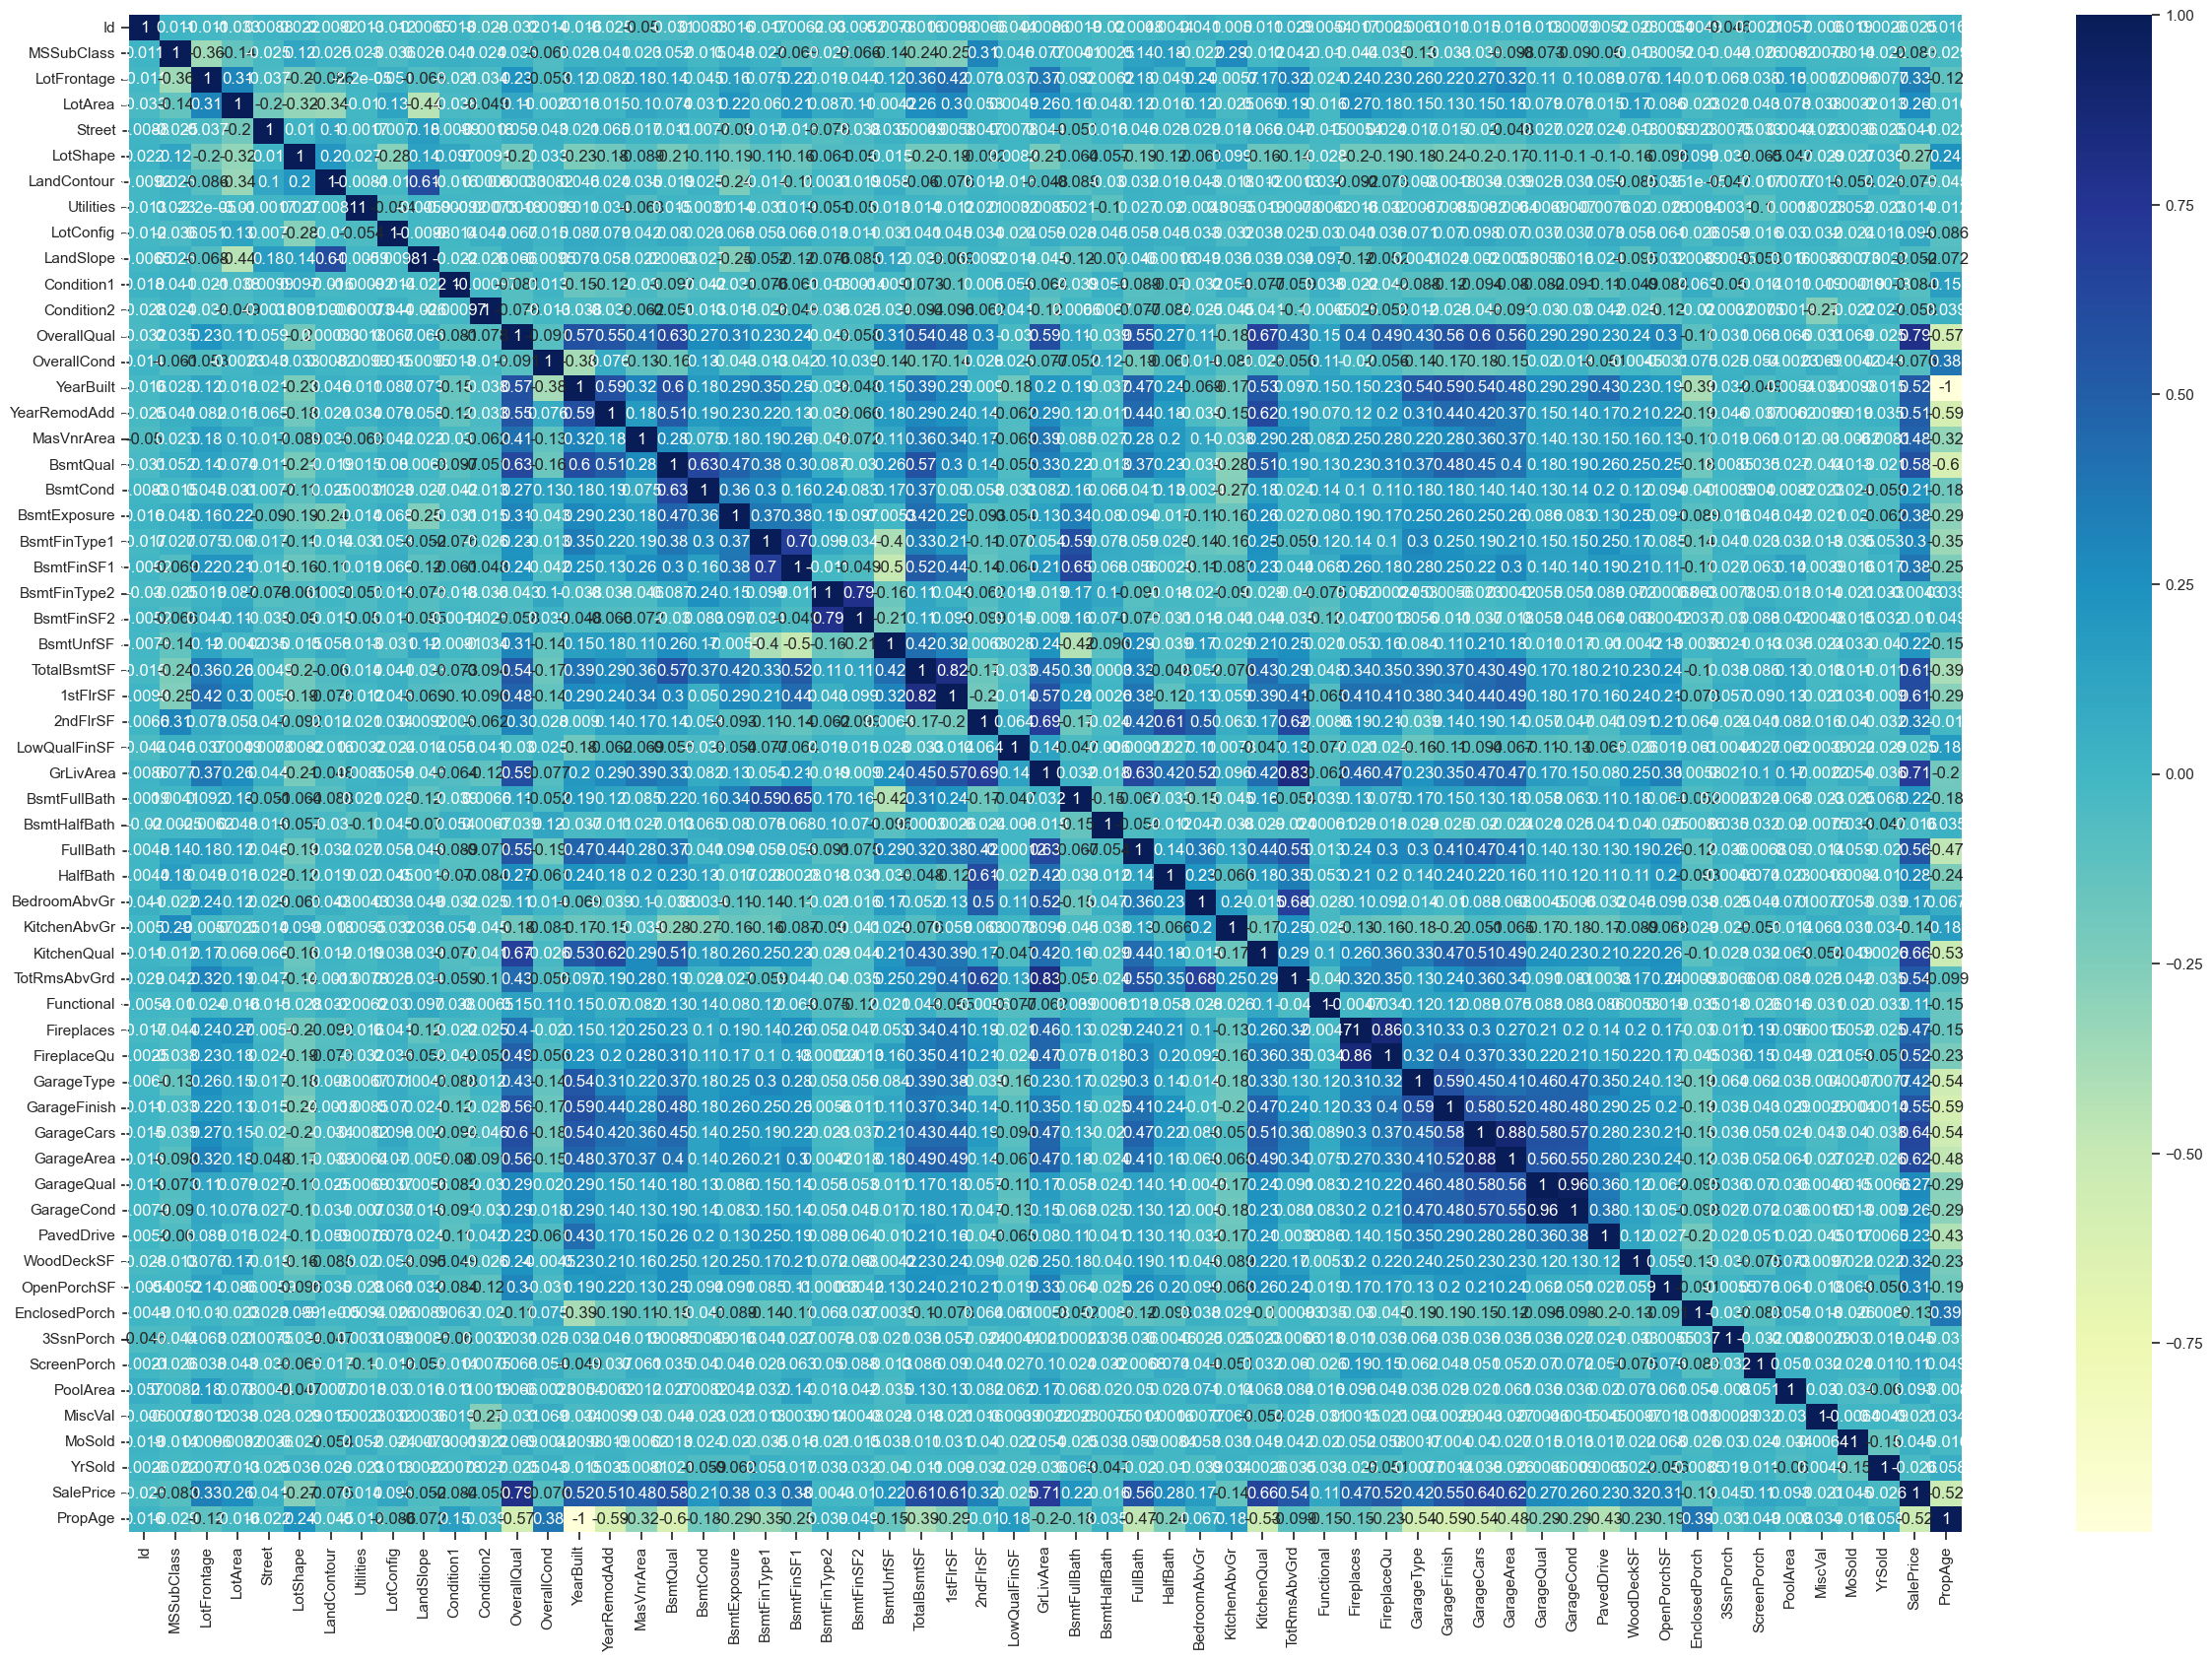

In [36]:
plt.figure(figsize=(30,20))
cor=df.corr()
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [37]:
#Deleting ID column
df=df.drop('Id', axis=1)

In [38]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
obj_col = df.select_dtypes(include=[object]).columns

In [39]:
df[obj_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1451 non-null   object
 1   Neighborhood   1451 non-null   object
 2   BldgType       1451 non-null   object
 3   HouseStyle     1451 non-null   object
 4   RoofStyle      1451 non-null   object
 5   RoofMatl       1451 non-null   object
 6   Exterior1st    1451 non-null   object
 7   Exterior2nd    1451 non-null   object
 8   MasVnrType     1451 non-null   object
 9   ExterQual      1451 non-null   object
 10  ExterCond      1451 non-null   object
 11  Foundation     1451 non-null   object
 12  Heating        1451 non-null   object
 13  HeatingQC      1451 non-null   object
 14  CentralAir     1451 non-null   object
 15  Electrical     1451 non-null   object
 16  GarageYrBlt    1451 non-null   object
 17  SaleType       1451 non-null   object
 18  SaleCondition  1451 non-null

In [40]:
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   LotFrontage    1451 non-null   float64
 2   LotArea        1451 non-null   int64  
 3   Street         1451 non-null   int64  
 4   LotShape       1451 non-null   int64  
 5   LandContour    1451 non-null   int64  
 6   Utilities      1451 non-null   int64  
 7   LotConfig      1451 non-null   int64  
 8   LandSlope      1451 non-null   int64  
 9   Condition1     1451 non-null   int64  
 10  Condition2     1451 non-null   int64  
 11  OverallQual    1451 non-null   int64  
 12  OverallCond    1451 non-null   int64  
 13  YearBuilt      1451 non-null   int64  
 14  YearRemodAdd   1451 non-null   int64  
 15  MasVnrArea     1451 non-null   float64
 16  BsmtQual       1451 non-null   int64  
 17  BsmtCond       1451 non-null   int64  
 18  BsmtExpo

#### Removing outliers from all numerical Features by shaving off the top and bottom by 5%

In [41]:
for col in num_col:
    df[col][df[col] <= df[col].quantile(0.05)] = df[col].quantile(0.05)
    df[col][df[col] >= df[col].quantile(0.95)] = df[col].quantile(0.95)

#### Scaling Numerical Data

In [42]:
# Scaling the data between 0 and 1
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df[num_col])

array([[0.28571429, 0.42647059, 0.36885042, ..., 0.5       , 0.50670277,
        0.04444444],
       [0.        , 0.64705882, 0.45078551, ..., 0.25      , 0.39316771,
        0.33333333],
       [0.28571429, 0.47058824, 0.56834455, ..., 0.5       , 0.56977781,
        0.06666667],
       ...,
       [0.35714286, 0.44117647, 0.41102918, ..., 1.        , 0.75059291,
        0.75555556],
       [0.        , 0.47058824, 0.45912151, ..., 1.        , 0.22759575,
        0.65555556],
       [0.        , 0.57352941, 0.47479605, ..., 0.5       , 0.25019764,
        0.46666667]])

#### Creating Dummy variables for categorical data

In [43]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df[obj_col], drop_first=True)
df_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  \
0            0            0            1            0                     0   
1            0            0            1            0                     0   
2            0            0            1            0                     0   
3            0            0            1            0                     0   
4            0            0            1            0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     1                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  BldgType_2fmCon  \
0                    0                     0                0   
1                    0                     1                0   
2                    0                     0                0   
3                    0                     0                0   
4                    0                     0                0   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0                0               0                0                  0   
1                0               0              

In [44]:
df=df.drop(obj_col, axis=1)

#### Identifying and deleting columns that have sum less than 50. 

In [45]:
# cols=df_dummies.columns

In [46]:
# ones_count=0
# delCol=[]
# for col in cols:
#     ones_count = df_dummies[col].sum()
#     if ones_count<50:
#         delCol.append(col)

In [47]:
# delCol

In [48]:
# df_dummies=df_dummies.drop(delCol,axis=1)

#### Concatenating the Dummy Variables with the actual Dataframe

In [49]:
df= pd.concat([df,df_dummies], axis=1)

In [50]:
df.shape

(1451, 277)

#### Plotting to view the effect on Target after Data Processing

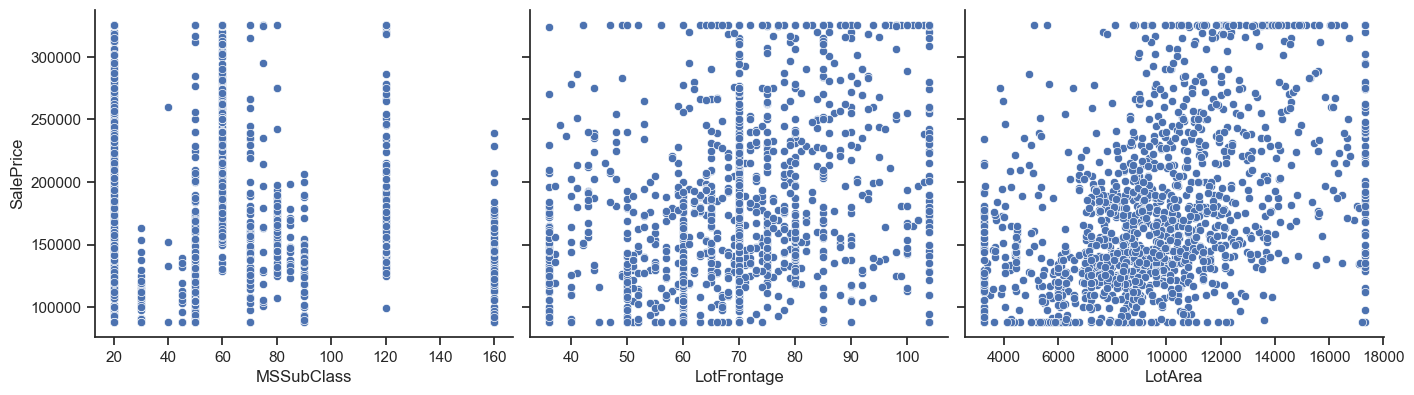

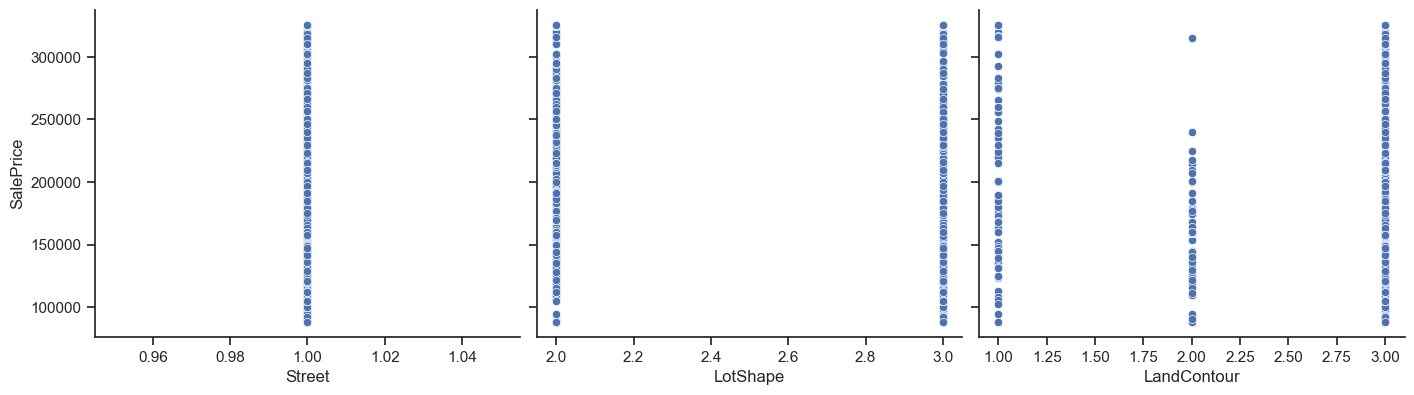

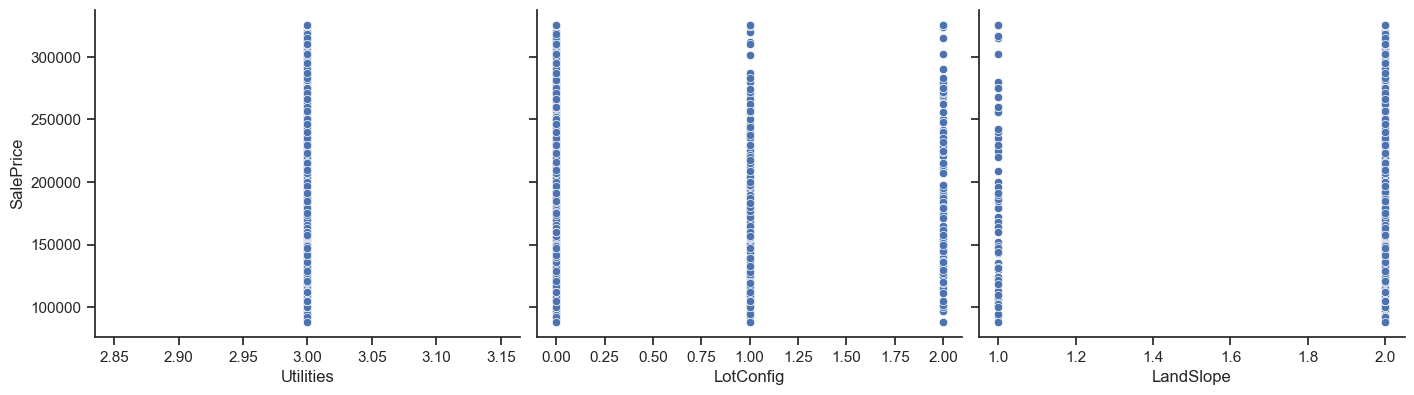

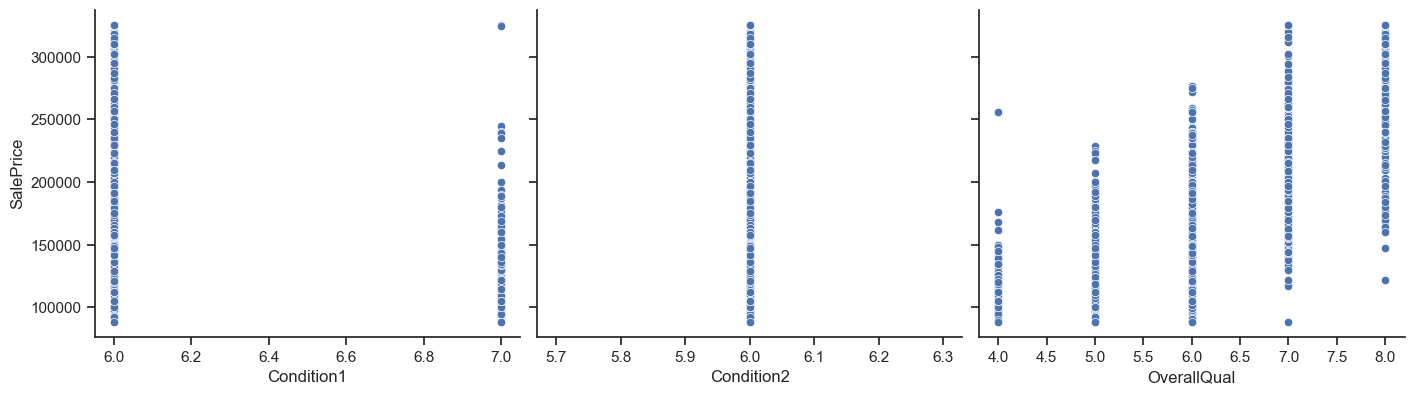

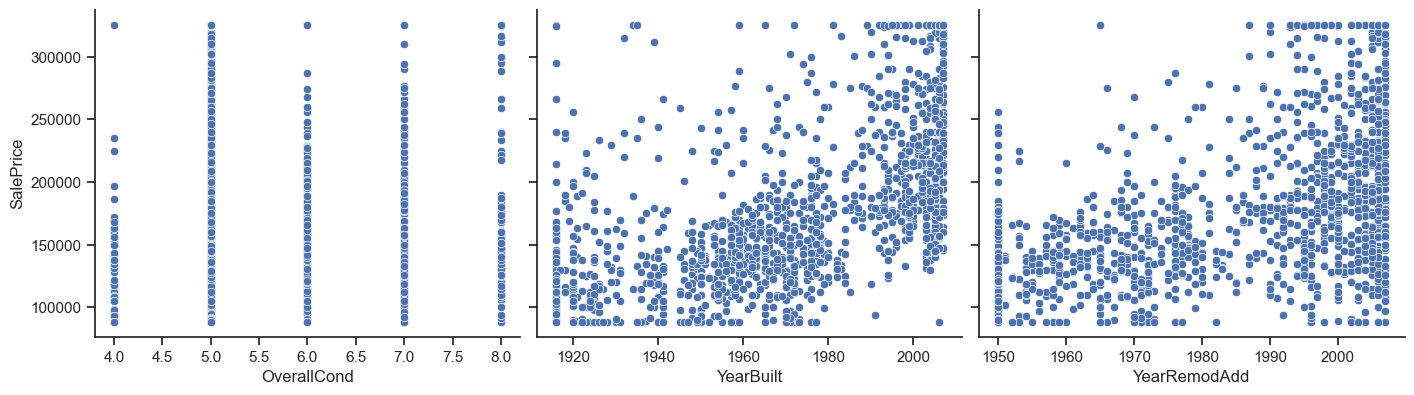

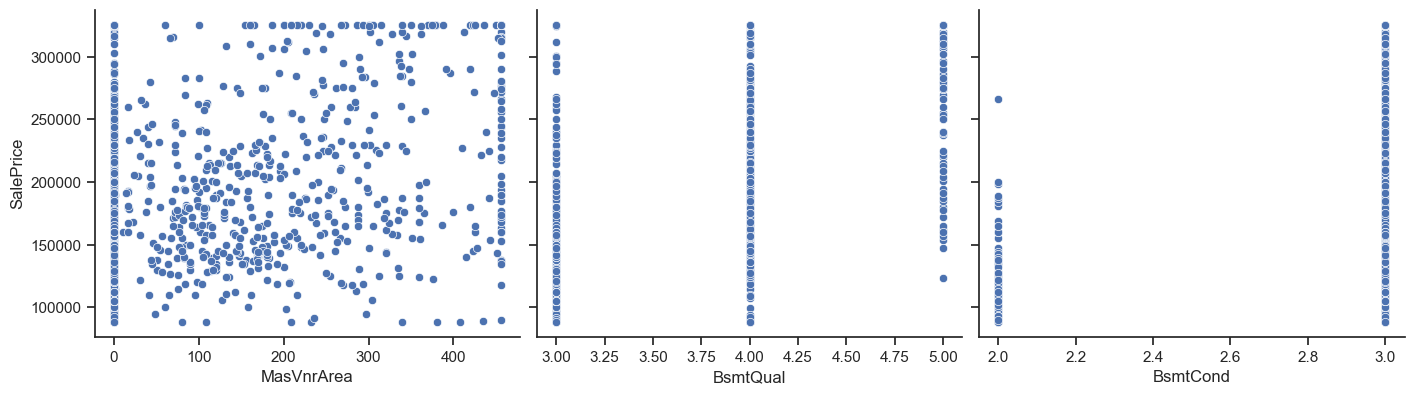

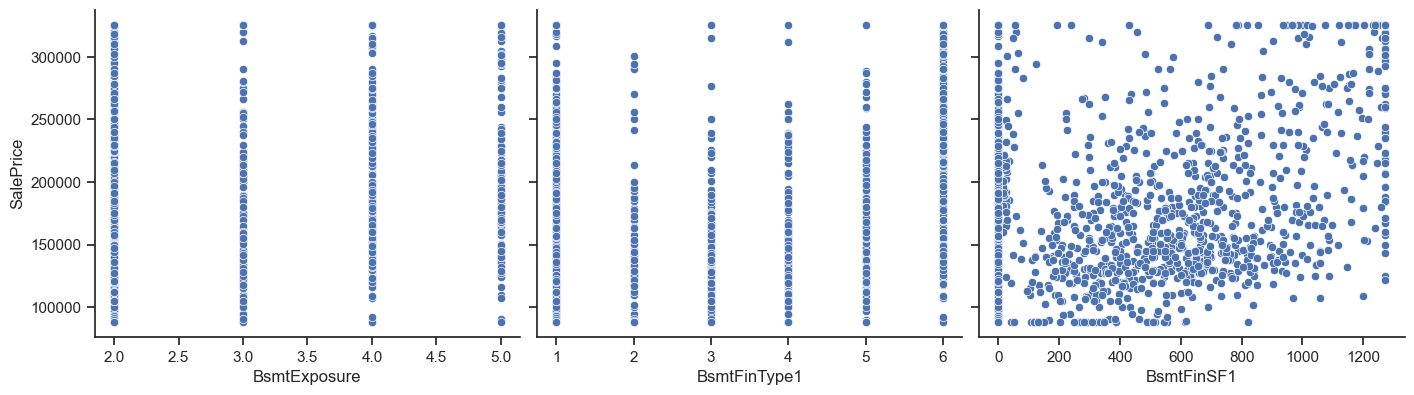

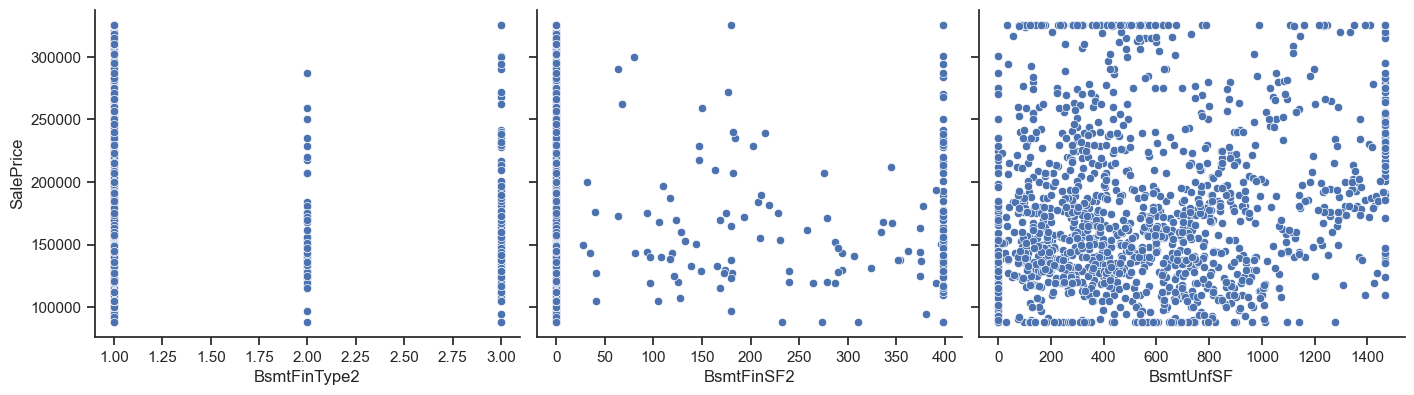

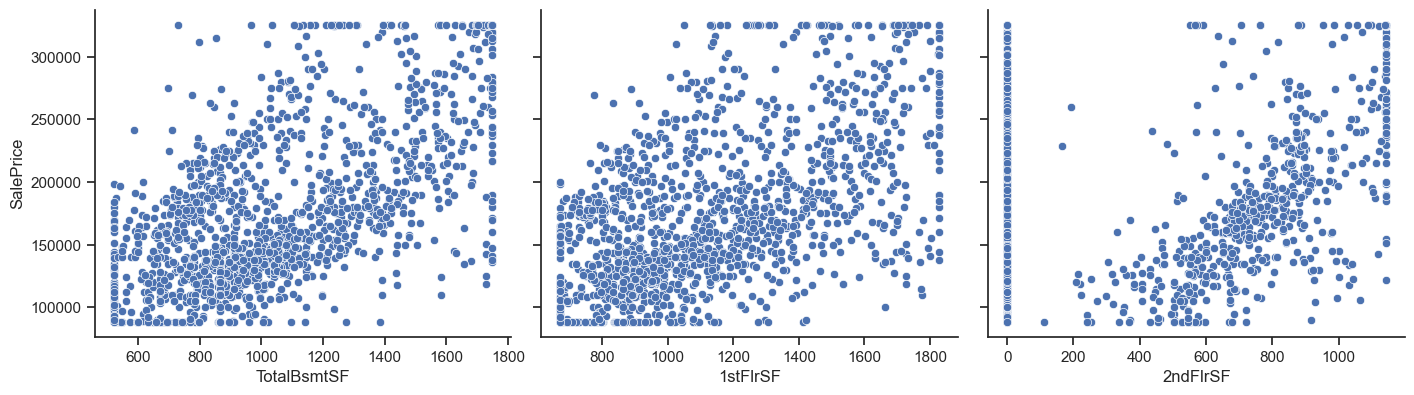

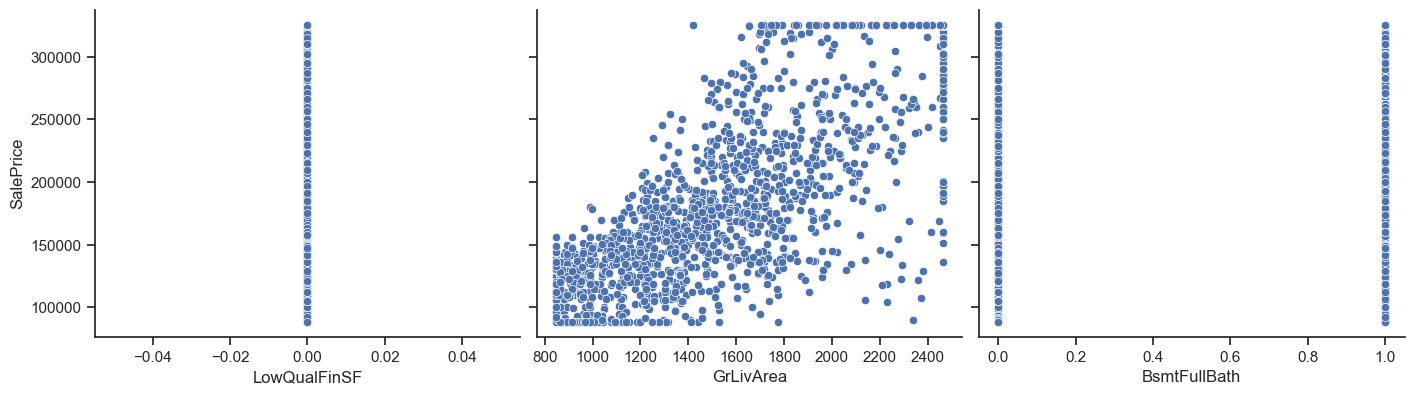

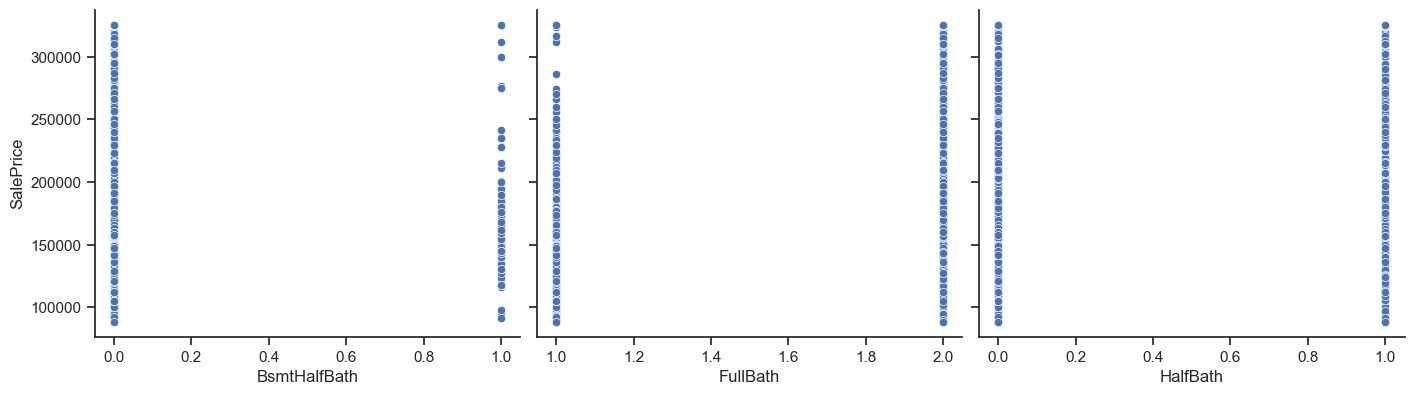

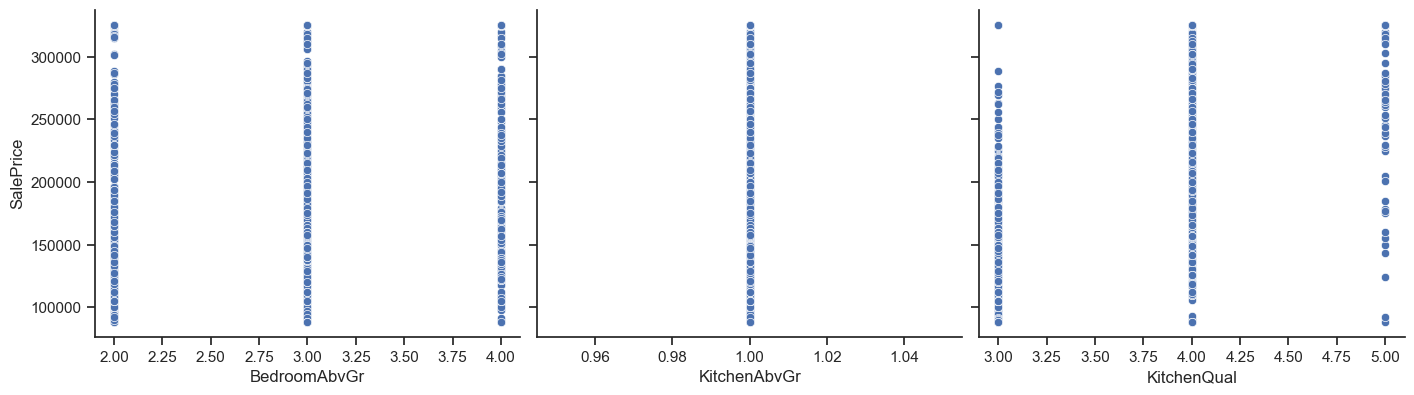

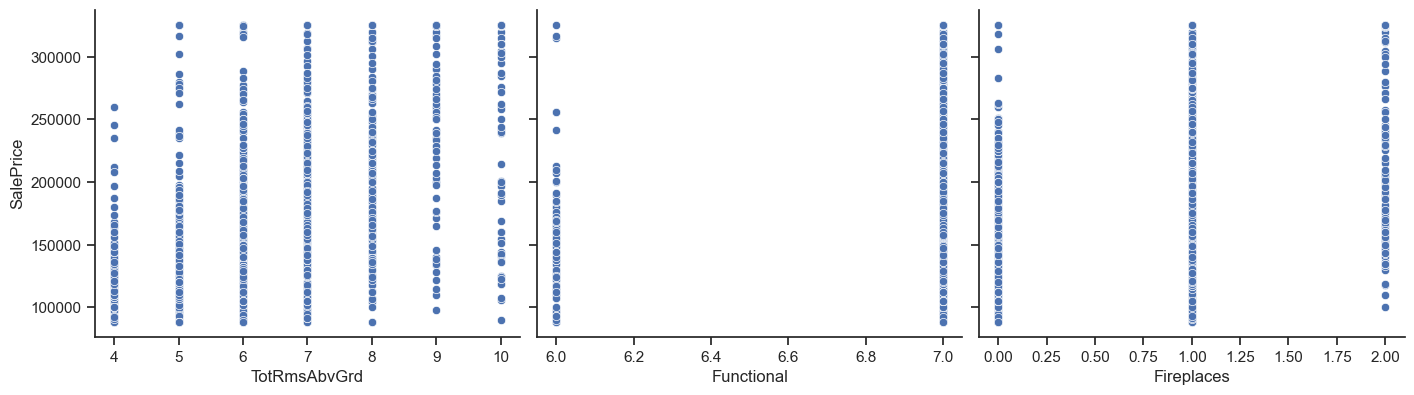

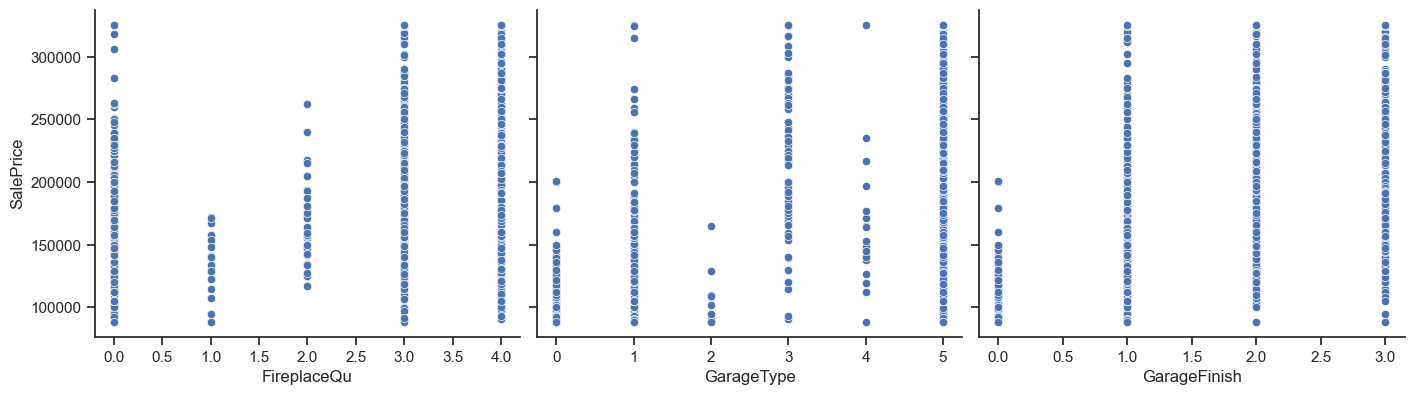

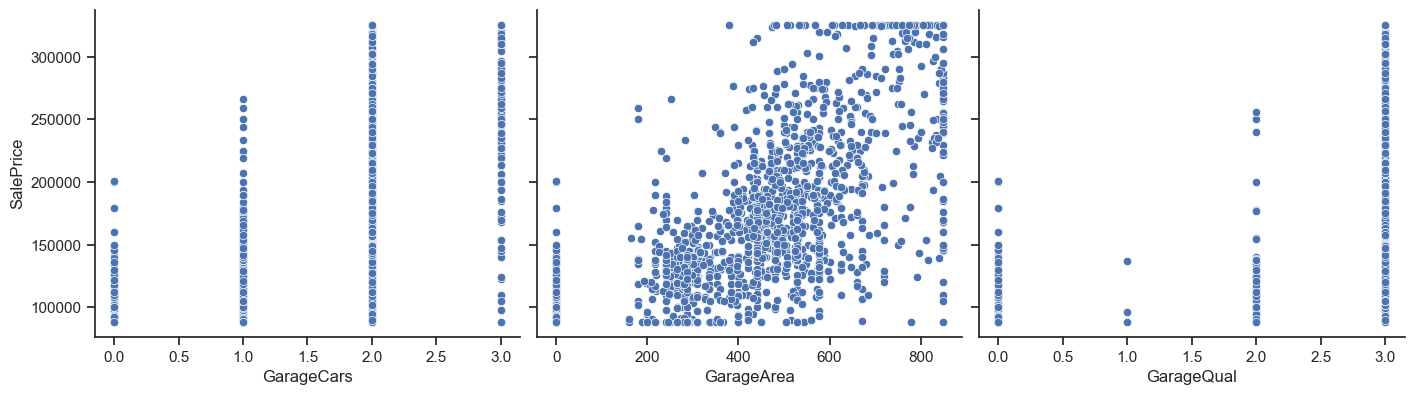

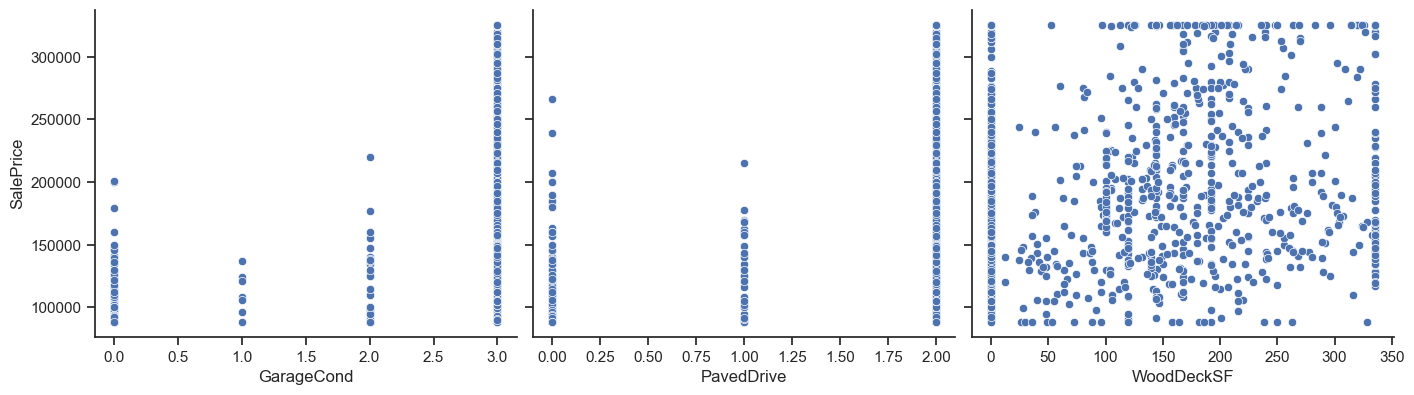

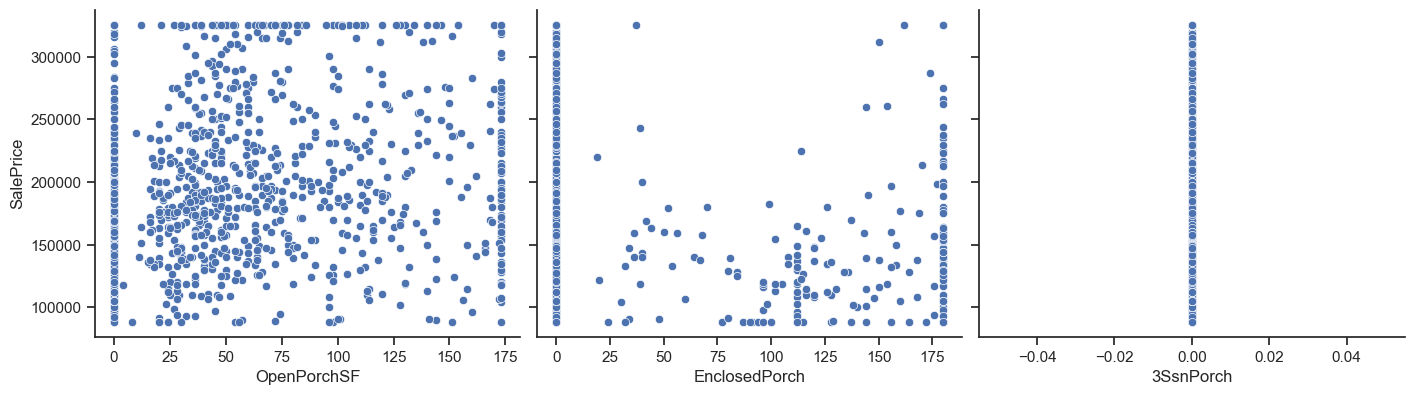

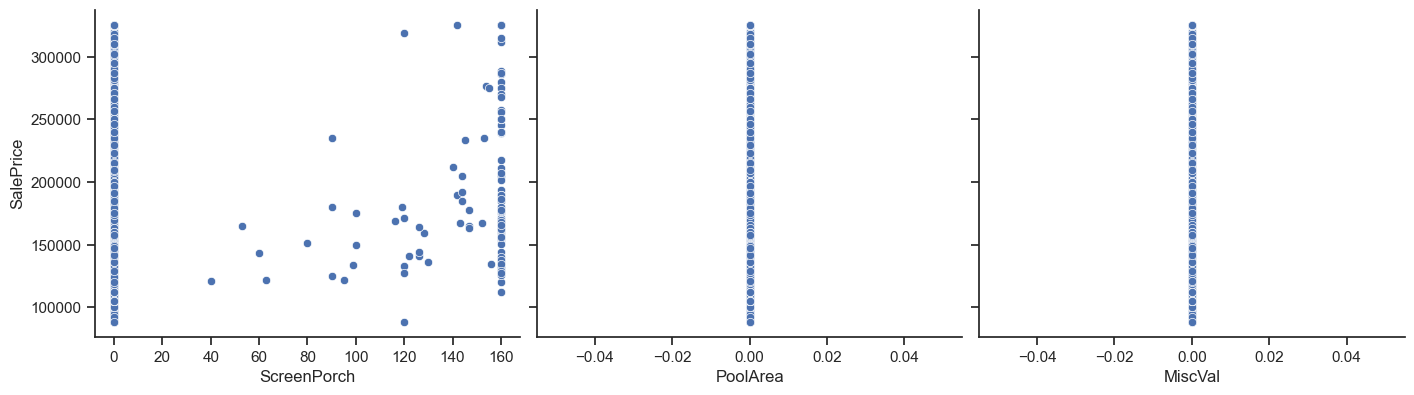

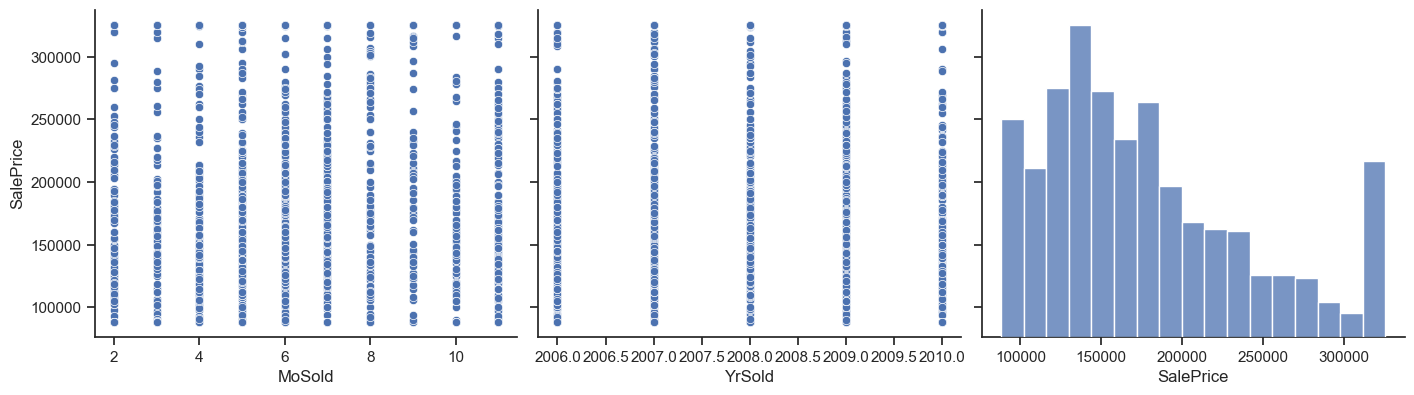

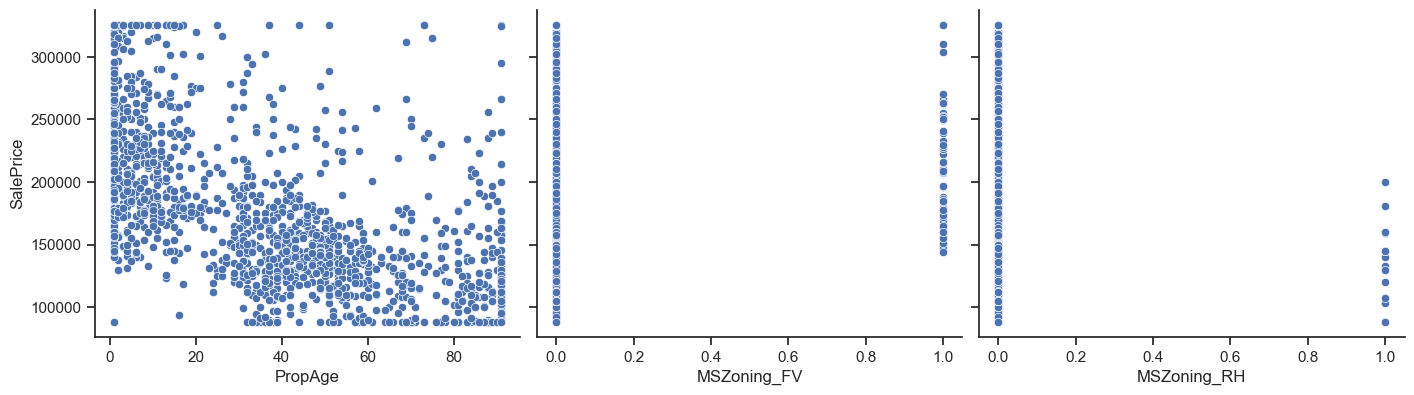

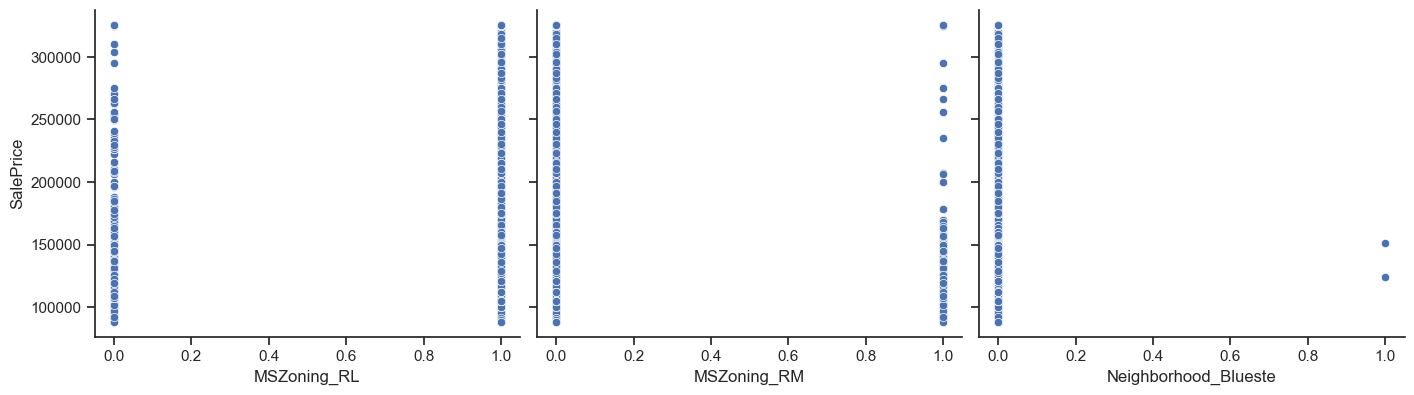

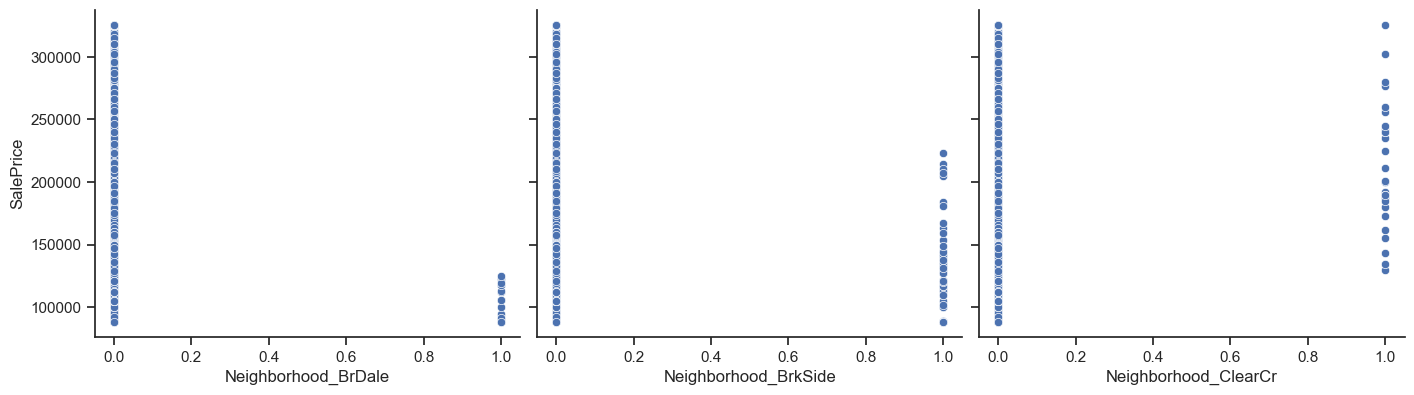

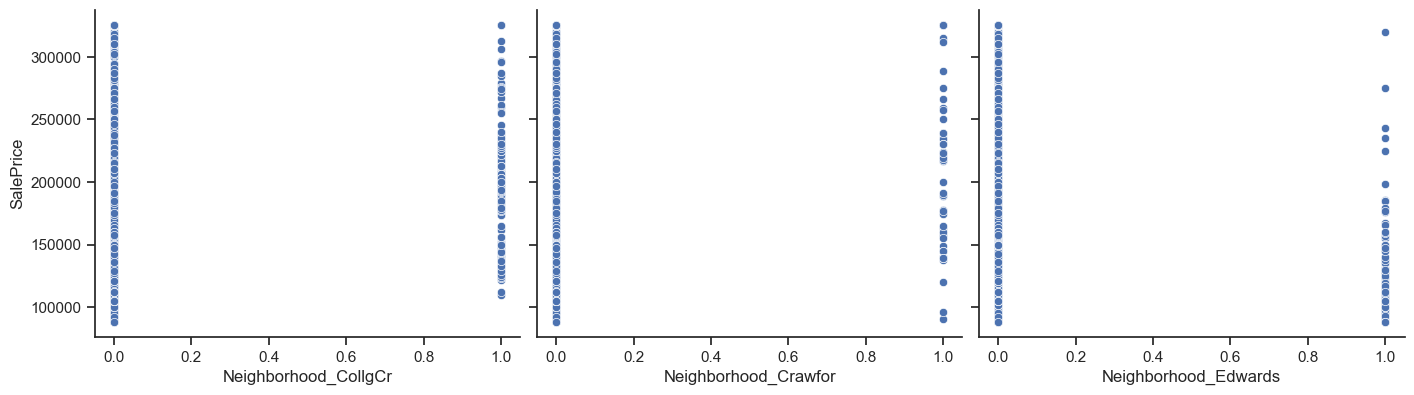

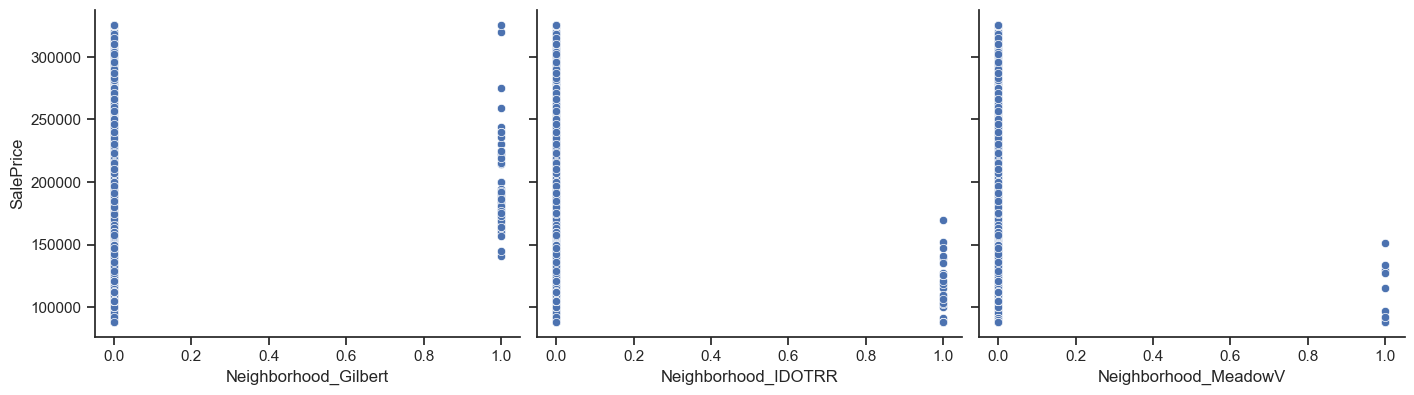

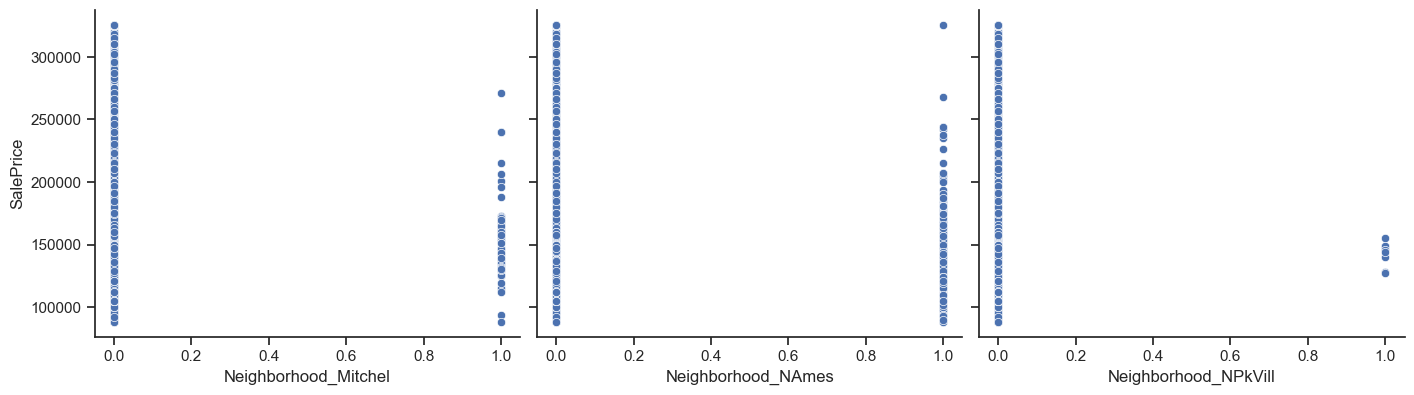

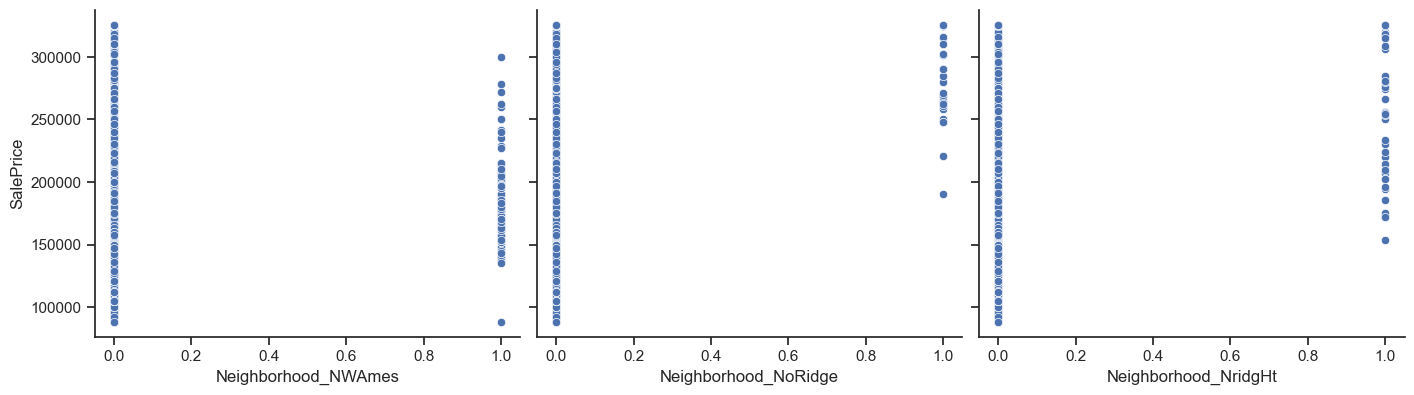

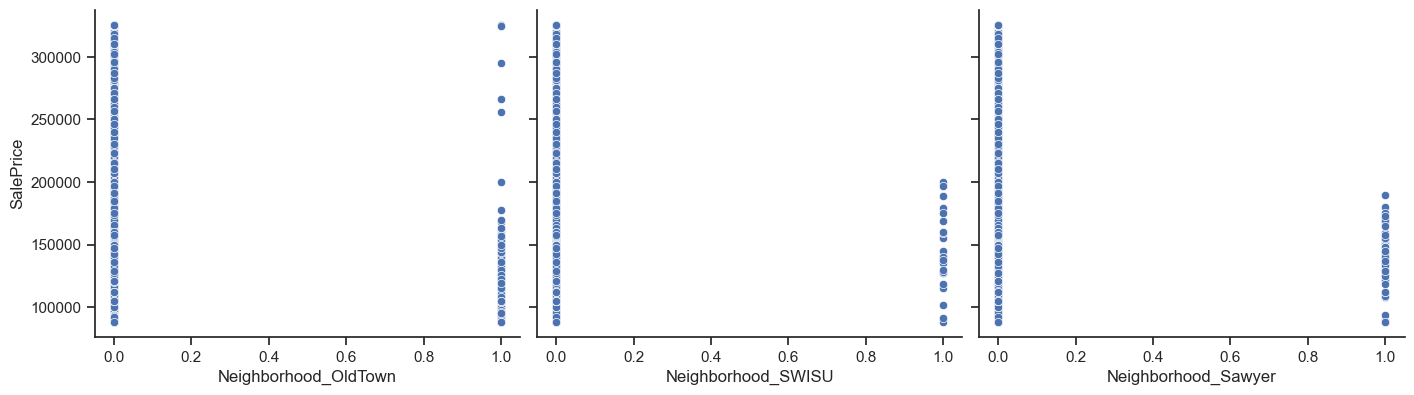

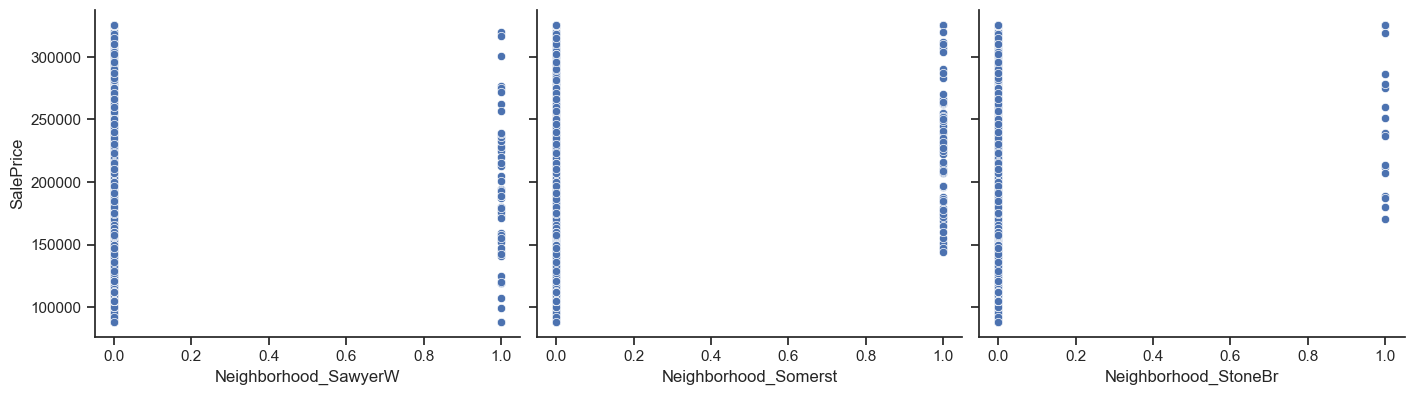

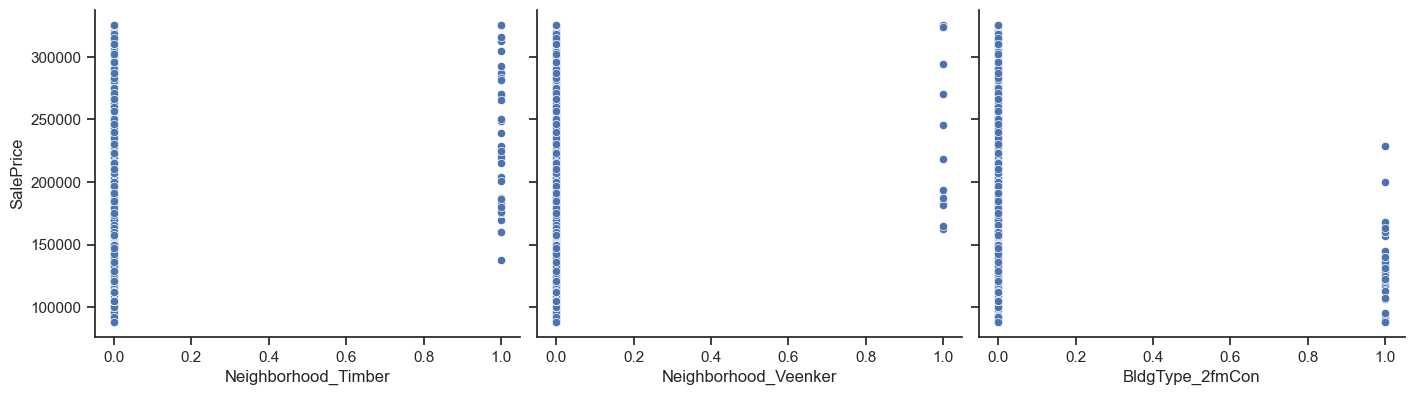

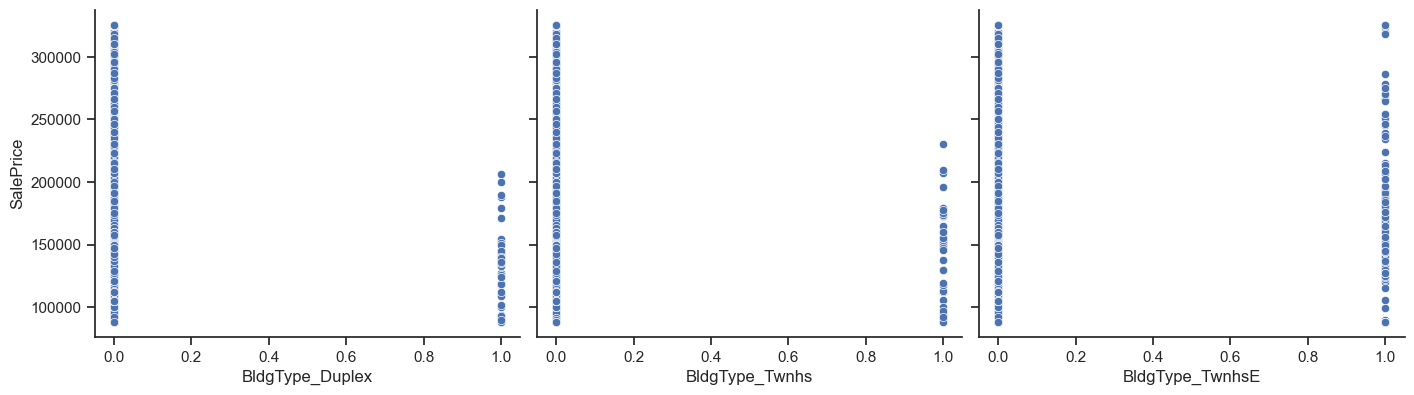

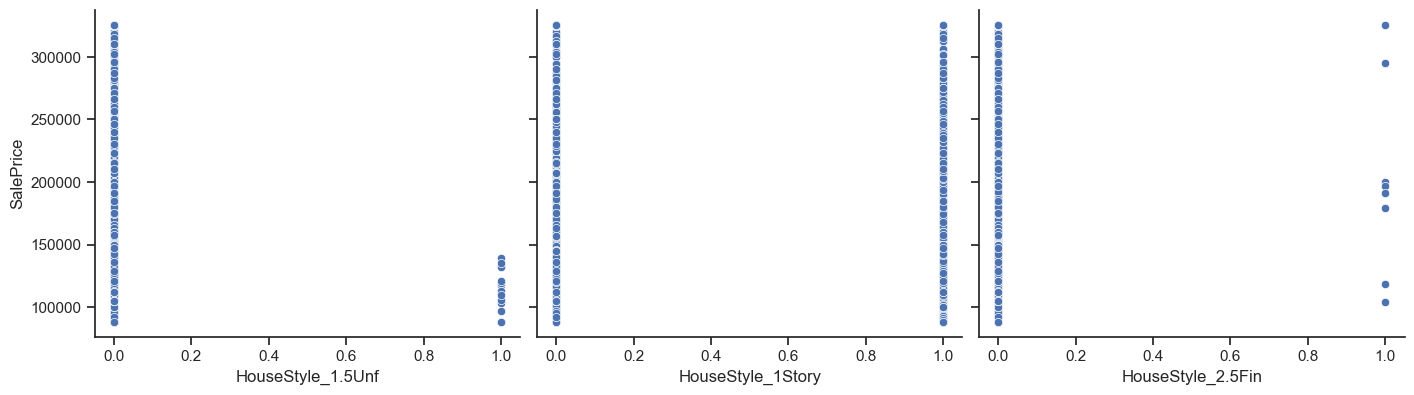

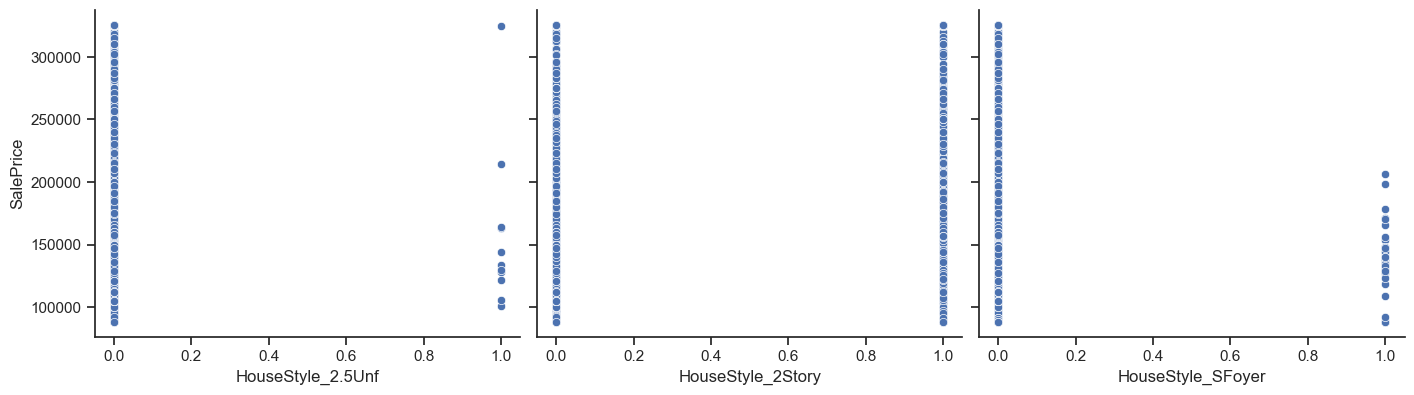

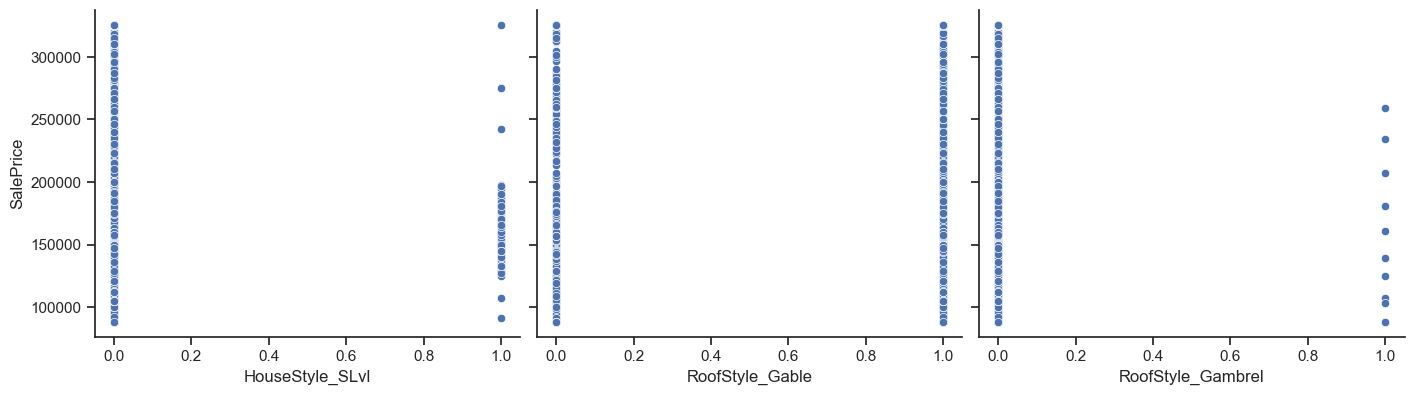

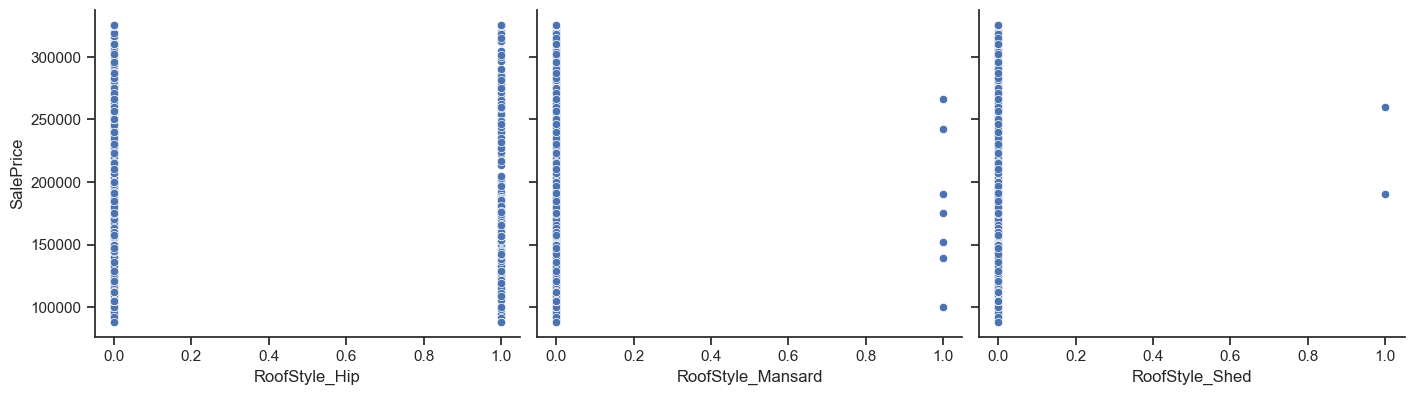

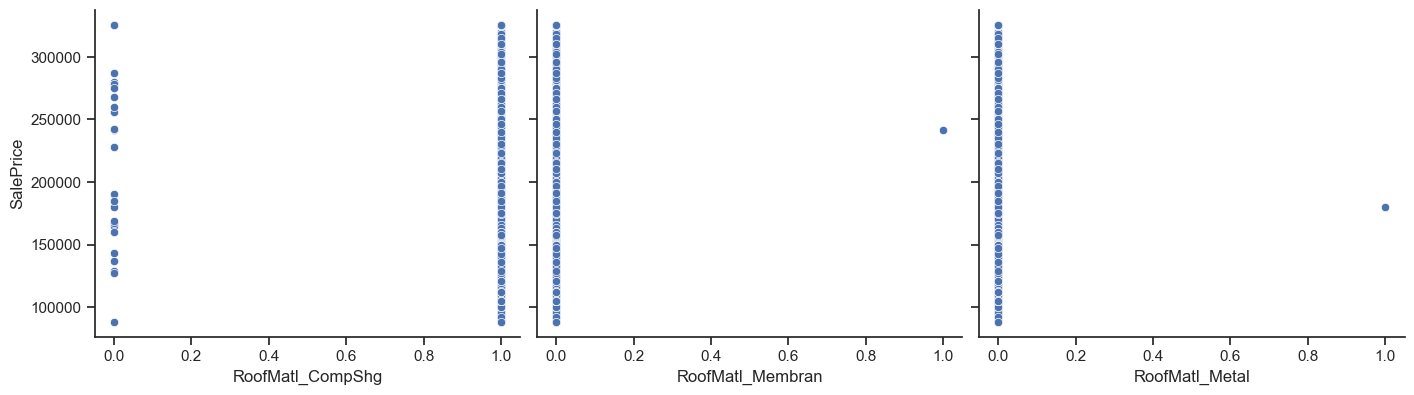

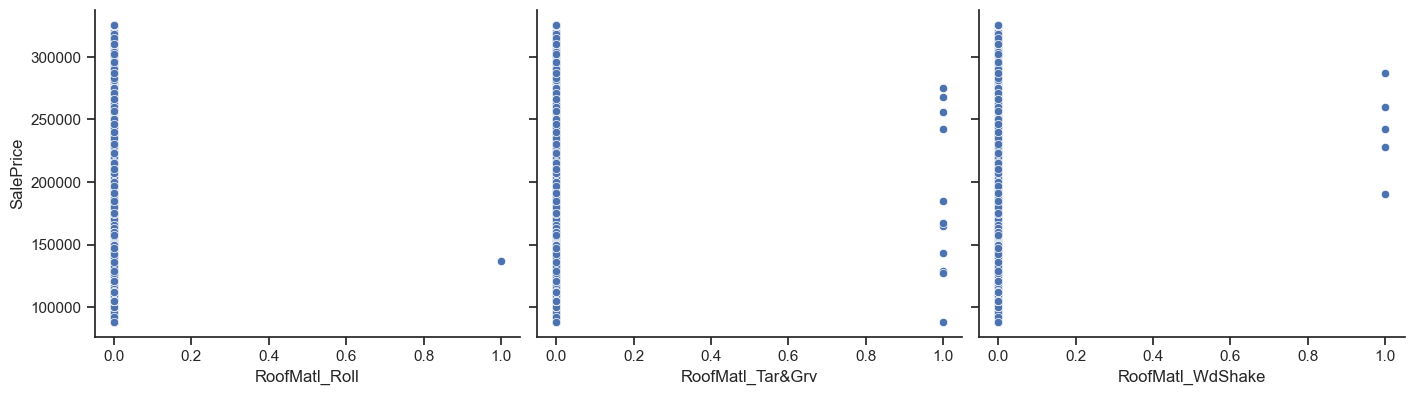

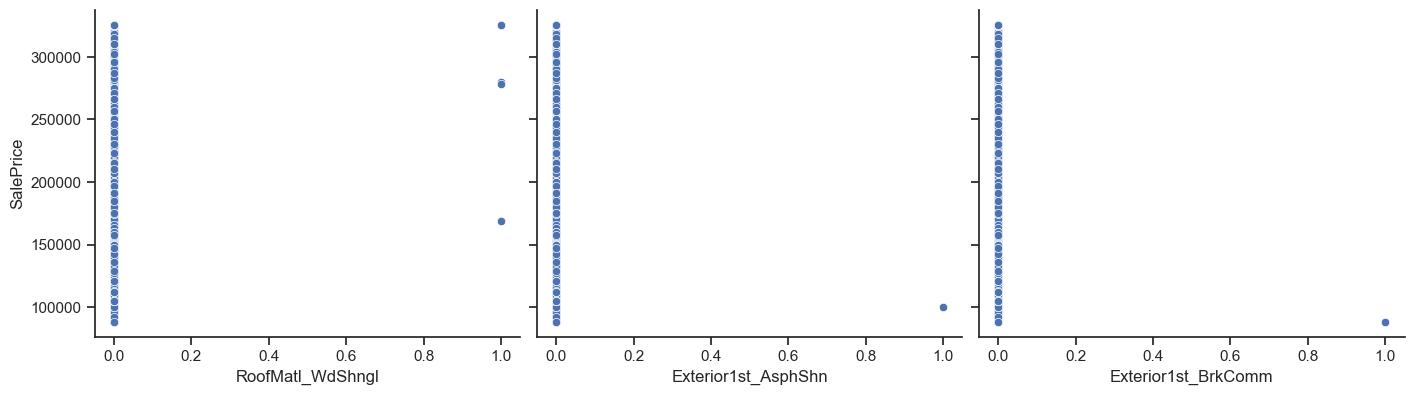

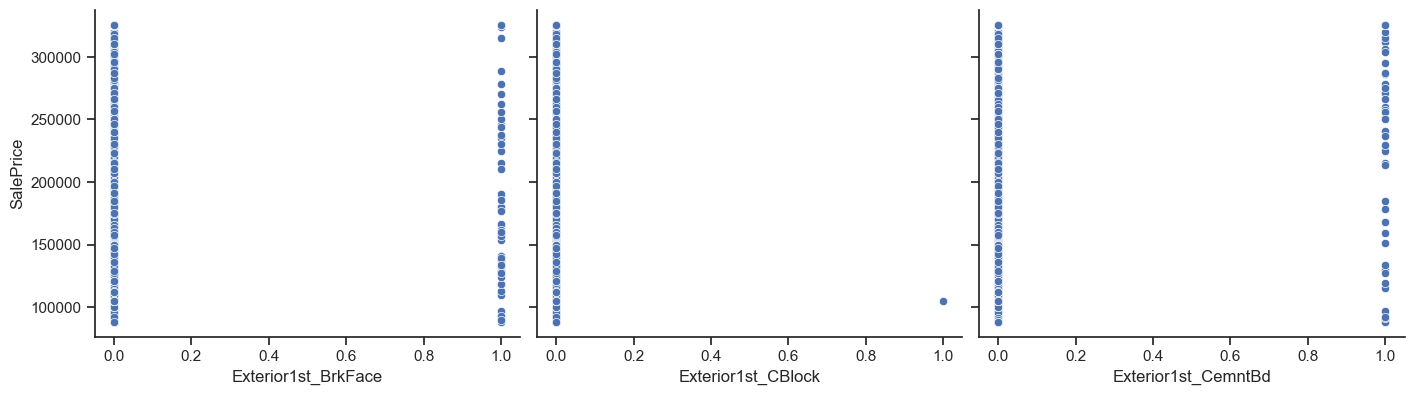

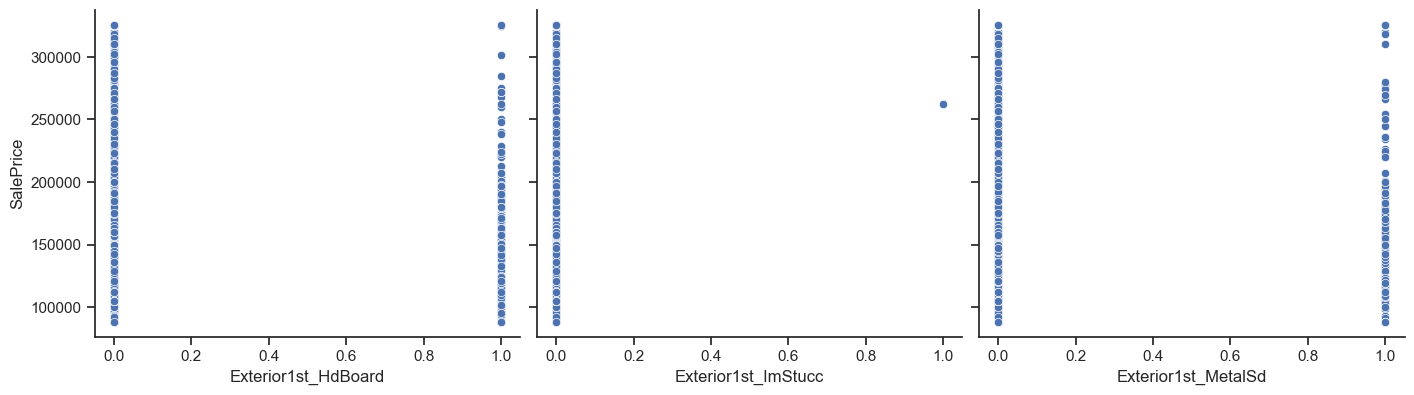

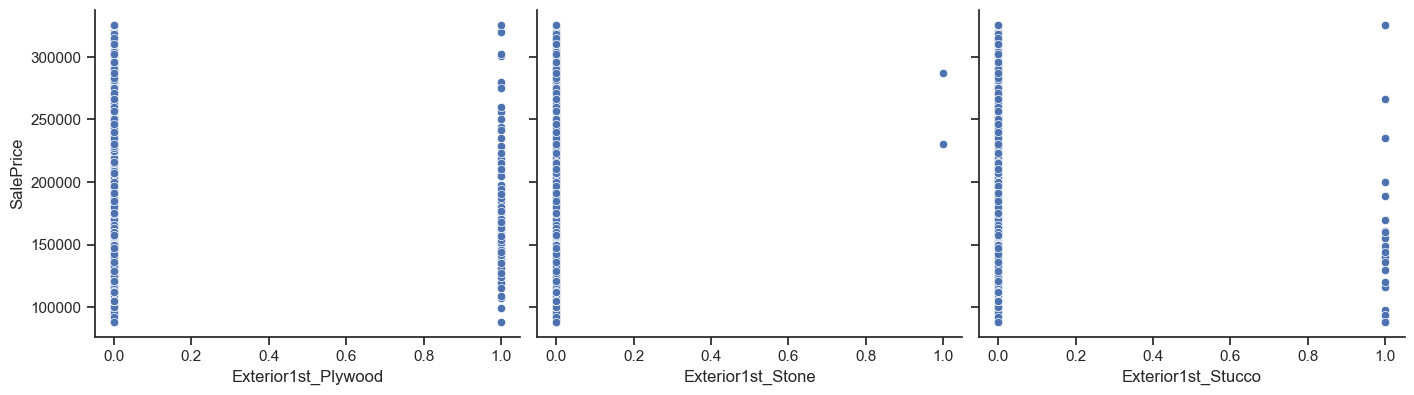

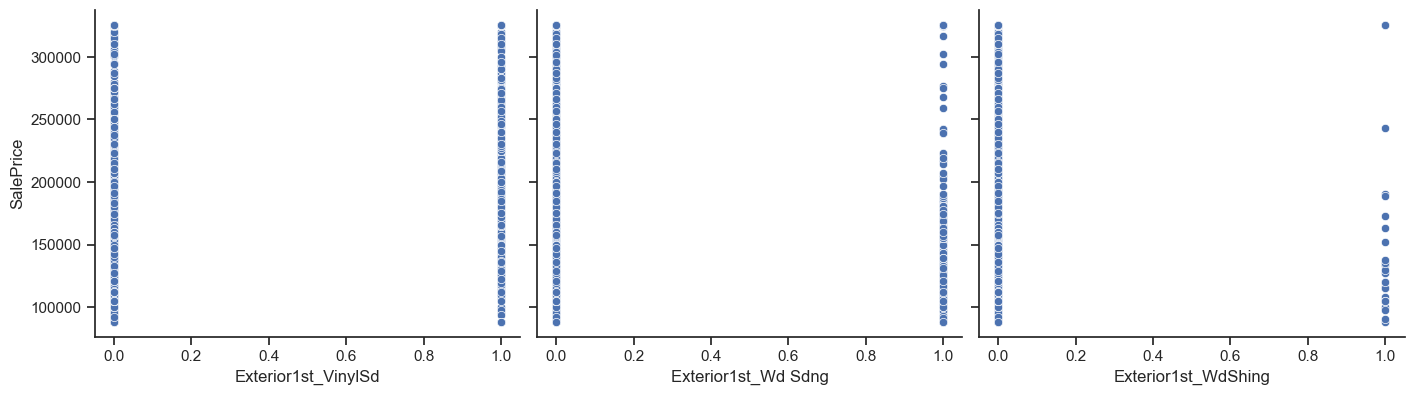

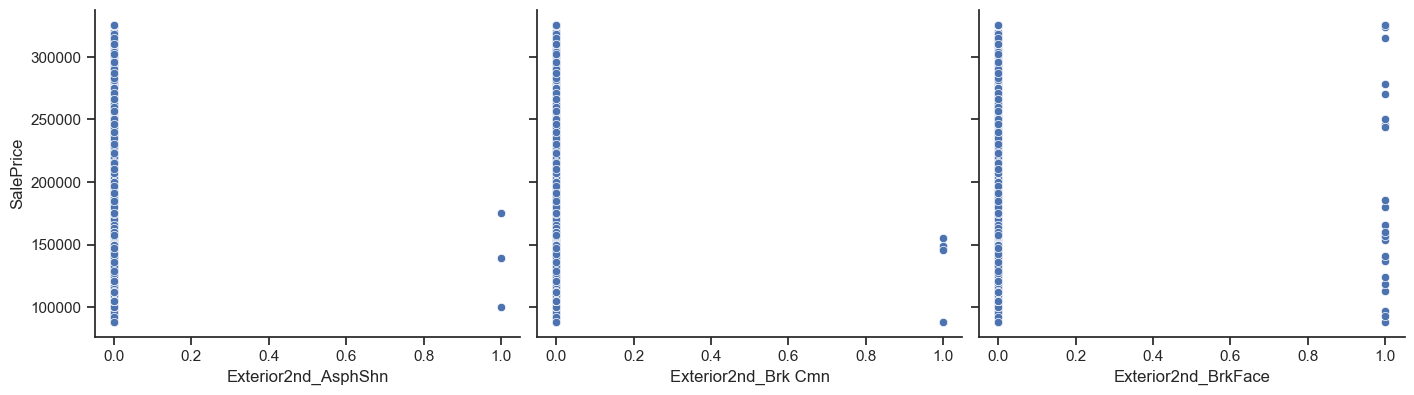

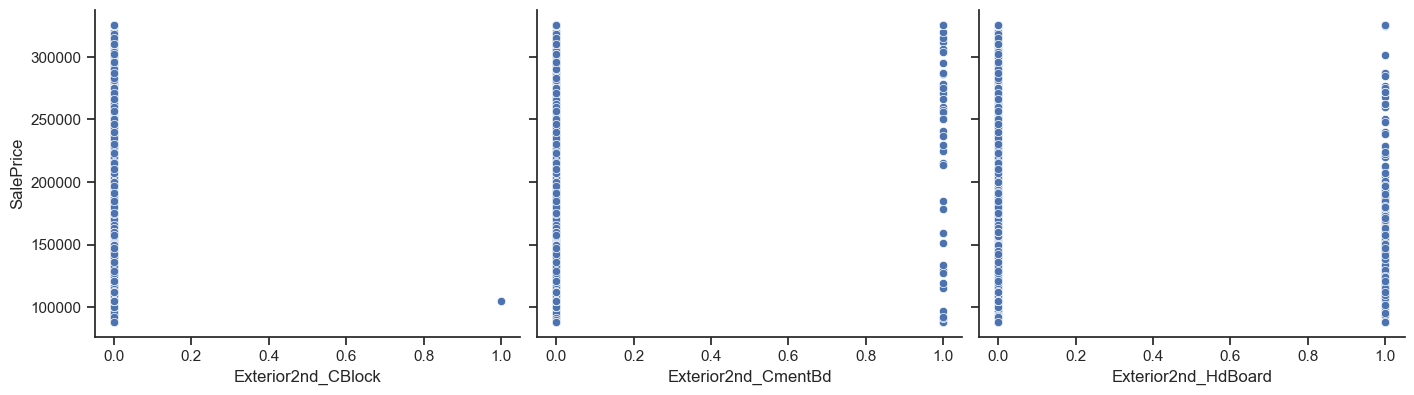

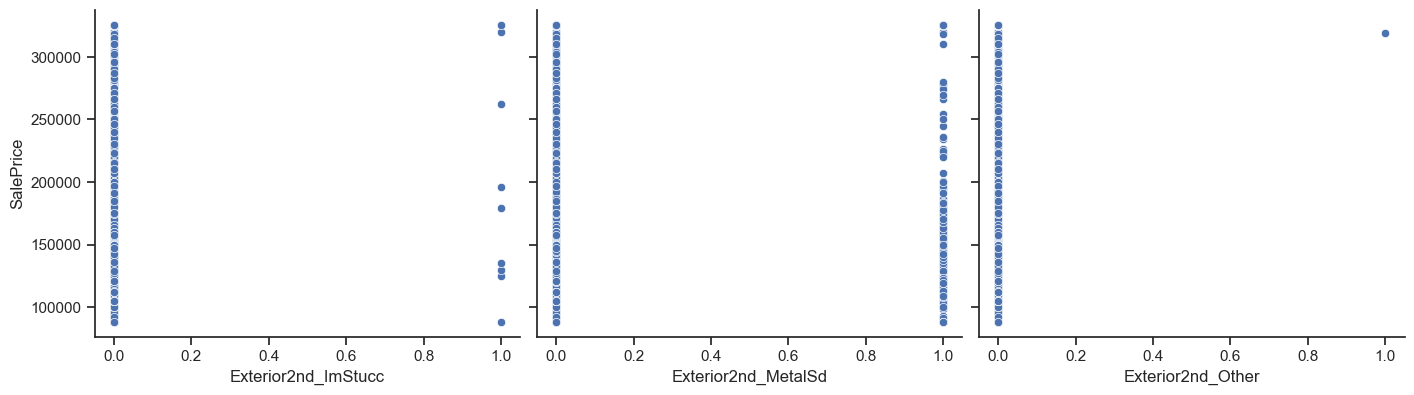

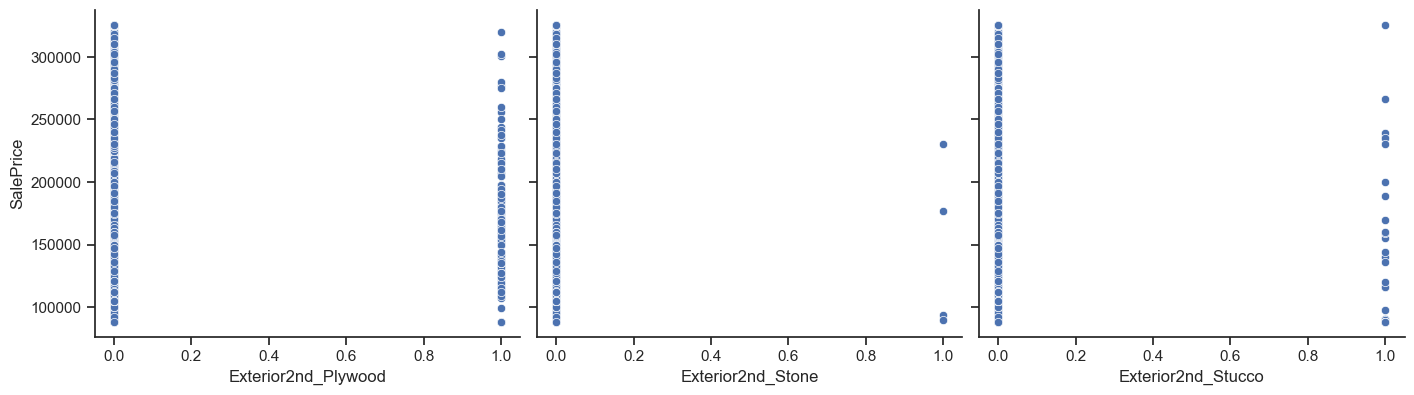

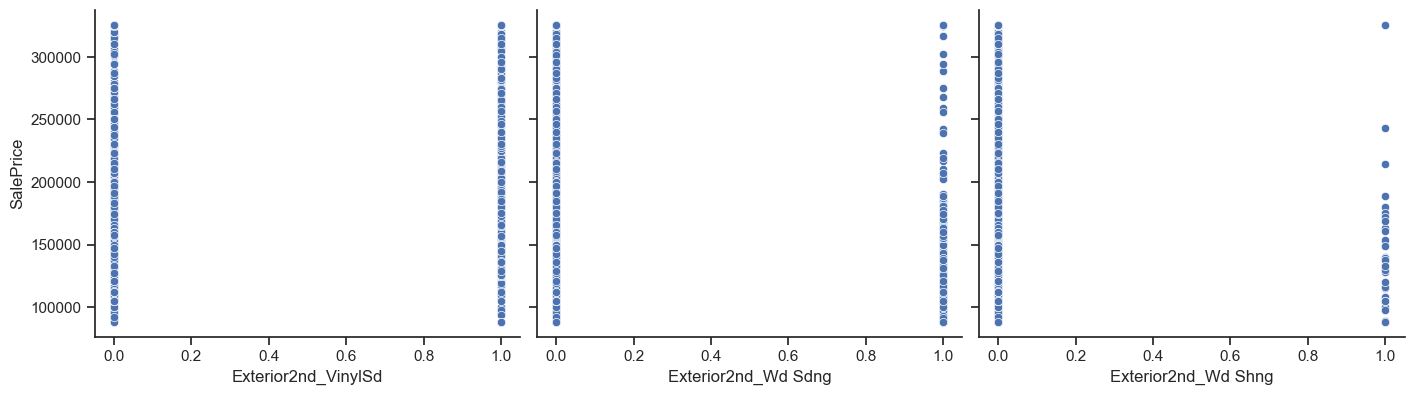

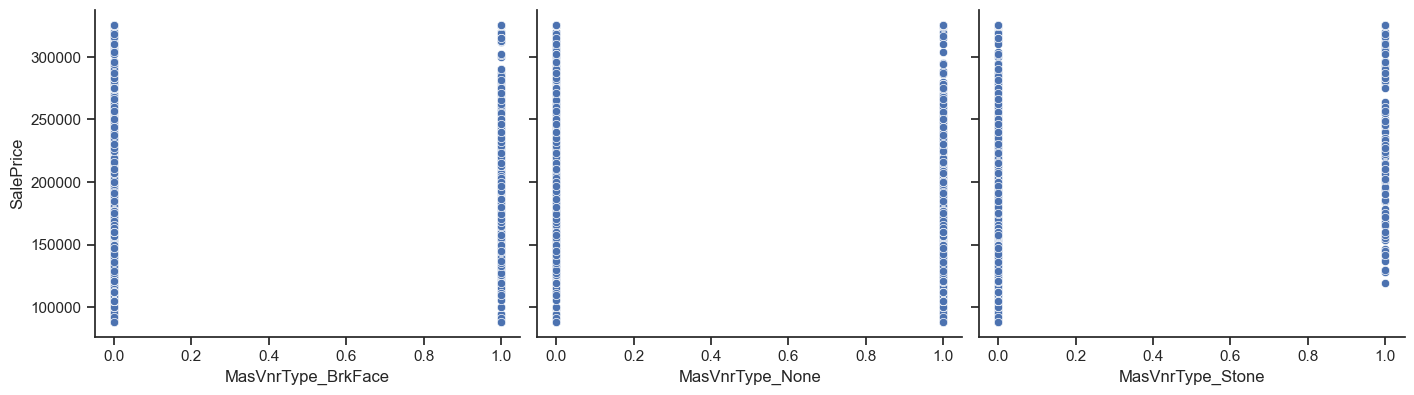

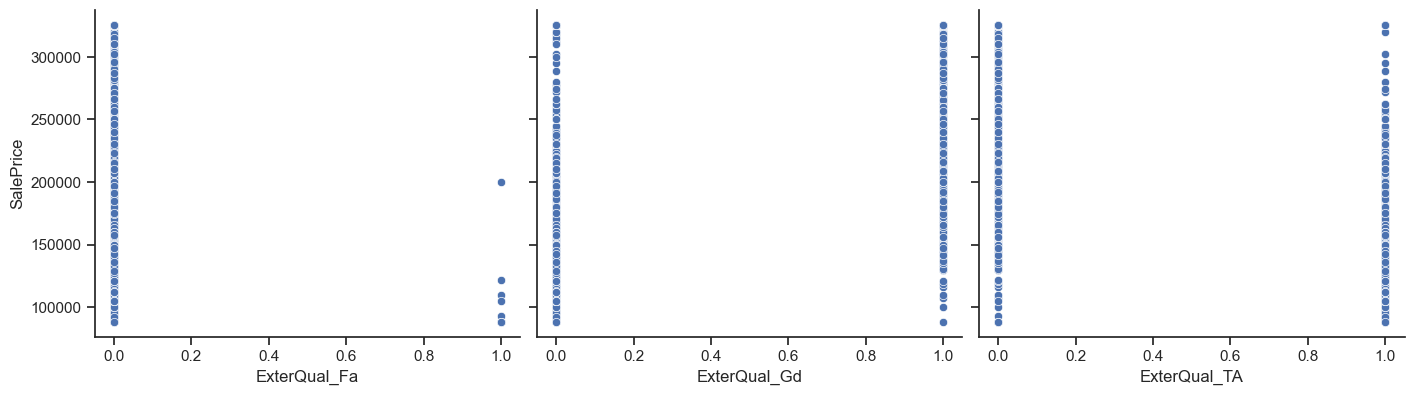

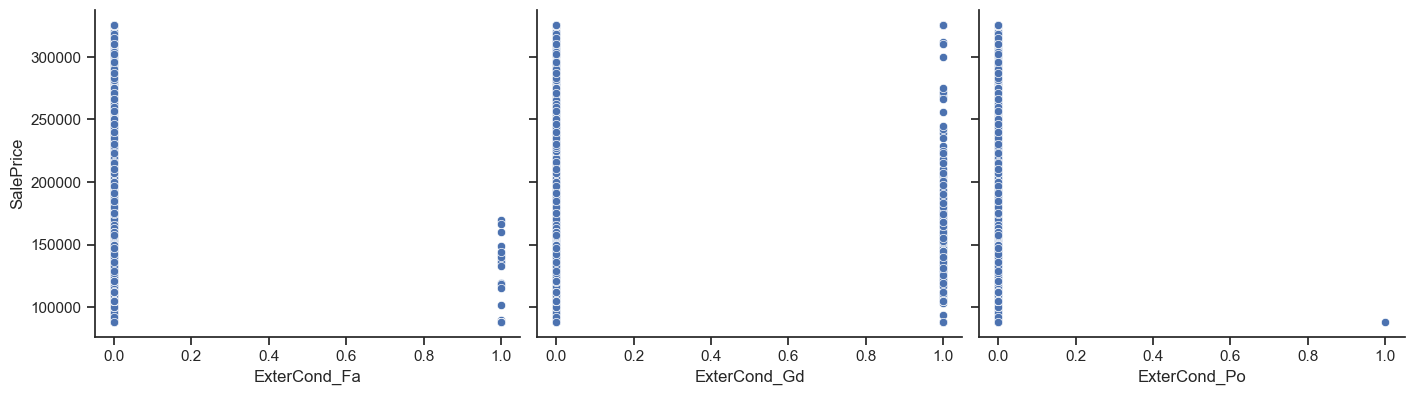

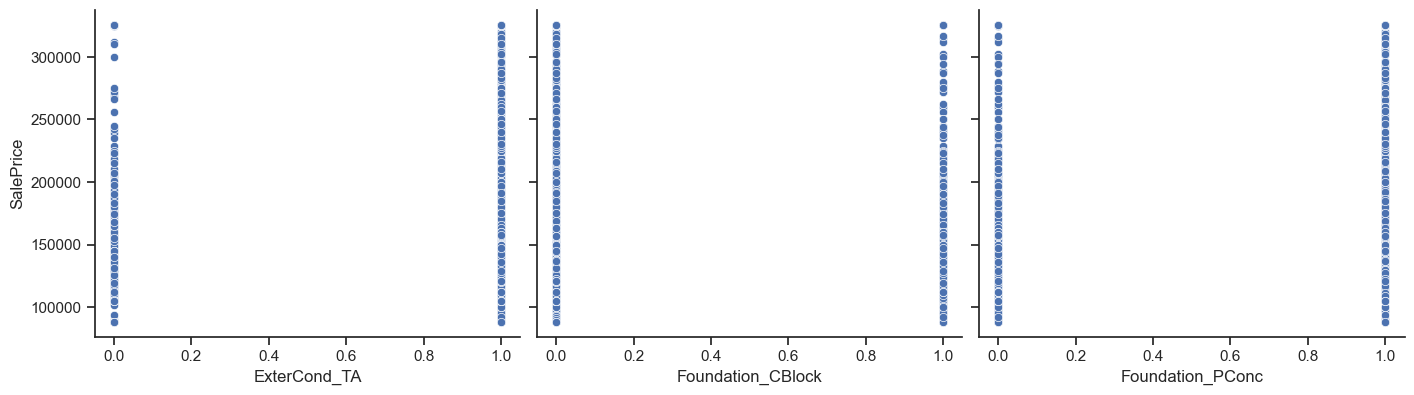

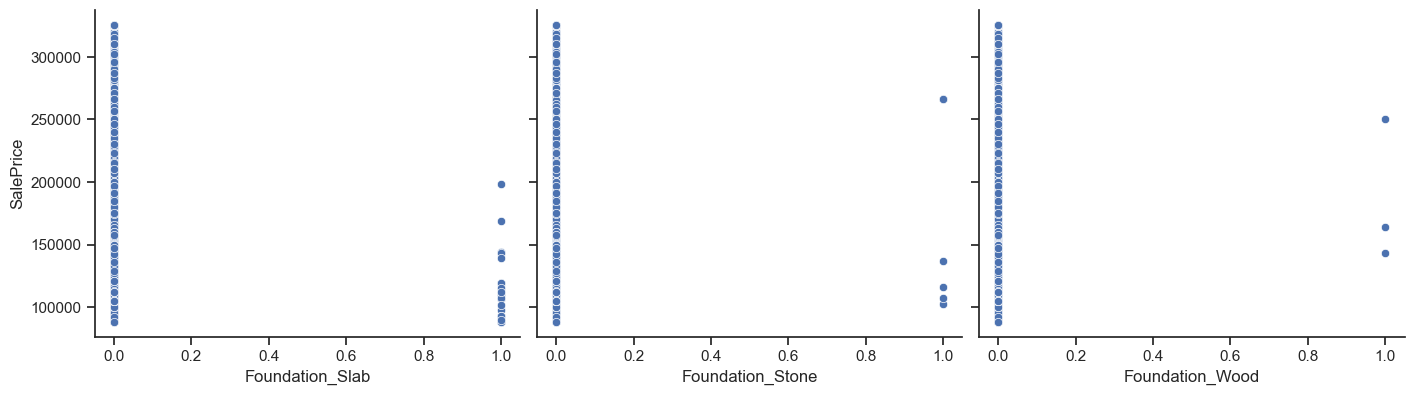

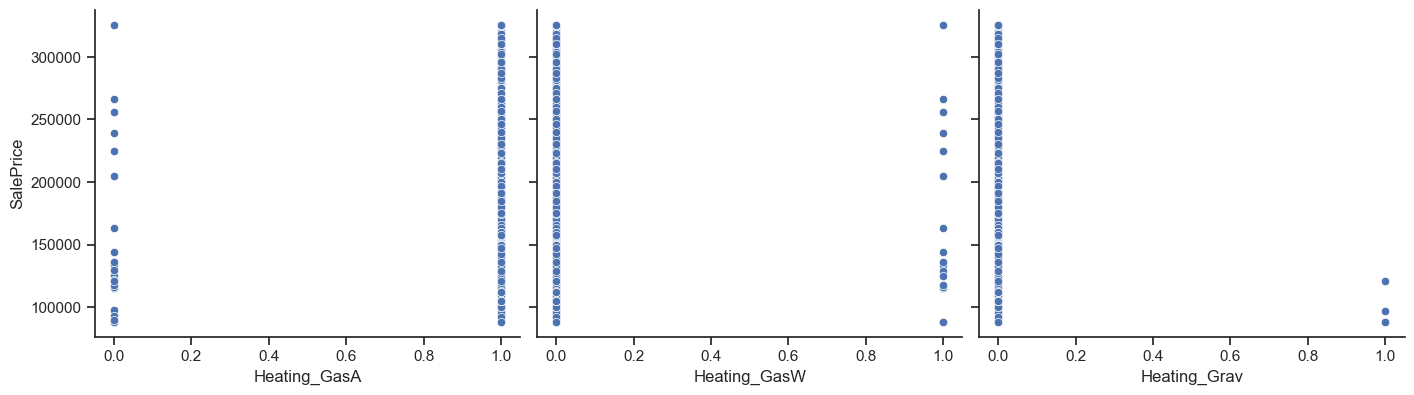

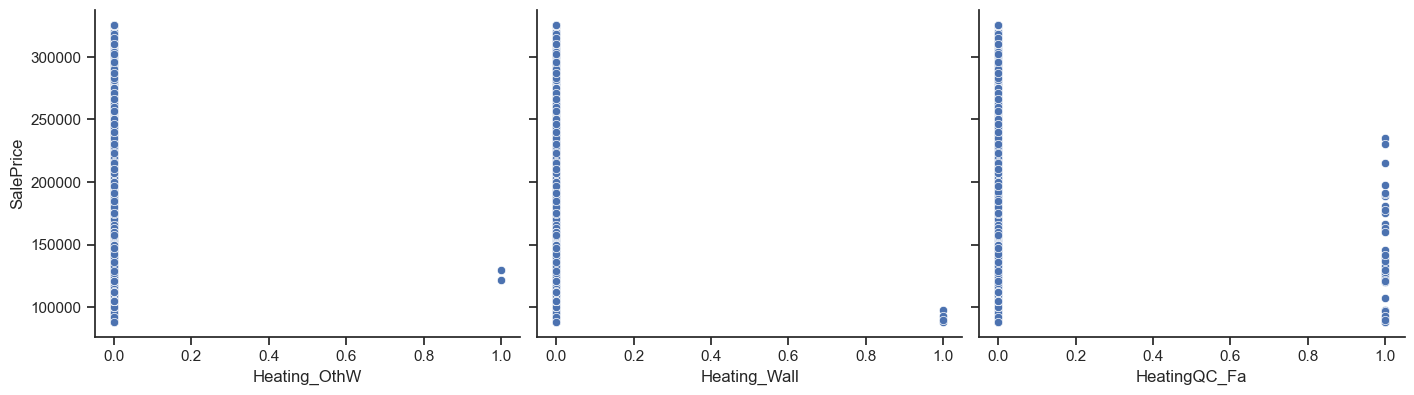

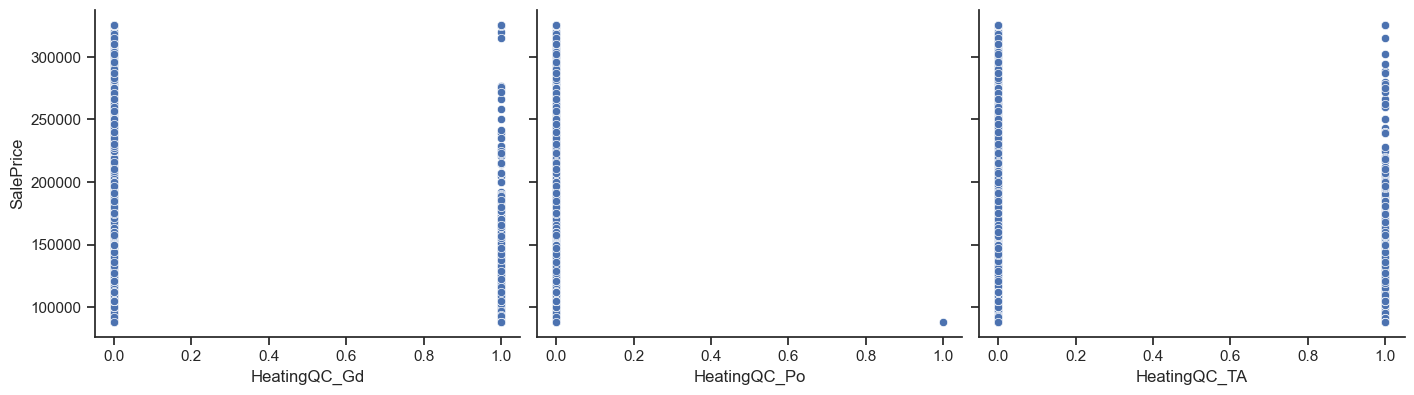

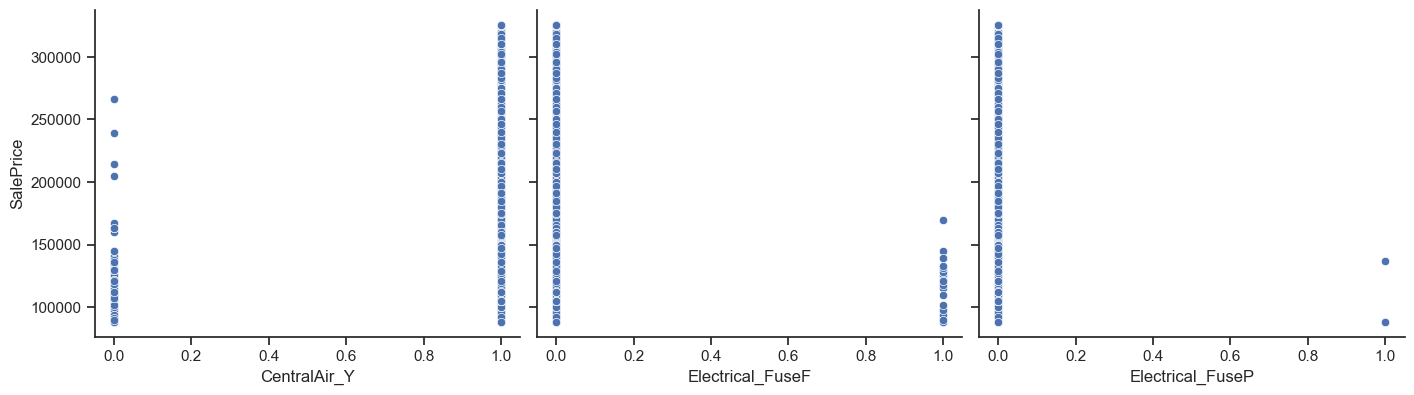

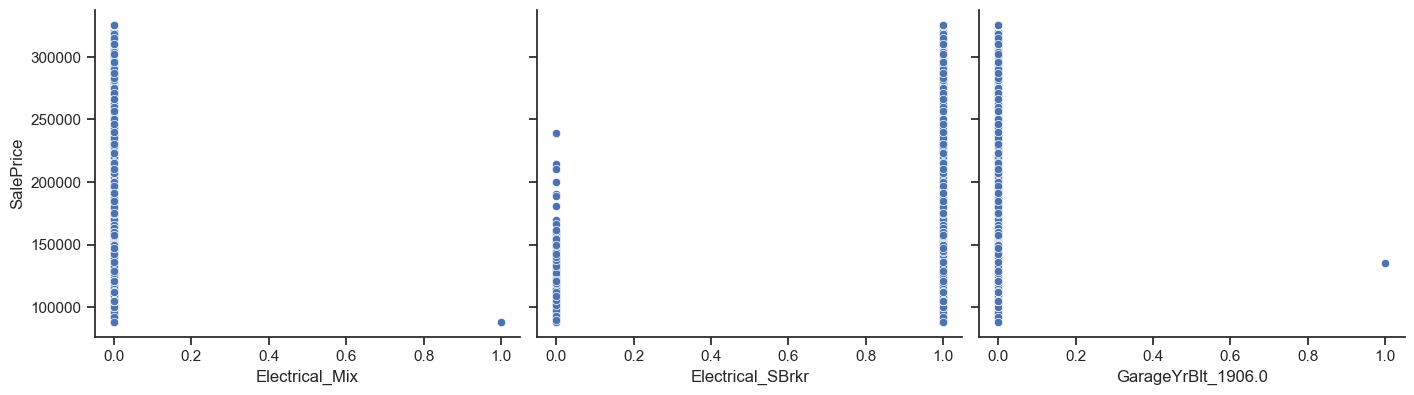

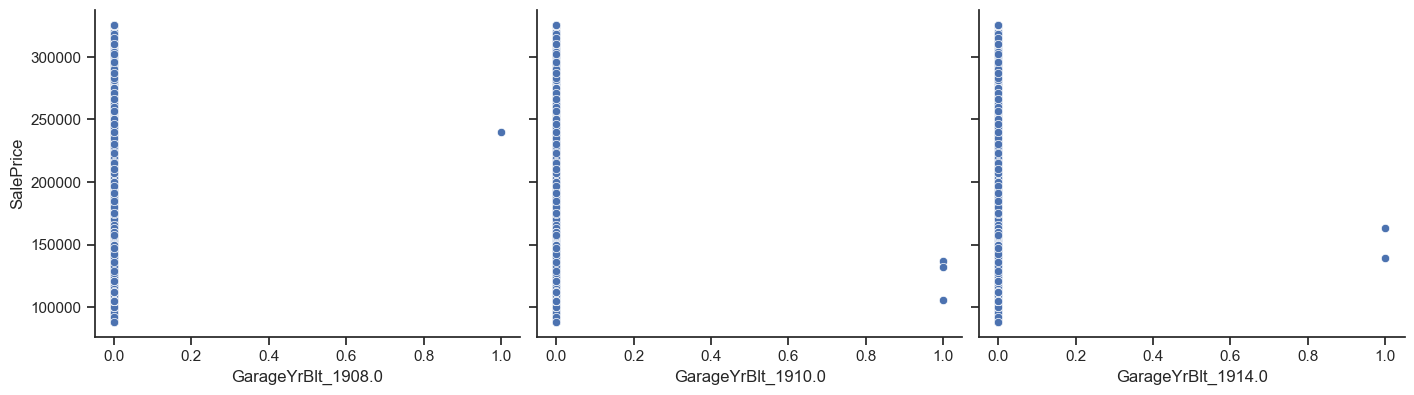

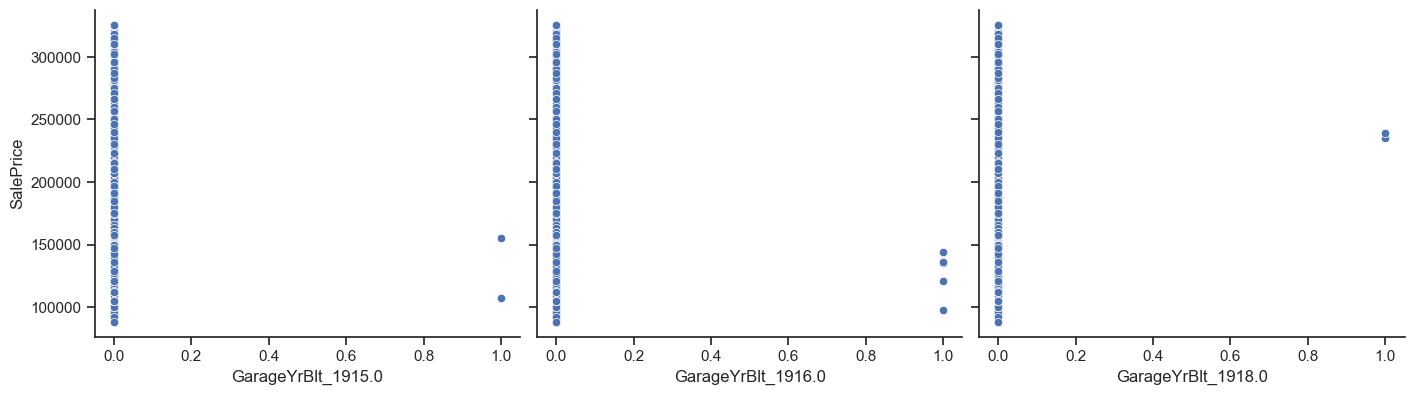

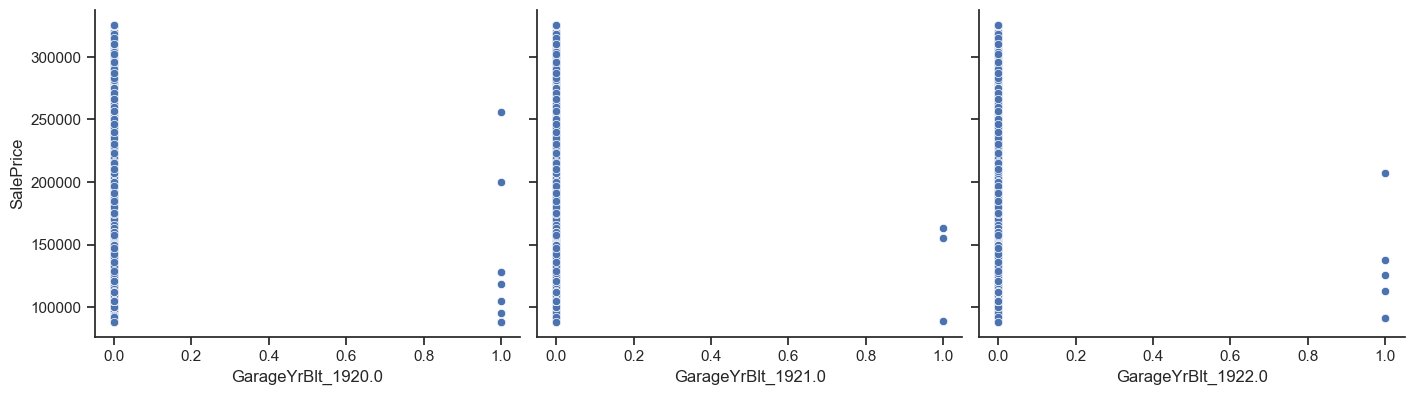

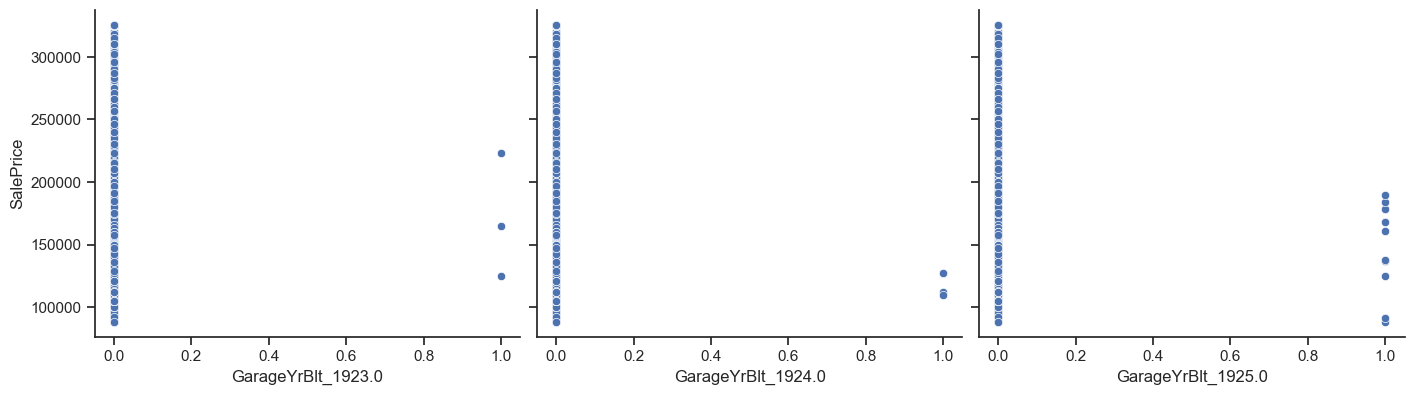

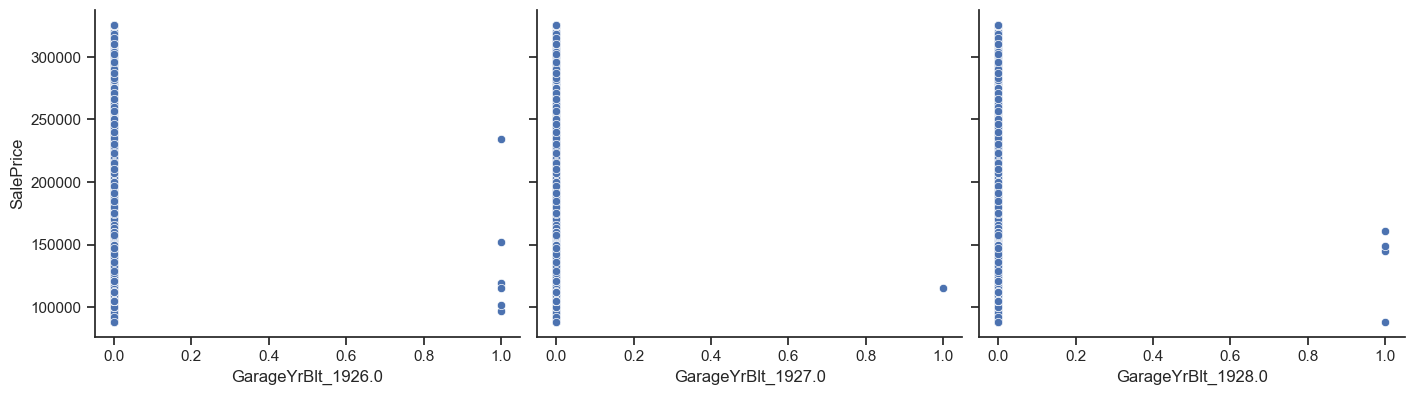

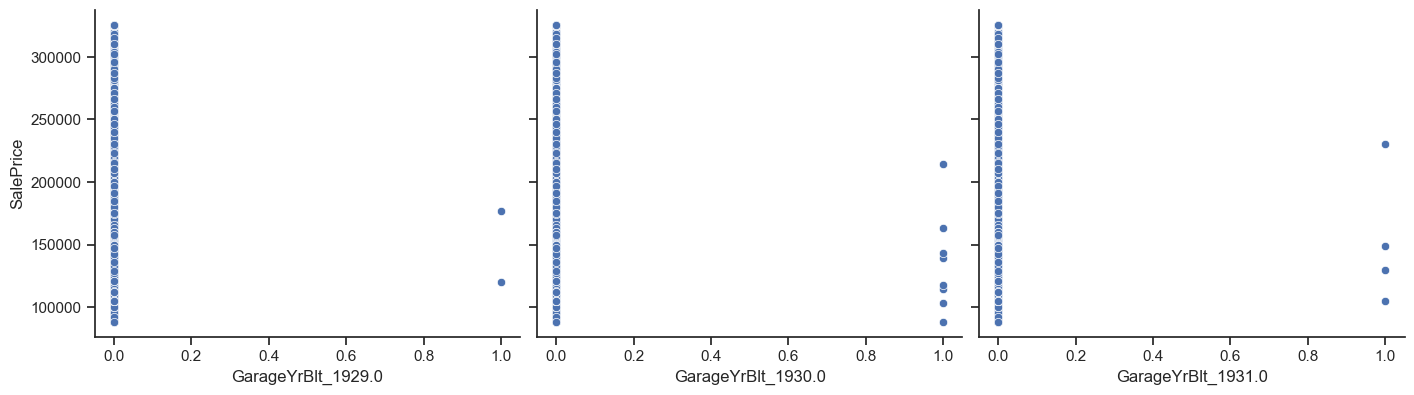

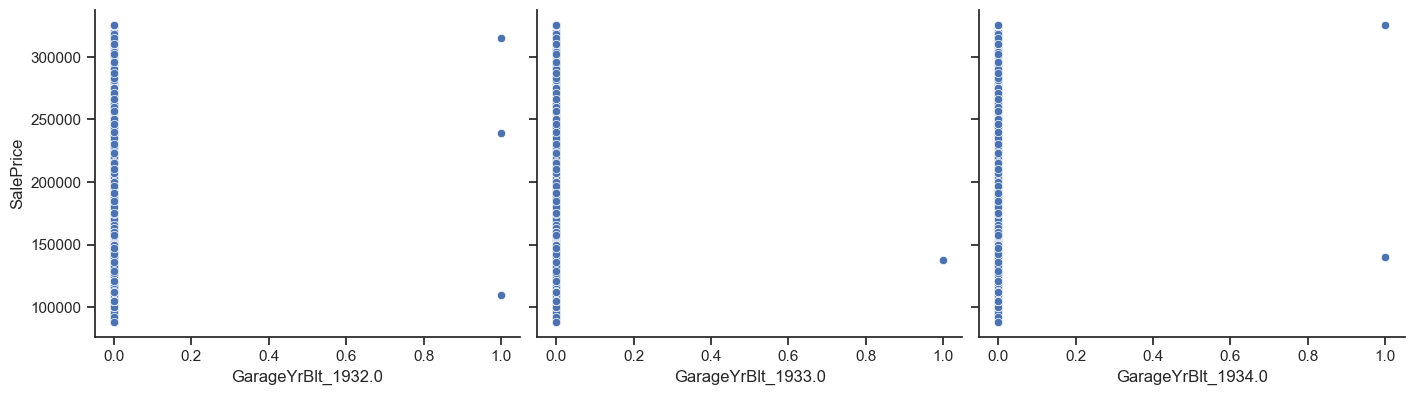

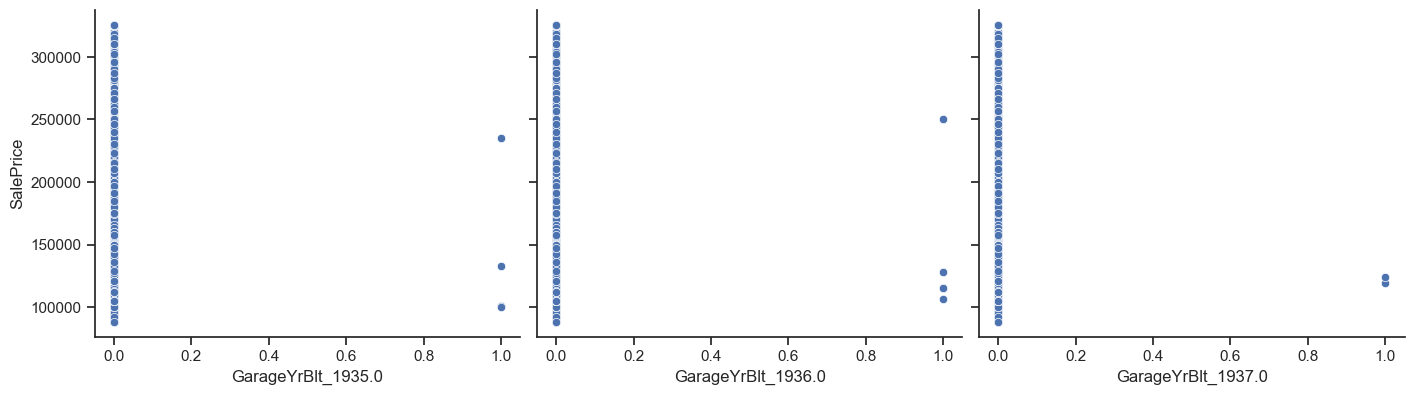

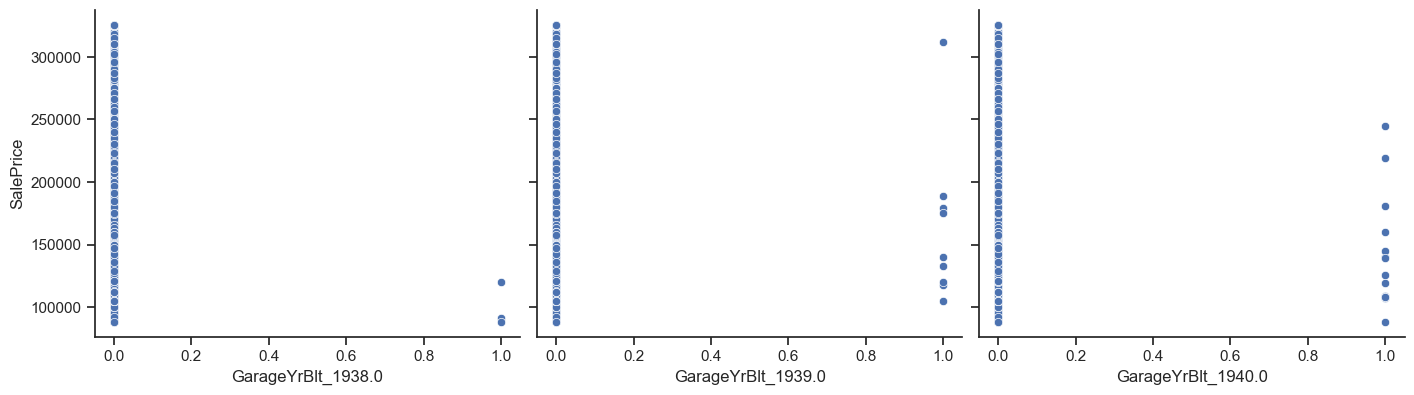

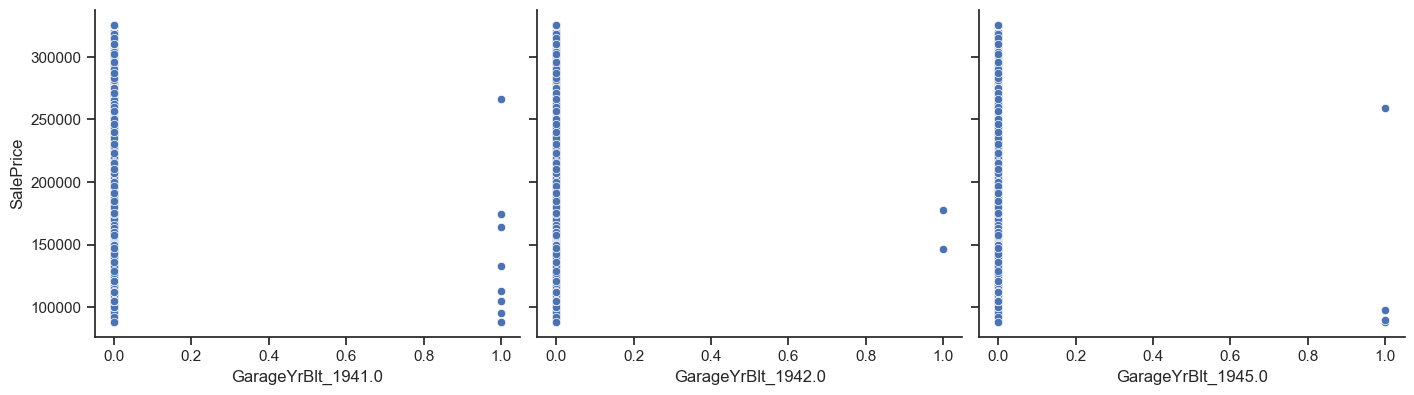

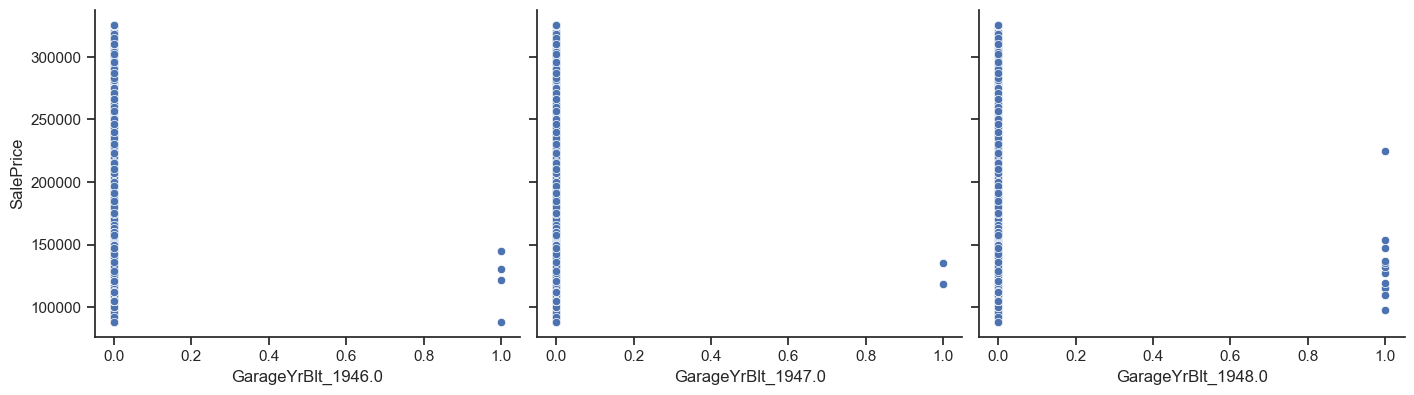

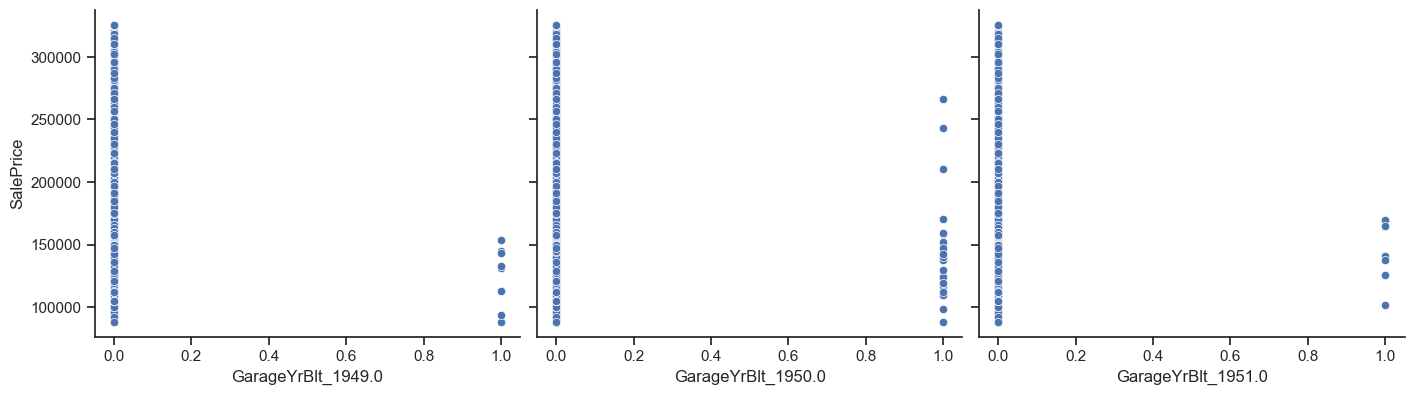

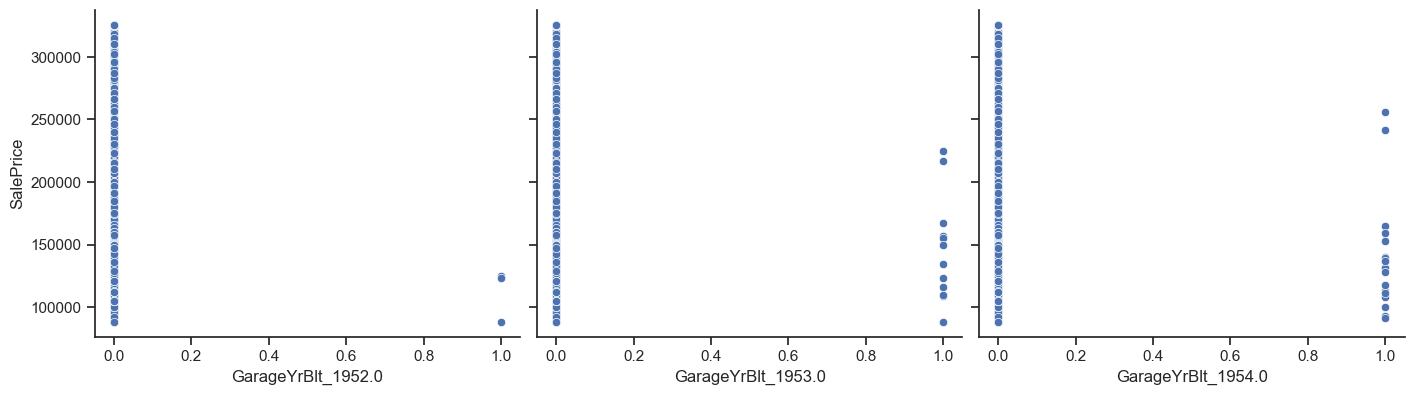

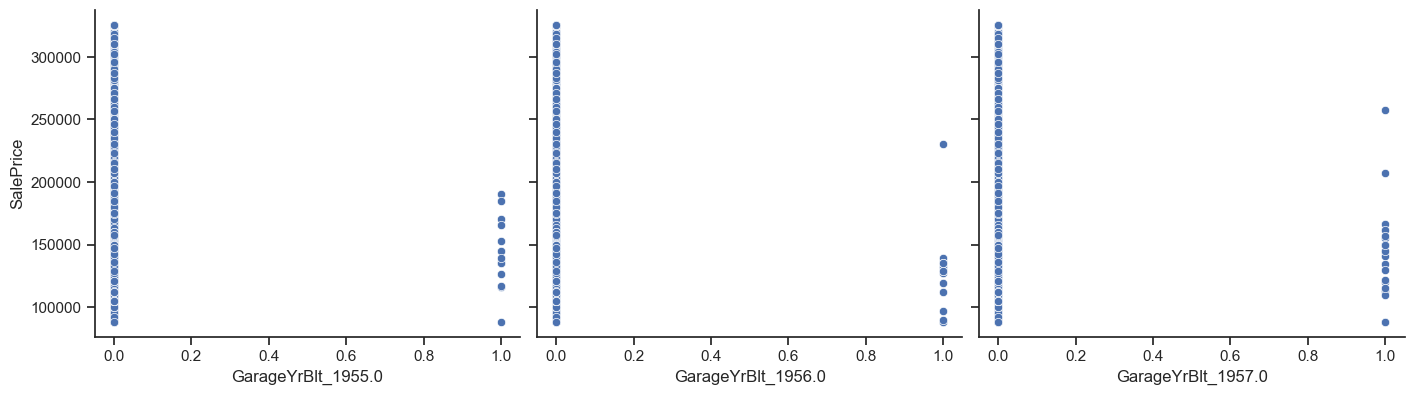

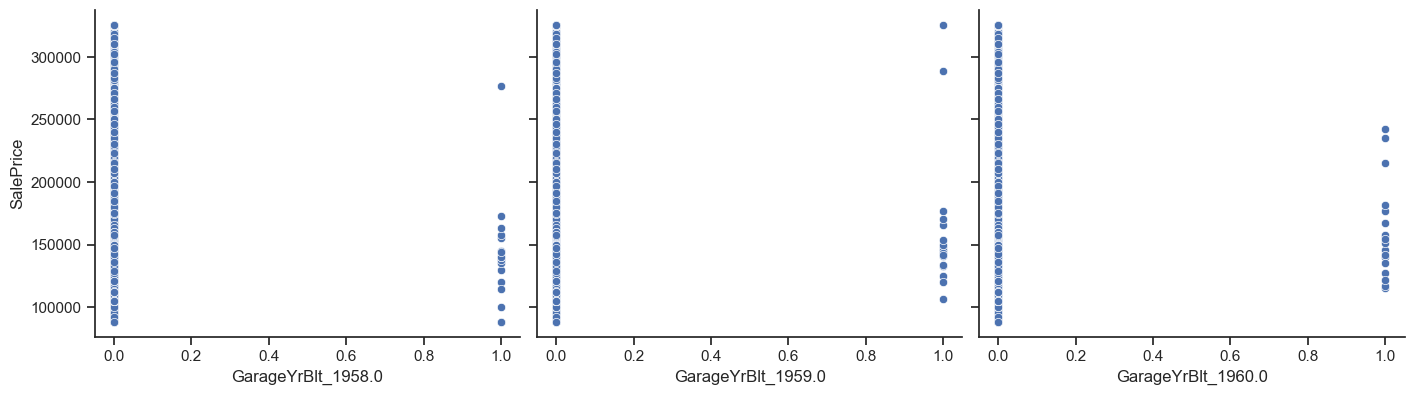

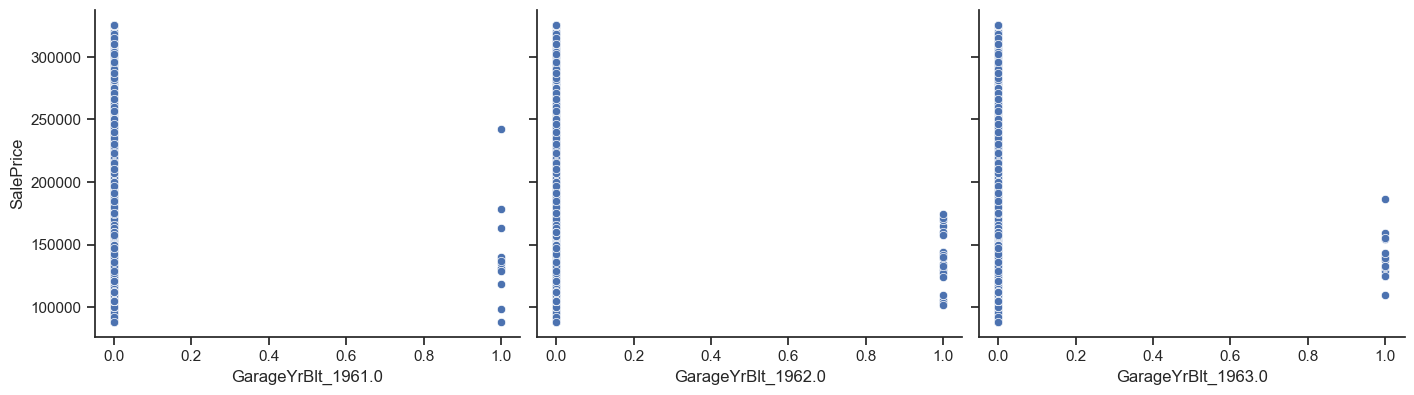

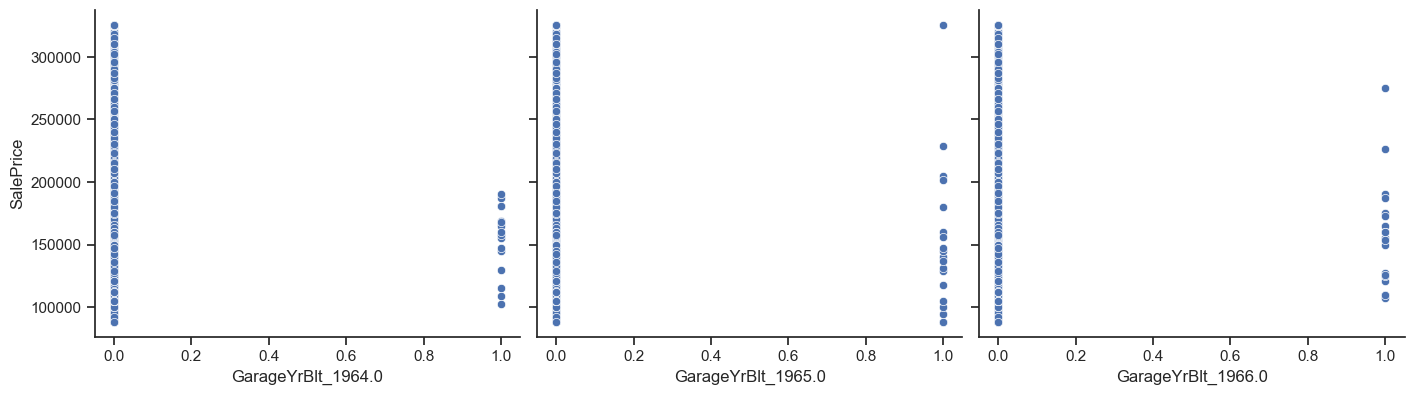

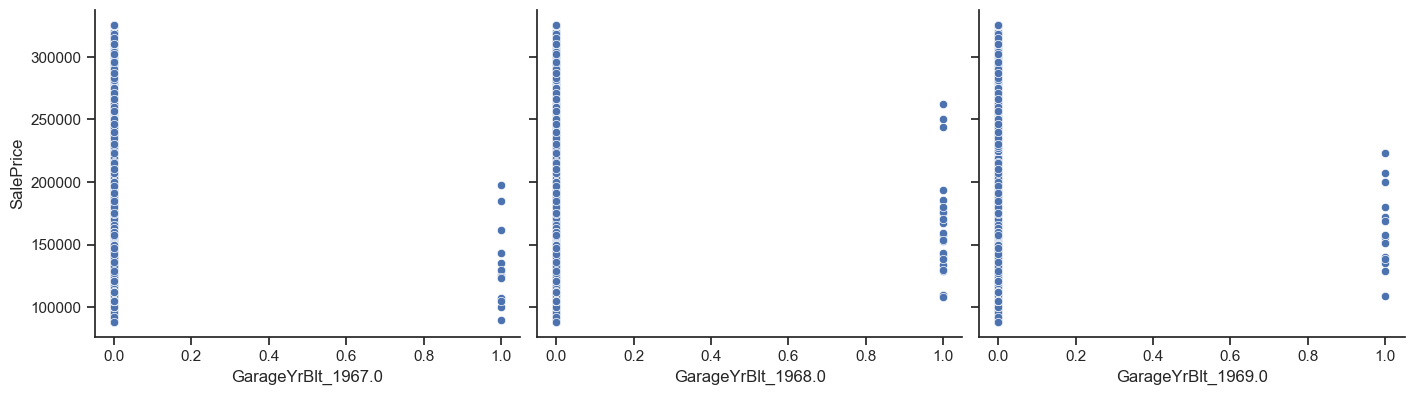

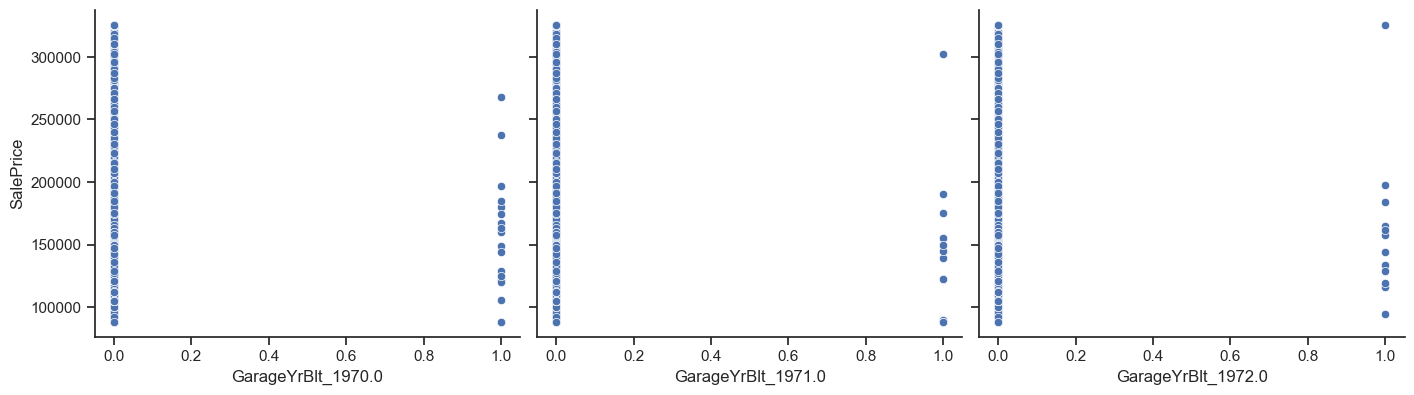

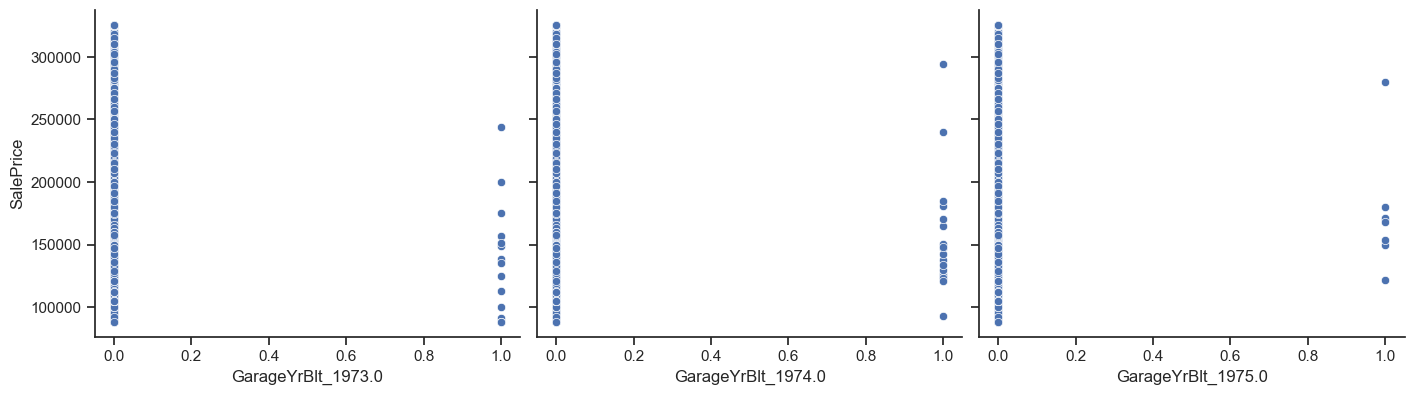

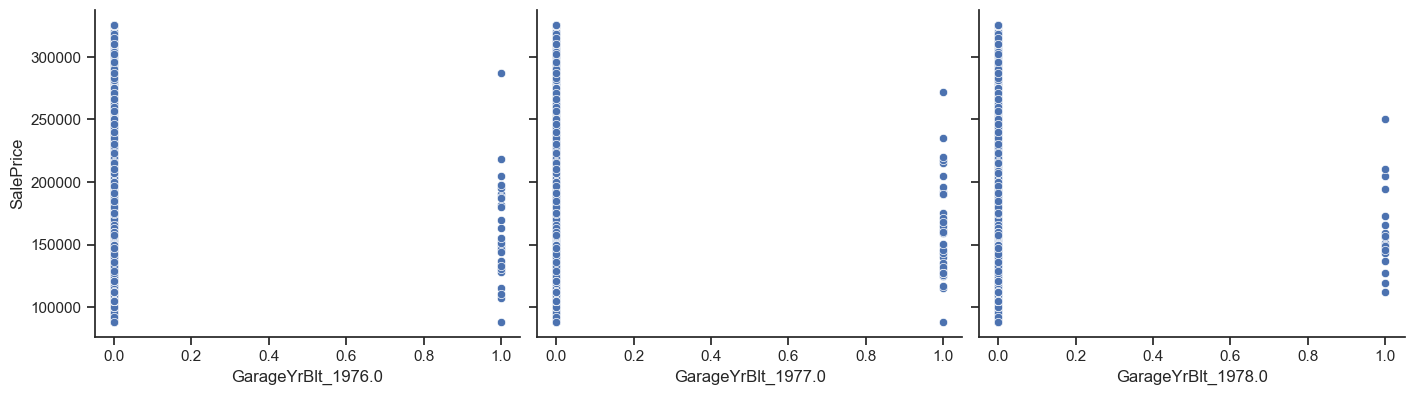

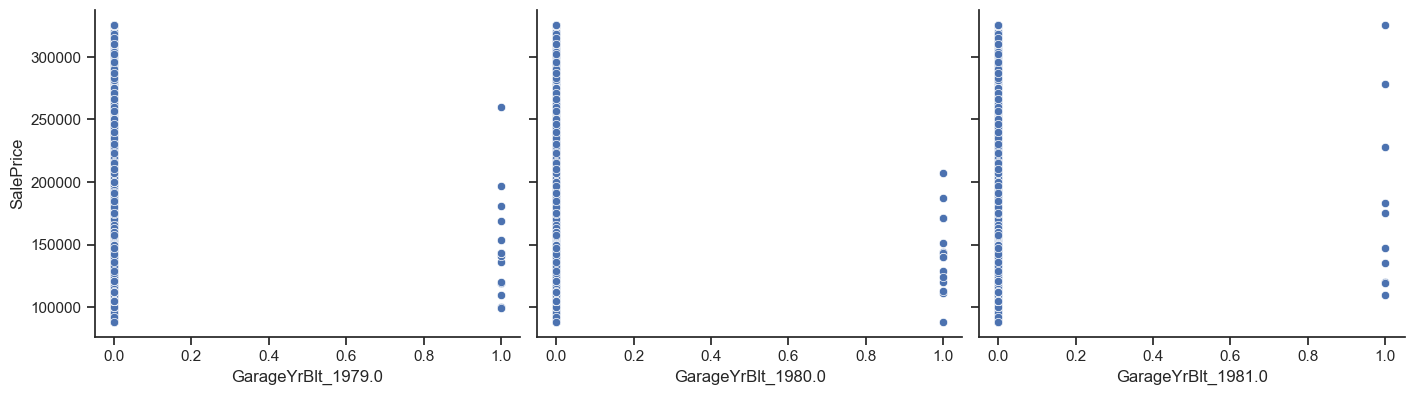

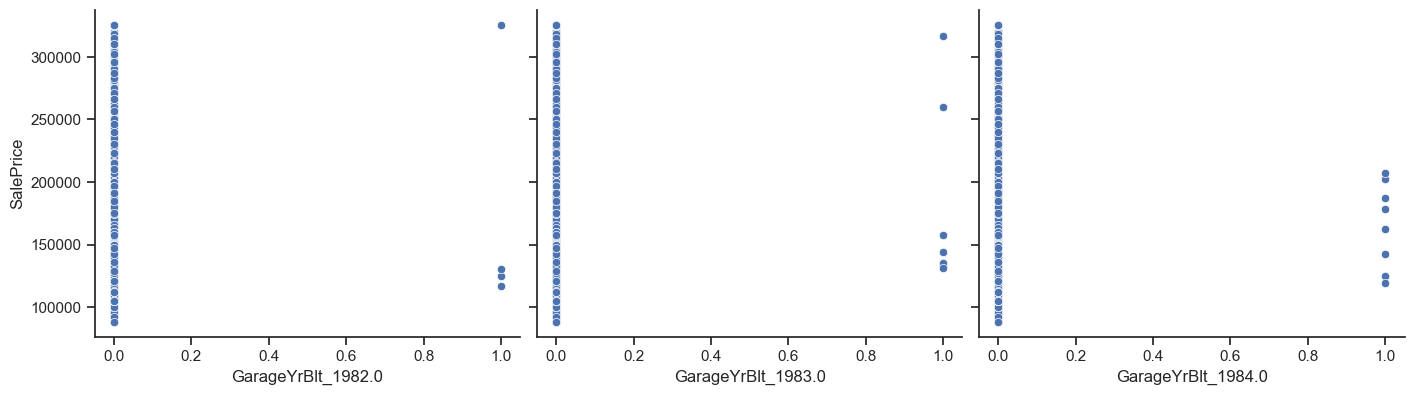

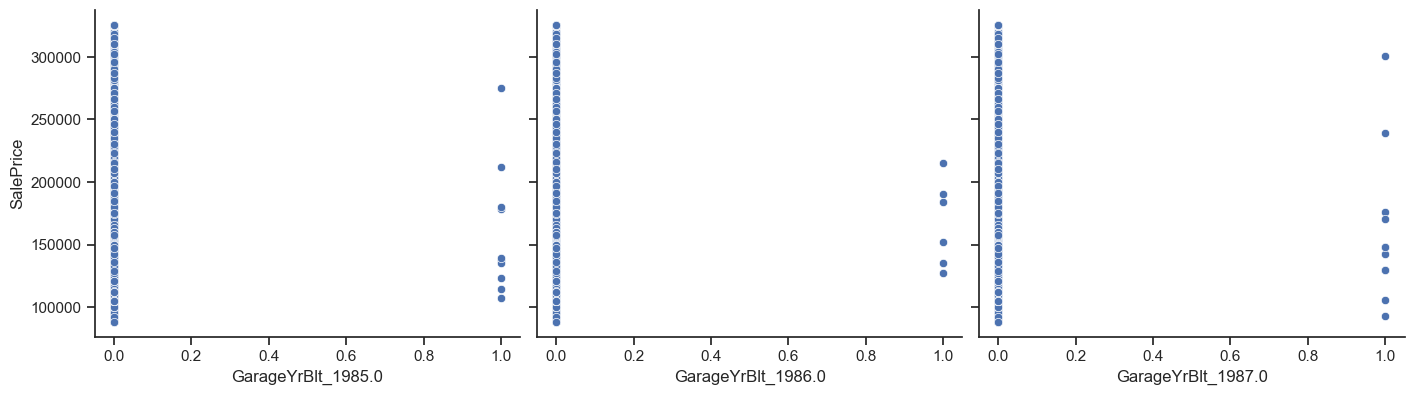

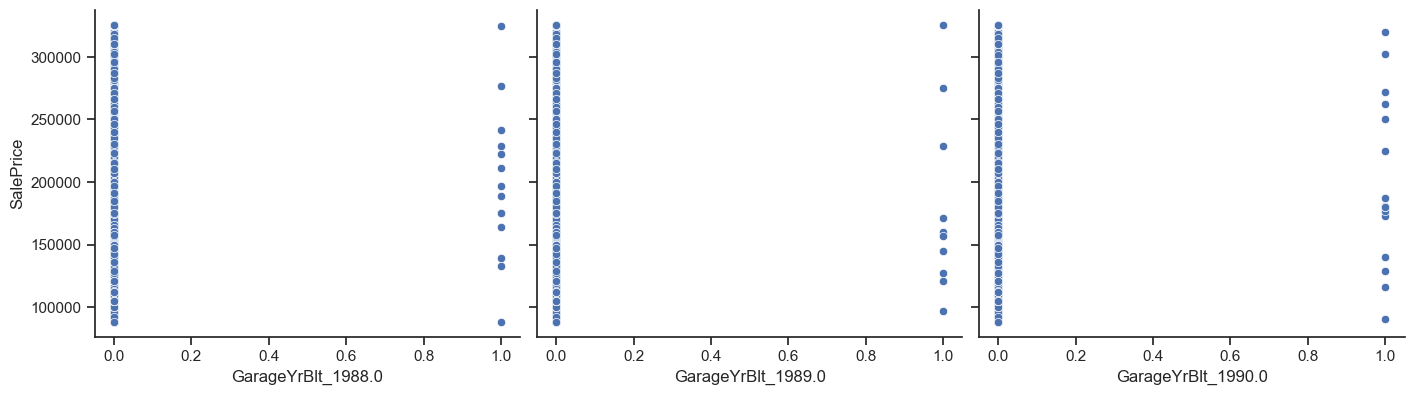

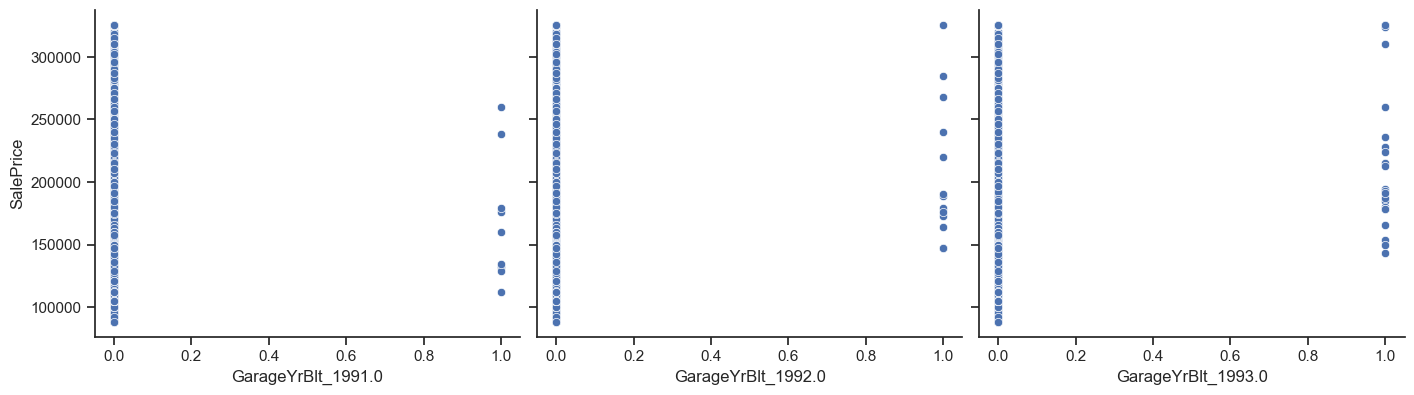

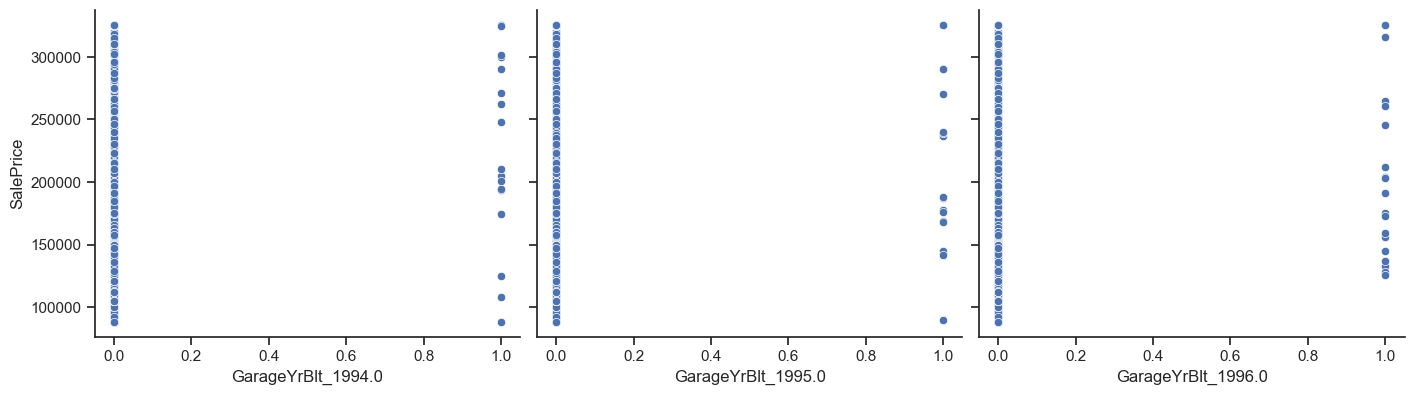

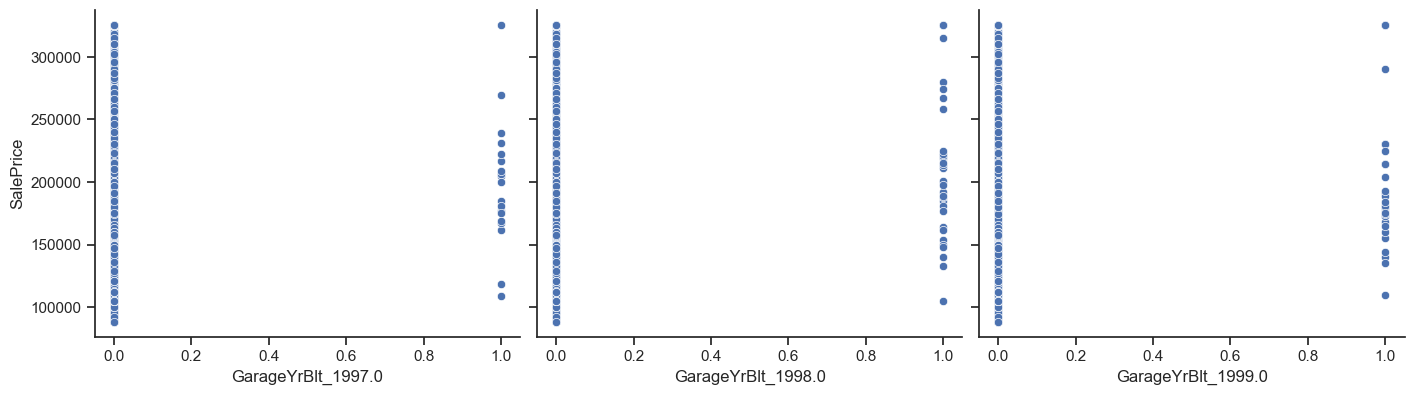

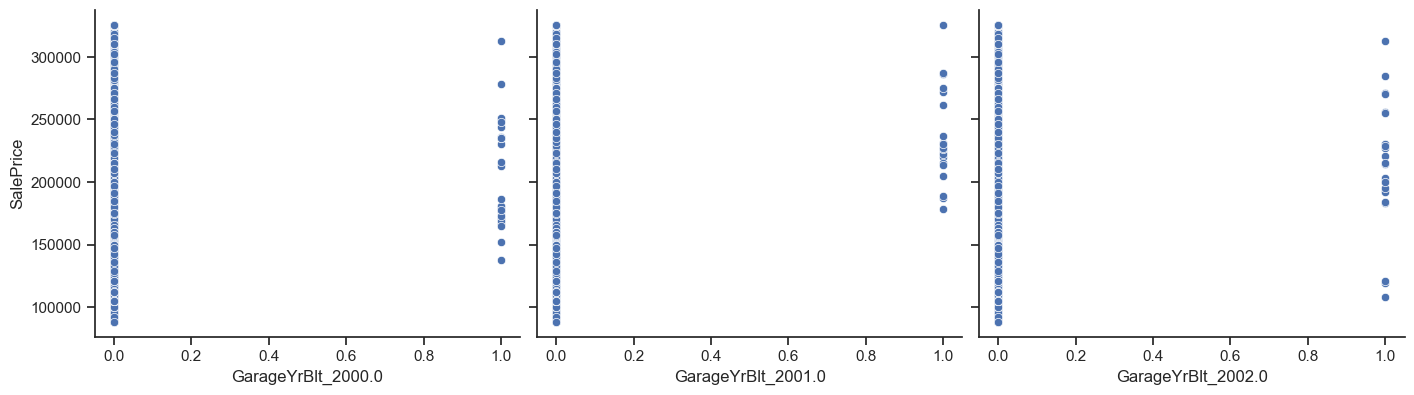

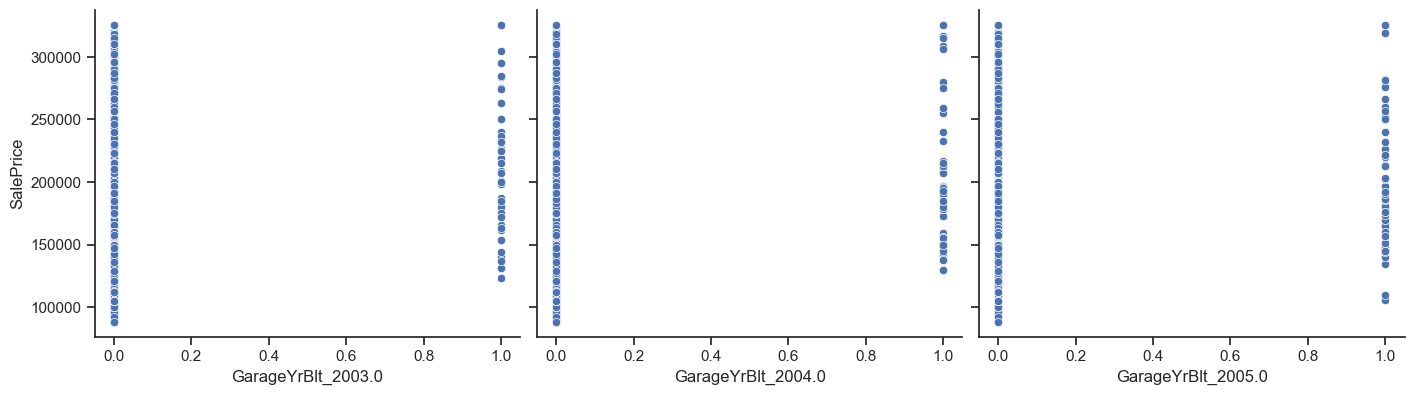

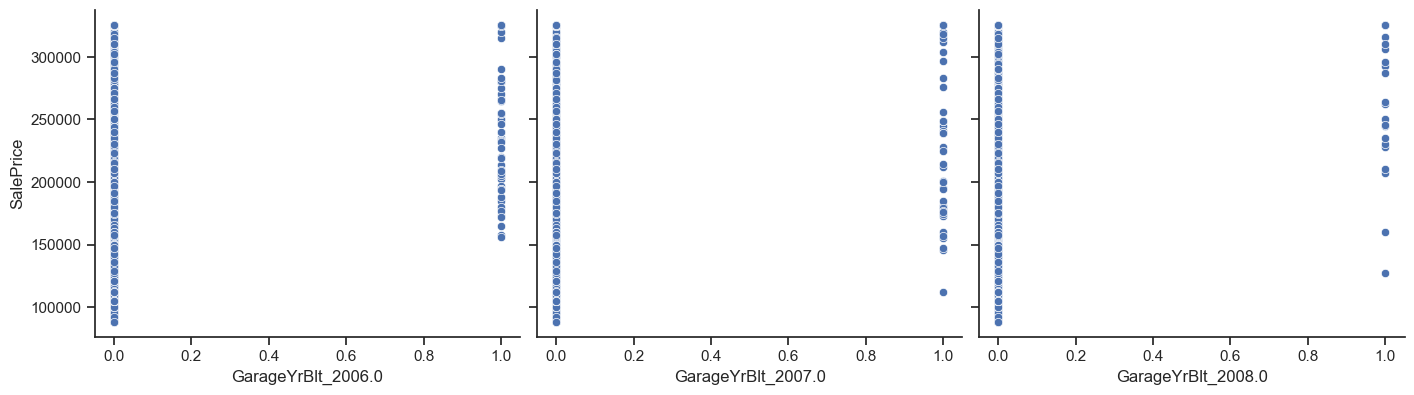

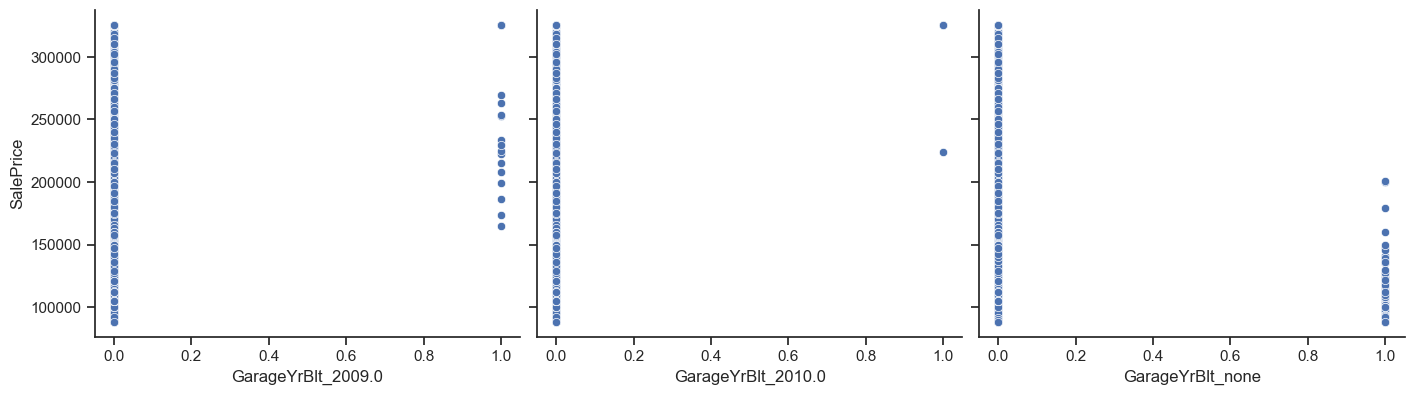

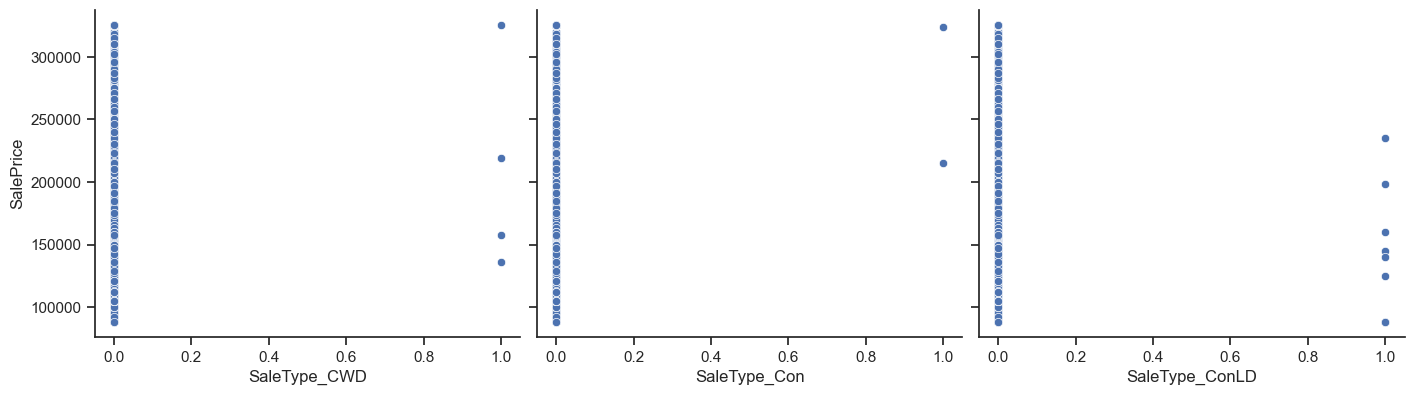

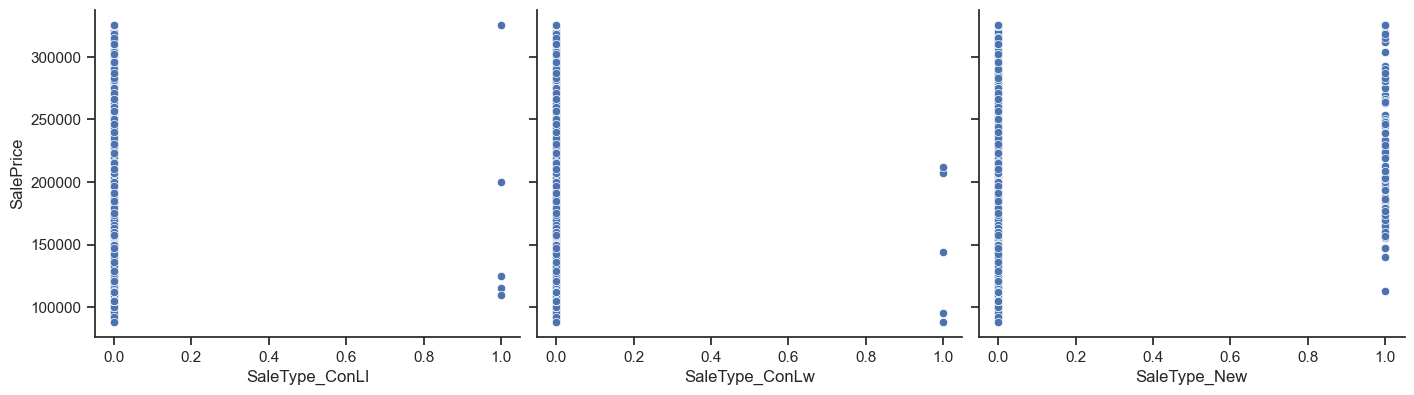

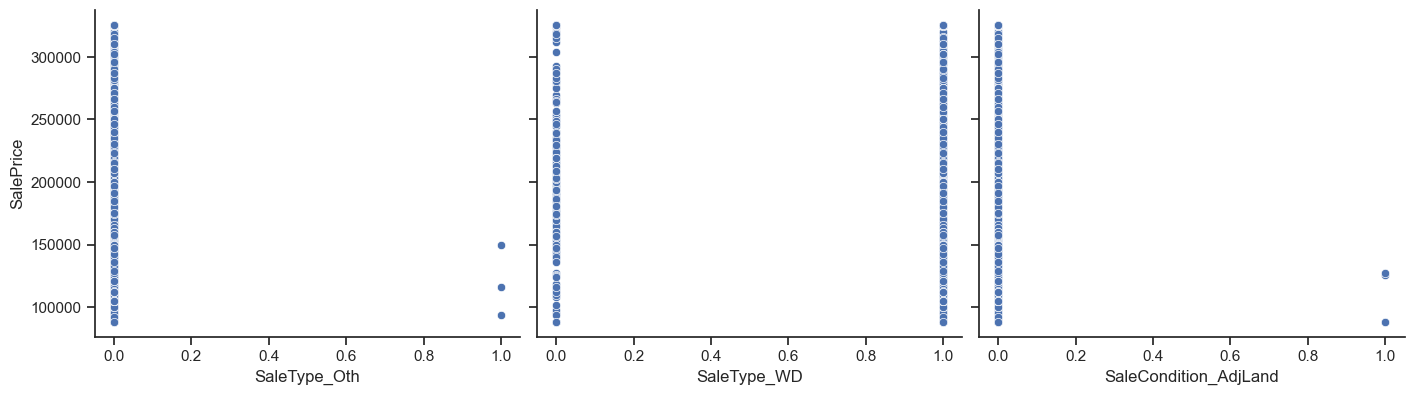

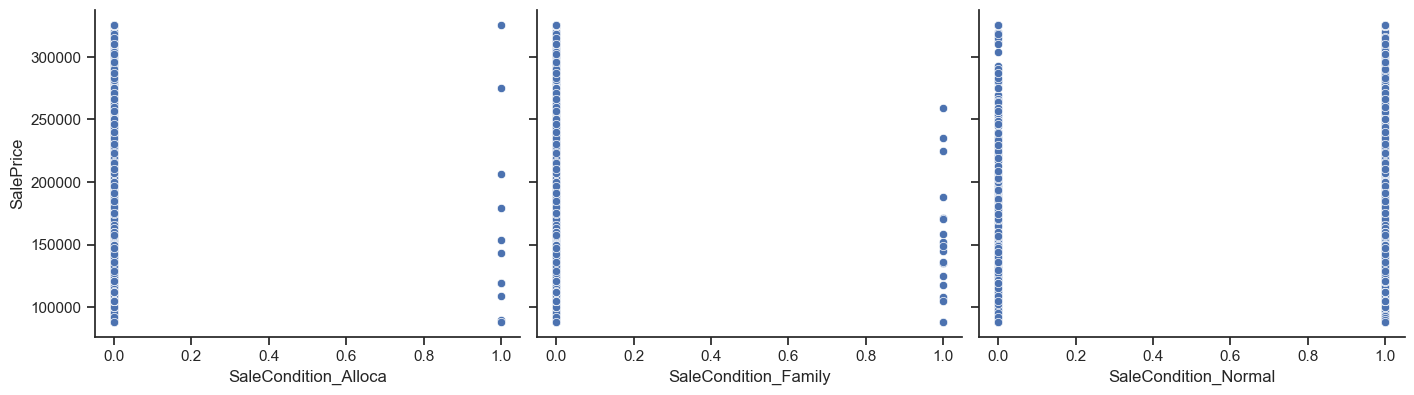

In [51]:
sns.set(style="ticks")

# Define the number of columns to display in each row (e.g., 3)
columns_per_row = 3

# Iterate through columns in groups of 3
for i in range(0, len(df.columns[:-1]), columns_per_row):
    start_col = i
    end_col = min(i + columns_per_row, len(df.columns[:-1]))
    
    # Select the columns to display in this row
    selected_columns = df.columns[start_col:end_col]

    # Create a pairplot for the selected columns
    sns.pairplot(df, x_vars=selected_columns, y_vars=['SalePrice'], height=4, aspect=1.2)
    plt.show()

#### Analyzing the Target 

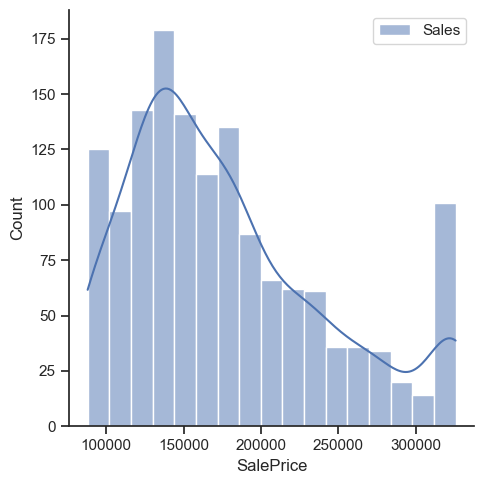

In [52]:
sns.displot(df.SalePrice, kde=True, label='Sales')
plt.legend()
plt.show()

#### There is a Right Skew on the Target distribution. Taking the Natural Log to normalize the Target's Distribution

In [53]:
df.SalePrice=np.log(df.SalePrice)

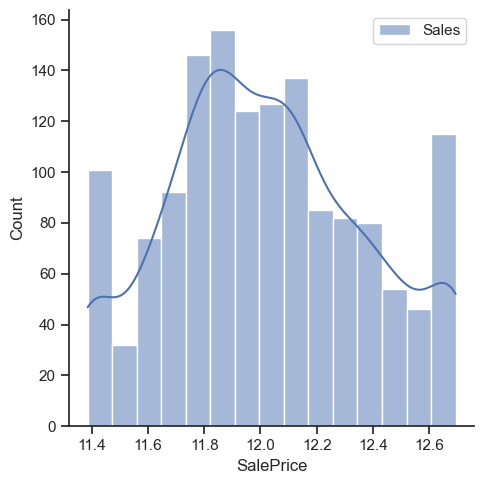

In [54]:
sns.displot(df.SalePrice, kde=True, label='Sales')
plt.legend()
plt.show()

#### Checking correraltion again to try and reduce weakly correlated features

In [55]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
dict1=round(correlation_with_target*100,2)
print(len(dict1))
print(dict1)

277
SalePrice                100.00
OverallQual               80.89
GrLivArea                 72.36
GarageCars                68.65
BsmtQual                  66.69
KitchenQual               66.43
GarageArea                66.41
TotalBsmtSF               64.01
YearBuilt                 61.74
GarageFinish              61.47
FullBath                  60.49
1stFlrSF                  60.35
YearRemodAdd              57.57
ExterQual_Gd              55.48
FireplaceQu               55.09
Foundation_PConc          54.76
TotRmsAbvGrd              53.32
GarageType                52.08
Fireplaces                50.03
LotArea                   43.74
MasVnrArea                42.91
OpenPorchSF               39.40
LotFrontage               37.56
Exterior1st_VinylSd       35.92
Exterior2nd_VinylSd       35.89
BsmtFinSF1                35.72
WoodDeckSF                35.06
GarageQual                34.82
GarageCond                34.76
Neighborhood_NridgHt      34.00
BsmtExposure              33.26
Half

In [56]:
# selected_ids = []

# for feature, correlation in dict1.items():
#     if -5 <= correlation <= 5:
#         selected_ids.append(feature)

# # print(selected_ids)

#### Reducing features that have low correlation with target to simplify the model

In [57]:
# df=df.drop(selected_ids,axis=1)

### Creating X and y variables

In [58]:
#Separating SalePrice and assigning y to it
y= df.pop('SalePrice')
#Assigning X to Features
X=df

### Ceating Train Test Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

### Model Creation

### Linear Regression

In [60]:
# Instantiate
lm = LinearRegression()

In [61]:
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [62]:
print(lm.intercept_)
print(lm.coef_)

10.294159094939598
[-2.57151855e-04  6.72676362e-04  4.54680620e-06  7.65243350e-10
 -5.24158662e-03  5.55997628e-03 -3.89889085e-11  1.51370844e-02
 -3.74019054e-02 -4.74094716e-02  3.75332267e-10  4.22214949e-02
  4.27087015e-02 -2.01822633e-02  7.60483359e-04 -4.16426486e-05
  5.58519576e-03  7.55687719e-02  4.26903401e-03  5.42951897e-03
 -3.09091571e-05 -4.28078809e-03 -1.24957620e-04 -9.45354443e-05
  2.27904426e-04 -5.39187329e-05  7.49722802e-05 -2.12096833e-11
  2.84328276e-04  1.45982627e-02 -1.42133156e-03  1.24233318e-02
 -4.17074571e-03  6.77652361e-03 -4.86069518e-15  1.19361297e-02
 -5.67557954e-03  6.21654504e-02  6.36857063e-03  3.00604481e-03
  1.28663131e-02  4.81854301e-03  9.39121028e-03  1.51996733e-04
  2.55605260e-02 -1.62811954e-02  2.18356119e-02  1.01258904e-04
  1.16014774e-04  8.51801664e-05  1.47049040e-13  2.93922092e-04
  8.41549053e-14 -2.90323321e-14  2.01703336e-03  1.87439895e-02
 -2.16658740e-02  1.77065684e-01  1.81653090e-01  1.55248106e-01
  8.05

In [63]:

    y_pred_train = lm.predict(X_train)
    y_pred_test = lm.predict(X_test)

    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print(r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print(r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print(rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print(rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print(mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print(mse_test_lr)
    metric.append(mse_test_lr**0.5)

0.9529695956569253
0.8560197299558385
5.983456961368011
7.685365629729569
0.005895031489032523
0.017626985389288002


### We can see a good fit with R-Squared score of 95.2 of Train and 85.6 on Test

### Ridge

In [64]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
print(model_cv.best_params_)

{'alpha': 20}


In [66]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.10979243e-04  3.45555257e-04  6.34350698e-06  0.00000000e+00
 -4.10877385e-03 -2.83008712e-03  0.00000000e+00  9.28689390e-03
 -2.06803620e-02 -3.98949328e-02  0.00000000e+00  5.05645993e-02
  4.19239652e-02 -1.33444070e-02  9.05130334e-04 -4.52778916e-05
  1.26071940e-02  3.98300190e-02  6.81922420e-03  5.55443321e-03
 -5.33869508e-06 -8.04837964e-04 -9.74844684e-05 -6.32727095e-05
  1.90110312e-04 -1.96741936e-05  4.56847878e-05  0.00000000e+00
  2.68835380e-04  1.30028815e-02 -6.95954131e-03  4.92152787e-03
  8.31626462e-03  4.77301369e-03  0.00000000e+00  1.72083411e-02
 -7.27925780e-03  5.04520482e-02  1.73122536e-04  9.36444355e-03
  7.25157656e-03  5.68558185e-03  1.98658593e-02  9.92717159e-05
  2.52278802e-03 -7.52590524e-03  9.69483960e-03  9.25469588e-05
  1.26422886e-04  9.12503649e-05  0.00000000e+00  2.68401069e-04
  0.00000000e+00  0.00000000e+00  1.33613461e-03  1.13328851e-02
 -1.46225072e-02  3.12927995e-02  1.66738579e-02  1.60224955e-02
 -3.07169073e-02 -9.04798

In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9341156207259874
0.9104293132553326
8.38215944172612
4.781095889927145
0.008258285164262188
0.010965816261300792


### We see a good fit with Ridge model with R-squared on the Train at 93.41 and Test at 91.04

### Lasso

In [68]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [70]:
model_cv_result_df=pd.DataFrame(model_cv.cv_results_)

In [71]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [72]:
lasso.coef_

array([-3.37832954e-04,  3.23553608e-04,  6.84039132e-06,  0.00000000e+00,
       -8.58155504e-04, -2.72081374e-03,  0.00000000e+00,  6.02025420e-03,
       -4.11364937e-03, -3.70842989e-02,  0.00000000e+00,  5.27627594e-02,
        4.14748397e-02, -3.61414180e-04,  1.08467968e-03, -1.79309488e-05,
        9.70005792e-03,  3.52724828e-02,  9.17808171e-03,  5.02313656e-03,
        3.19740272e-06, -0.00000000e+00, -9.39007960e-05, -5.40039819e-05,
        1.90871585e-04, -1.61678807e-05,  3.97470162e-05,  0.00000000e+00,
        2.71147932e-04,  9.82277411e-03, -0.00000000e+00,  0.00000000e+00,
        2.04439523e-03, -0.00000000e+00,  0.00000000e+00,  1.66322646e-02,
       -6.62840934e-03,  5.24955700e-02,  0.00000000e+00,  1.04870375e-02,
        5.66611978e-03,  5.99609441e-03,  1.22134600e-02,  1.05775607e-04,
       -0.00000000e+00, -1.40434500e-04,  1.89945546e-03,  9.72014753e-05,
        1.33456276e-04,  1.08446089e-04,  0.00000000e+00,  2.46233618e-04,
        0.00000000e+00,  

In [73]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.925033945993155
0.9113211230776883
9.53757816840027
4.733492947142791
0.009396628737340167
0.010856635199868786


### We see a good fit with Lasso model with R-squared on the Train at 92.5 and Test at 91.13

In [76]:
beta = pd.DataFrame(index=X_train.columns)
beta.rows = X_train.columns
# beta

In [77]:
beta['Ridge'] = ridge.coef_
beta['Lasso'] = lasso.coef_

In [78]:
beta

Ridge     Lasso
MSSubClass            -0.000311 -0.000338
LotFrontage            0.000346  0.000324
LotArea                0.000006  0.000007
Street                 0.000000  0.000000
LotShape              -0.004109 -0.000858
LandContour           -0.002830 -0.002721
Utilities              0.000000  0.000000
LotConfig              0.009287  0.006020
LandSlope             -0.020680 -0.004114
Condition1            -0.039895 -0.037084
Condition2             0.000000  0.000000
OverallQual            0.050565  0.052763
OverallCond            0.041924  0.041475
YearBuilt             -0.013344 -0.000361
YearRemodAdd           0.000905  0.001085
MasVnrArea            -0.000045 -0.000018
BsmtQual               0.012607  0.009700
BsmtCond               0.039830  0.035272
BsmtExposure           0.006819  0.009178
BsmtFinType1           0.005554  0.005023
BsmtFinSF1            -0.000005  0.000003
BsmtFinType2          -0.000805 -0.000000
BsmtFinSF2            -0.000097 -0.000094
BsmtUnfSF             -0.000063 -0.000054
TotalBsmtSF            0.000190  0.000191
1stFlrSF              -0.000020 -0.000016
2ndFlrSF               0.000046  0.000040
LowQualFinSF           0.000000  0.000000
GrLivArea              0.000269  0.000271
BsmtFullBath           0.013003  0.009823
BsmtHalfBath          -0.006960 -0.000000
FullBath               0.004922  0.000000
HalfBath               0.008316  0.002044
BedroomAbvGr           0.004773 -0.000000
KitchenAbvGr           0.000000  0.000000
KitchenQual            0.017208  0.016632
TotRmsAbvGrd          -0.007279 -0.006628
Functional             0.050452  0.052496
Fireplaces             0.000173  0.000000
FireplaceQu            0.009364  0.010487
GarageType             0.007252  0.005666
GarageFinish           0.005686  0.005996
GarageCars             0.019866  0.012213
GarageArea             0.000099  0.000106
GarageQual             0.002523 -0.000000
GarageCond            -0.007526 -0.000140
PavedDrive             0.009695  0.001899
WoodDeckSF             0.000093  0.000097
OpenPorchSF            0.000126  0.000133
EnclosedPorch          0.000091  0.000108
3SsnPorch              0.000000  0.000000
ScreenPorch            0.000268  0.000246
PoolArea               0.000000  0.000000
MiscVal                0.000000  0.000000
MoSold                 0.001336  0.000948
YrSold                 0.011333 -0.000000
PropAge               -0.014623 -0.002086
MSZoning_FV            0.031293  0.011482
MSZoning_RH            0.016674  0.000000
MSZoning_RL            0.016022  0.000000
MSZoning_RM           -0.030717 -0.049074
Neighborhood_Blueste  -0.000905 -0.000000
Neighborhood_BrDale   -0.007162 -0.000000
Neighborhood_BrkSide   0.032901  0.044377
Neighborhood_ClearCr   0.011168  0.000000
Neighborhood_CollgCr  -0.003633  0.000000
Neighborhood_Crawfor   0.062677  0.087903
Neighborhood_Edwards  -0.038528 -0.022630
Neighborhood_Gilbert  -0.002706  0.000000
Neighborhood_IDOTRR   -0.003200 -0.000000
Neighborhood_MeadowV  -0.038941 -0.030862
Neighborhood_Mitchel  -0.023236 -0.001655
Neighborhood_NAmes    -0.018130 -0.000000
Neighborhood_NPkVill  -0.001816 -0.000000
Neighborhood_NWAmes   -0.023506 -0.008543
Neighborhood_NoRidge  -0.000834  0.000000
Neighborhood_NridgHt   0.036868  0.038459
Neighborhood_OldTown  -0.021413 -0.000000
Neighborhood_SWISU    -0.001762  0.000000
Neighborhood_Sawyer   -0.006394  0.000000
Neighborhood_SawyerW  -0.018386 -0.000000
Neighborhood_Somerst   0.034316  0.039939
Neighborhood_StoneBr   0.030572  0.014308
Neighborhood_Timber    0.002326  0.000000
Neighborhood_Veenker   0.011939  0.000000
BldgType_2fmCon       -0.001220  0.000000
BldgType_Duplex       -0.021585 -0.007358
BldgType_Twnhs        -0.019862 -0.000000
BldgType_TwnhsE        0.018780  0.015031
HouseStyle_1.5Unf     -0.001947  0.000000
HouseStyle_1Story      0.009861  0.000000
HouseStyle_2.5Fin      0.009584  0.000000
HouseStyle_2.5Unf     -0.001449 -0.000000
HouseStyle_2Story     -0.019162 -0.012939
HouseStyle_SFoyer      0.002752 -0.0

In [79]:
beta[beta['Lasso']==0]

Ridge  Lasso
Street                 0.000000    0.0
Utilities              0.000000    0.0
Condition2             0.000000    0.0
BsmtFinType2          -0.000805   -0.0
LowQualFinSF           0.000000    0.0
BsmtHalfBath          -0.006960   -0.0
FullBath               0.004922    0.0
BedroomAbvGr           0.004773   -0.0
KitchenAbvGr           0.000000    0.0
Fireplaces             0.000173    0.0
GarageQual             0.002523   -0.0
3SsnPorch              0.000000    0.0
PoolArea               0.000000    0.0
MiscVal                0.000000    0.0
YrSold                 0.011333   -0.0
MSZoning_RH            0.016674    0.0
MSZoning_RL            0.016022    0.0
Neighborhood_Blueste  -0.000905   -0.0
Neighborhood_BrDale   -0.007162   -0.0
Neighborhood_ClearCr   0.011168    0.0
Neighborhood_CollgCr  -0.003633    0.0
Neighborhood_Gilbert  -0.002706    0.0
Neighborhood_IDOTRR   -0.003200   -0.0
Neighborhood_NAmes    -0.018130   -0.0
Neighborhood_NPkVill  -0.001816   -0.0
Neighborhood_NoRidge  -0.000834    0.0
Neighborhood_OldTown  -0.021413   -0.0
Neighborhood_SWISU    -0.001762    0.0
Neighborhood_Sawyer   -0.006394    0.0
Neighborhood_SawyerW  -0.018386   -0.0
Neighborhood_Timber    0.002326    0.0
Neighborhood_Veenker   0.011939    0.0
BldgType_2fmCon       -0.001220    0.0
BldgType_Twnhs        -0.019862   -0.0
HouseStyle_1.5Unf     -0.001947    0.0
HouseStyle_1Story      0.009861    0.0
HouseStyle_2.5Fin      0.009584    0.0
HouseStyle_2.5Unf     -0.001449   -0.0
HouseStyle_SFoyer      0.002752   -0.0
RoofStyle_Gable       -0.005978   -0.0
RoofStyle_Gambrel     -0.001636   -0.0
RoofStyle_Hip         -0.004315   -0.0
RoofStyle_Mansard      0.008586    0.0
RoofStyle_Shed         0.002896    0.0
RoofMatl_CompShg       0.016965    0.0
RoofMatl_Membran       0.000000    0.0
RoofMatl_Metal         0.003249    0.0
RoofMatl_Roll          0.001116    0.0
RoofMatl_Tar&Grv      -0.004603   -0.0
RoofMatl_WdShake       0.003000    0.0
RoofMatl_WdShngl       0.017047    0.0
Exterior1st_AsphShn    0.000000    0.0
Exterior1st_BrkComm   -0.005662   -0.0
Exterior1st_CBlock    -0.003481   -0.0
Exterior1st_CemntBd   -0.008160   -0.0
Exterior1st_ImStucc   -0.000154   -0.0
Exterior1st_Plywood    0.007487    0.0
Exterior1st_Stone      0.003515    0.0
Exterior1st_Stucco     0.002450    0.0
Exterior1st_Wd Sdng   -0.020783   -0.0
Exterior1st_WdShing   -0.007298   -0.0
Exterior2nd_AsphShn    0.001446    0.0
Exterior2nd_Brk Cmn   -0.000815   -0.0
Exterior2nd_BrkFace    0.010332    0.0
Exterior2nd_CBlock    -0.003481   -0.0
Exterior2nd_CmentBd   -0.002861   -0.0
Exterior2nd_HdBoard   -0.002995   -0.0
Exterior2nd_ImStucc   -0.004883   -0.0
Exterior2nd_MetalSd    0.003802    0.0
Exterior2nd_Other      0.000441    0.0
Exterior2nd_Plywood    0.002001    0.0
Exterior2nd_Stone      0.005375    0.0
Exterior2nd_Stucco    -0.008223   -0.0
Exterior2nd_VinylSd   -0.003434    0.0
Exterior2nd_Wd Sdng    0.012519    0.0
Exterior2nd_Wd Shng   -0.008067   -0.0
MasVnrType_None       -0.000479   -0.0
MasVnrType_Stone       0.011029    0.0
ExterQual_Fa          -0.006009   -0.0
ExterQual_TA          -0.002983   -0.0
ExterCond_Fa          -0.003656   -0.0
ExterCond_Po           0.000000    0.0
ExterCond_TA          -0.001575    0.0
Foundation_CBlock     -0.002817   -0.0
Foundation_Slab       -0.010511   -0.0
Foundation_Stone       0.002100    0.0
Foundation_Wood       -0.017522   -0.0
Heating_GasA           0.005377    0.0
Heating_GasW           0.006548    0.0
Heating_Grav           0.003800    0.0
Heating_OthW          -0.013667   -0.0
Heating_Wall          -0.002058   -0.0
HeatingQC_Fa          -0.007658   -0.0
HeatingQC_Po          -0.006828   -0.0
Electrical_FuseF       0.002045    0.0
Electrical_FuseP       0.001121   -0.0
Electrical_Mix         0.001170    0.0
Electrical_SBrkr      -0.008434   -0.0
GarageYrBlt_1906.0     0.000000    0.0
GarageYrBlt_1908.0     0.002317    0.0
GarageYrBlt_1910.0    -0.014513   -0.0
GarageYrBlt_1914.0     0.002469   -0.0
GarageYrB

In [80]:
beta.loc[beta['Lasso']!=0, 'Lasso']

MSSubClass             -0.000338
LotFrontage             0.000324
LotArea                 0.000007
LotShape               -0.000858
LandContour            -0.002721
LotConfig               0.006020
LandSlope              -0.004114
Condition1             -0.037084
OverallQual             0.052763
OverallCond             0.041475
YearBuilt              -0.000361
YearRemodAdd            0.001085
MasVnrArea             -0.000018
BsmtQual                0.009700
BsmtCond                0.035272
BsmtExposure            0.009178
BsmtFinType1            0.005023
BsmtFinSF1              0.000003
BsmtFinSF2             -0.000094
BsmtUnfSF              -0.000054
TotalBsmtSF             0.000191
1stFlrSF               -0.000016
2ndFlrSF                0.000040
GrLivArea               0.000271
BsmtFullBath            0.009823
HalfBath                0.002044
KitchenQual             0.016632
TotRmsAbvGrd           -0.006628
Functional              0.052496
FireplaceQu             0.010487
GarageType

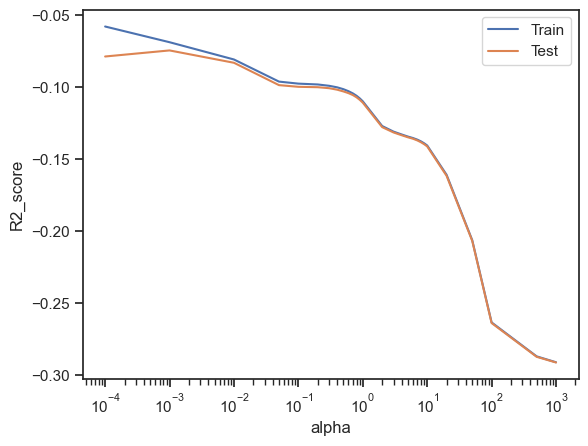

In [81]:
plt.plot(model_cv_result_df['param_alpha'], model_cv_result_df['mean_train_score'], label='Train')
plt.plot(model_cv_result_df['param_alpha'], model_cv_result_df['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### We have a final model with a good fit

In [82]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.952970          0.934116          0.925034
1   R2 Score (Test)           0.856020          0.910429          0.911321
2       RSS (Train)           5.983457          8.382159          9.537578
3        RSS (Test)           7.685366          4.781096          4.733493
4       MSE (Train)           0.076779          0.090875          0.096936
5        MSE (Test)           0.132767          0.104718          0.104195

In [83]:
betas = pd.DataFrame(index=X.columns)

In [84]:
betas.rows = X.columns

In [85]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [86]:
betas.head(15)

Linear     Ridge     Lasso
MSSubClass   -2.571519e-04 -0.000311 -0.000338
LotFrontage   6.726764e-04  0.000346  0.000324
LotArea       4.546806e-06  0.000006  0.000007
Street        7.652433e-10  0.000000  0.000000
LotShape     -5.241587e-03 -0.004109 -0.000858
LandContour   5.559976e-03 -0.002830 -0.002721
Utilities    -3.898891e-11  0.000000  0.000000
LotConfig     1.513708e-02  0.009287  0.006020
LandSlope    -3.740191e-02 -0.020680 -0.004114
Condition1   -4.740947e-02 -0.039895 -0.037084
Condition2    3.753323e-10  0.000000  0.000000
OverallQual   4.222149e-02  0.050565  0.052763
OverallCond   4.270870e-02  0.041924  0.041475
YearBuilt    -2.018226e-02 -0.013344 -0.000361
YearRemodAdd  7.604834e-04  0.000905  0.001085